# Image Processing with Keras in Python


## 1. Image Processing With Neural Networks


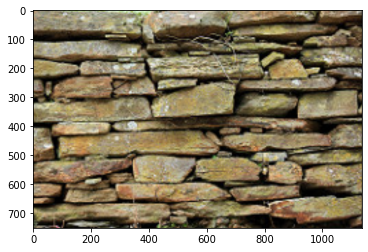

In [4]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)
plt.show()

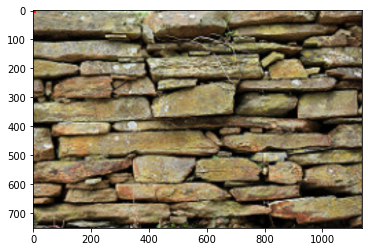

In [5]:
# Set the red channel in this part of the image to 1
data[0:10, 0:10, 0] = 1

# Set the green channel in this part of the image to 0
data[0:10, 0:10, 1] = 0

# Set the blue channel in this part of the image to 0
data[0:10, 0:10, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

In [8]:
import numpy as np

labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(labels[ii] == categories)
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

In [9]:
test_labels = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [0., 0., 1.], [0., 0., 1.], [0., 1., 0.]])
predictions = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [1., 0., 0.], [0., 0., 1.], [1., 0., 0.], [0., 0., 1.], [0., 1., 0.]])

# Calculate the number of correct predictions
number_correct = np.sum(test_labels * predictions)
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct / len(predictions)
print(proportion_correct)

6.0
0.75


In [10]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

In [11]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 28 * 28)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

In [ ]:
# Reshape test data
test_data = test_data.reshape(10, 28 * 28)

# Evaluate the model
model.evaluate(test_data, test_labels)

## 2. Using Convolutions


In [12]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [16]:
im = np.array([np.array([0.3633987 , 0.29281047, 0.36078432, 0.42745098, 0.40784314,0.39738563, 0.47320262, 0.44575164, 0.4862745 , 0.47189546,0.4405229 , 0.47320268, 0.52418303, 0.52679735, 0.49019608,0.47189546, 0.44052288, 0.4640523 , 0.38300654, 0.38562092,0.4261438 , 0.49803925, 0.47320262, 0.52287585, 0.6130719 ,0.5411765 , 0.5686275 , 0.6130719 , 0.53333336, 0.5647059 ,0.59738564, 0.5568628 , 0.45490196, 0.37777779, 0.39607844,0.40784314, 0.4261438 , 0.37908497, 0.39346406, 0.45882356,0.475817  , 0.47320262, 0.44183007, 0.47450984, 0.47058824,0.54901963, 0.4248366 , 0.5895425 , 0.48235297, 0.5921569 ,0.59477127, 0.6156863 , 0.5189543 , 0.5633987 , 0.6052287 ,0.66274506, 0.59738564, 0.47320262, 0.5581699 , 0.54771245,0.56993467, 0.64836603, 0.49150327, 0.5398693 , 0.53986925,0.5176471 , 0.5176471 , 0.5320262 , 0.5281046 , 0.45228758,0.49673203, 0.4627451 , 0.49673203, 0.6143791 , 0.43398693,0.4862745 , 0.5921569 , 0.59477127, 0.57254905, 0.57254905,0.6300654 , 0.57385623, 0.5673203 , 0.7058824 , 0.6379085 ,0.503268  , 0.34248367, 0.33333334, 0.59999996, 0.61045754,0.703268  , 0.91372555, 0.6039216 , 0.7176471 , 0.7568627 ,0.8640523 , 0.5869281 , 0.6797386 , 0.6666667 , 0.6941177 ,0.5934641 , 0.5921568 , 0.6209151 , 0.65882355, 0.63137263,0.6379085 , 0.59607846, 0.5529412 , 0.48496735, 0.41960785,0.44183007, 0.47843137, 0.4013072 , 0.35686275, 0.30457518,0.50980395, 0.42091504, 0.5267974 , 0.47189546, 0.59477127,0.5620915 , 0.45359477, 0.39738563, 0.3398693 , 0.2627451 ,0.22352941, 0.18039216, 0.15947713, 0.11372549, 0.13071896,0.11764706, 0.12287582, 0.0875817 , 0.0496732 , 0.02614379,0.01568628, 0.00261438, 0.00522876, 0.01699346, 0.01437909,0.        , 0.00522876, 0.03006536, 0.01176471, 0.01568628,0.01176471, 0.00130719, 0.02222222, 0.0627451 , 0.09411765,0.07189543, 0.05620915, 0.11633987, 0.06143791, 0.08888889,0.10718954, 0.09934641, 0.1267974 , 0.13725491, 0.12941177,0.15816994, 0.18300654, 0.10718954, 0.10980392, 0.15294118,0.15294118, 0.16078432, 0.11503268, 0.18562092, 0.24575163,0.19346406, 0.23529412, 0.22352941, 0.13725491, 0.18169935,0.1503268 , 0.0875817 , 0.07973856, 0.10718954, 0.10849673,0.09281046, 0.075817  , 0.03921569, 0.03529412, 0.0379085 ,0.01437909, 0.00130719, 0.01045752, 0.00392157, 0.00392157,0.00130719, 0.01045752, 0.01045752, 0.6418301 , 0.4993464 ,0.475817  , 0.46797392, 0.4535948 , 0.503268  , 0.5647059 ,0.56993467, 0.53725487, 0.5686275 , 0.6509804 , 0.6627451 ,0.7019608 , 0.70849675, 0.6928105 , 0.6915033 , 0.6509804 ,0.7045751 , 0.68496734, 0.68235296, 0.6039216 , 0.48235297,0.71503276, 0.7411764 , 0.5803922 , 0.57254905, 0.45490196,0.56993467, 0.6183007 , 0.66928107, 0.56078434, 0.47450984,0.47320262, 0.4862745 , 0.4535948 , 0.37385622, 0.3385621 ,0.3267974 , 0.28366014, 0.29150328, 0.2522876 , 0.21568628,0.20522876, 0.12287582, 0.09673203, 0.08366013, 0.06797386]),
 np.array([0.44313726, 0.39738563, 0.31111112, 0.4901961 , 0.34640524,0.42875817, 0.45228758, 0.49542484, 0.5163399 , 0.46928108,0.49411765, 0.5137255 , 0.48235297, 0.49542487, 0.53333336,0.43529412, 0.4169935 , 0.45228758, 0.54901963, 0.5424837 ,0.46666667, 0.4405229 , 0.43267974, 0.43529415, 0.5267974 ,0.4888889 , 0.44705883, 0.45751634, 0.551634  , 0.45228758,0.50980395, 0.43529415, 0.4496732 , 0.40261438, 0.49803922,0.5267974 , 0.5071896 , 0.5267974 , 0.5555556 , 0.55816996,0.40392157, 0.45882353, 0.4392157 , 0.40261438, 0.44313726,0.5843137 , 0.41176474, 0.49803925, 0.5620915 , 0.6052288 ,0.56993467, 0.49803925, 0.5555556 , 0.6379085 , 0.63267976,0.6261438 , 0.5372549 , 0.4901961 , 0.49803925, 0.4888889 ,0.5006536 , 0.5777778 , 0.5006536 , 0.5163399 , 0.49934646,0.5542484 , 0.47843137, 0.4392157 , 0.4       , 0.46797386,0.6143791 , 0.5620915 , 0.49019608, 0.4771242 , 0.7058824 ,0.6745098 , 0.61045754, 0.52418303, 0.5764706 , 0.6261438 ,0.63398695, 0.68235296, 0.7163399 , 0.64575166, 0.5411765 ,0.5006536 , 0.44313726, 0.19215687, 0.5503268 , 0.76993465,0.76601315, 0.55816996, 0.49542487, 0.6039216 , 0.5620915 ,0.4614379 , 0.44444445, 0.44575164, 0.49542487, 0.47189546,0.5424837 , 0.49542487, 0.35947713, 0.34509805, 0.41960785,0.38431373, 0.3137255 , 0.2901961 , 0.3137255 , 0.34509805,0.34509805, 0.2888889 , 0.24836601, 0.27189544, 0.23529412,0.05359477, 0.05620915, 0.02352941, 0.02745098, 0.03398693,0.01176471, 0.00392157, 0.0130719 , 0.02352941, 0.04183007,0.0248366 , 0.05098039, 0.04705882, 0.01176471, 0.01960784,0.01437909, 0.        , 0.00522876, 0.01045752, 0.02745098,0.02352941, 0.02222222, 0.00522876, 0.01830065, 0.05490196,0.05751634, 0.04836601, 0.06405229, 0.08627451, 0.13594772,0.11633987, 0.14117648, 0.18300654, 0.25751635, 0.23660131,0.23660131, 0.11764706, 0.075817  , 0.07058824, 0.11764706,0.10588235, 0.04444445, 0.04575163, 0.07712419, 0.10718954,0.07058824, 0.09542484, 0.11111111, 0.0379085 , 0.03267974,0.05359477, 0.01830065, 0.06928105, 0.03921569, 0.04183007,0.05359477, 0.01699346, 0.04052288, 0.03267974, 0.0248366 ,0.01960784, 0.05620915, 0.01830065, 0.03137255, 0.04705882,0.04575163, 0.04575163, 0.03137255, 0.03137255, 0.00653595,0.00653595, 0.00653595, 0.00653595, 0.00653595, 0.01437909,0.01437909, 0.00653595, 0.02222222, 0.7307189 , 0.5869281 ,0.62352943, 0.51111114, 0.47843137, 0.5934641 , 0.52287585,0.52941173, 0.5163399 , 0.545098  , 0.54771245, 0.6261438 ,0.5882353 , 0.56601304, 0.58562094, 0.5895425 , 0.52026147,0.29150328, 0.27189544, 0.32026145, 0.33071896, 0.49411765,0.39215687, 0.3882353 , 0.25490198, 0.31633988, 0.2509804 ,0.22745098, 0.14509805, 0.12156863, 0.04183007, 0.06013072,0.06405229, 0.03921569, 0.03921569, 0.07973856, 0.06797386,0.02614379, 0.02875817, 0.01830065, 0.03921569, 0.01176471,0.00522876, 0.00522876, 0.00784314, 0.00392157, 0.00392157]),
 np.array([0.49019608, 0.42222226, 0.42483664, 0.475817  , 0.53464055,0.4496732 , 0.4405229 , 0.42352942, 0.4366013 , 0.4627451 ,0.5816993 , 0.66013074, 0.6745098 , 0.6392157 , 0.68496734,0.6169935 , 0.6013072 , 0.52026147, 0.45228758, 0.38169935,0.39738563, 0.4496732 , 0.53594774, 0.50980395, 0.4       ,0.47843137, 0.4797386 , 0.4640523 , 0.5647059 , 0.58300656,0.5176471 , 0.76209146, 0.65751636, 0.6666667 , 0.709804  ,0.6496732 , 0.57385623, 0.6248366 , 0.5921569 , 0.5398693 ,0.60784316, 0.42745098, 0.62614375, 0.6379085 , 0.57385623,0.42222223, 0.49542487, 0.5647059 , 0.5568628 , 0.5137255 ,0.5869281 , 0.5189542 , 0.503268  , 0.52026147, 0.42091504,0.45620918, 0.530719  , 0.6169935 , 0.6183006 , 0.6       ,0.58300656, 0.6078431 , 0.6405229 , 0.6300654 , 0.54901963,0.6039216 , 0.48758173, 0.6169935 , 0.4392157 , 0.69542485,0.75294113, 0.6836602 , 0.61960787, 0.6379085 , 0.5542484 ,0.5071896 , 0.6261439 , 0.73202616, 0.70849675, 0.5764706 ,0.45751634, 0.45882353, 0.63529414, 0.45490196, 0.44705883,0.39084968, 0.26013073, 0.19738562, 0.23529412, 0.08888889,0.07320262, 0.15686275, 0.14117648, 0.03921569, 0.00784314,0.00653595, 0.02222222, 0.03267974, 0.02614379, 0.09281046,0.02875817, 0.05098039, 0.14640523, 0.14509805, 0.1124183 ,0.11111111, 0.07320262, 0.06797386, 0.09673203, 0.1385621 ,0.13594772, 0.06143791, 0.07712419, 0.04836601, 0.11372549,0.21045752, 0.17777778, 0.16993465, 0.12287582, 0.12156863,0.04575163, 0.0875817 , 0.05228758, 0.06143791, 0.06666667,0.0627451 , 0.06666667, 0.0627451 , 0.06797386, 0.06928105,0.07320262, 0.06928105, 0.06928105, 0.09281046, 0.09281046,0.1006536 , 0.10457516, 0.1124183 , 0.11764706, 0.14901961,0.18562092, 0.13202615, 0.08888889, 0.14901961, 0.20522876,0.24836601, 0.25490198, 0.30588236, 0.21699347, 0.2522876 ,0.28366014, 0.3124183 , 0.35424837, 0.3764706 , 0.3281046 ,0.2509804 , 0.29411766, 0.38300654, 0.38039216, 0.35947713,0.38300654, 0.41830066, 0.39607844, 0.49150327, 0.43529412,0.45490196, 0.551634  , 0.22222222, 0.31764707, 0.31895426,0.23137255, 0.17385621, 0.15686275, 0.11372549, 0.13594772,0.10457516, 0.03006536, 0.00392157, 0.00915033, 0.00915033,0.01045752, 0.01699346, 0.01699346, 0.01437909, 0.00653595,0.00653595, 0.00915033, 0.01437909, 0.00653595, 0.00522876,0.00522876, 0.00915033, 0.01437909, 0.52156866, 0.6169935 ,0.52026147, 0.57124186, 0.5398693 , 0.41045752, 0.36732027,0.3281046 , 0.33464053, 0.39607844, 0.31111112, 0.34248367,0.23137255, 0.19738562, 0.20261438, 0.19477125, 0.19346406,0.2509804 , 0.18169935, 0.19084968, 0.17908497, 0.13071896,0.1124183 , 0.04575163, 0.01568628, 0.01568628, 0.0875817 ,0.09019608, 0.12156863, 0.14640523, 0.18562092, 0.1633987 ,0.1124183 , 0.02222222, 0.00261438, 0.00261438, 0.00261438,0.00261438, 0.04444445, 0.04313726, 0.01830065, 0.0248366 ,0.07973856, 0.13594772, 0.19477125, 0.19084968, 0.14379086]),
 np.array([0.3882353 , 0.44836605, 0.3751634 , 0.49803925, 0.40784314,0.4496732 , 0.31633988, 0.4627451 , 0.50849676, 0.67189544,0.64575166, 0.44705883, 0.44444445, 0.46535948, 0.5398693 ,0.50980395, 0.6248366 , 0.7019608 , 0.5555555 , 0.66013074,0.72156864, 0.63398695, 0.427451  , 0.39215687, 0.4248366 ,0.6405229 , 0.53594774, 0.6117647 , 0.7098039 , 0.6130719 ,0.62222224, 0.6901961 , 0.682353  , 0.6379085 , 0.5764706 ,0.5882353 , 0.70849675, 0.7843137 , 0.5921569 , 0.48758173,0.6235294 , 0.6143791 , 0.56993467, 0.5816993 , 0.52418303,0.5124183 , 0.45620918, 0.5006536 , 0.5908497 , 0.49542487,0.7934641 , 0.5647059 , 0.58562094, 0.6300654 , 0.67058825,0.64444447, 0.6575164 , 0.6169935 , 0.68496734, 0.5686274 ,0.56078434, 0.60784316, 0.6183007 , 0.74379086, 0.6732026 ,0.7751634 , 0.63398695, 0.7529412 , 0.8104575 , 0.7738562 ,0.67058825, 0.5934641 , 0.6392157 , 0.6745098 , 0.49803925,0.47189543, 0.35947713, 0.3137255 , 0.31764707, 0.39084968,0.51111114, 0.5947712 , 0.36078432, 0.27450982, 0.31764707,0.2379085 , 0.2653595 , 0.2653595 , 0.23921569, 0.29803923,0.18300654, 0.15555556, 0.16993465, 0.18169935, 0.1503268 ,0.19869281, 0.15816994, 0.20915033, 0.21176471, 0.23398693,0.21699347, 0.1882353 , 0.04575163, 0.09542484, 0.06797386,0.06143791, 0.05228758, 0.07320262, 0.08496732, 0.09411765,0.09803922, 0.05620915, 0.08888889, 0.1124183 , 0.11111111,0.08888889, 0.07843138, 0.16993465, 0.1633987 , 0.13202615,0.08366013, 0.1267974 , 0.09411765, 0.1267974 , 0.09542484,0.09019608, 0.07058824, 0.14379086, 0.1267974 , 0.09019608,0.06797386, 0.11503268, 0.15424837, 0.20784314, 0.17385621,0.16209151, 0.1633987 , 0.13071896, 0.14640523, 0.14901961,0.12810458, 0.15947713, 0.22614379, 0.28104576, 0.25490198,0.3398693 , 0.2379085 , 0.32026145, 0.42875817, 0.34509805,0.3372549 , 0.37777779, 0.34771243, 0.31633988, 0.32287583,0.44444445, 0.6013072 , 0.5542484 , 0.46928108, 0.5542484 ,0.5150327 , 0.61960787, 0.59477127, 0.58300656, 0.7098039 ,0.5816994 , 0.37385622, 0.5058824 , 0.4993464 , 0.503268  ,0.5411765 , 0.57908493, 0.5542484 , 0.5124183 , 0.5385621 ,0.65882355, 0.5437909 , 0.44183007, 0.39084968, 0.37385622,0.39738563, 0.4169935 , 0.33333334, 0.22352941, 0.29934642,0.26928106, 0.25751635, 0.303268  , 0.24052288, 0.19346406,0.21045752, 0.31633988, 0.2875817 , 0.24183007, 0.16732027,0.16732027, 0.06666667, 0.20261438, 0.18954249, 0.09803922,0.01699346, 0.04575163, 0.14248367, 0.17385621, 0.11503268,0.1385621 , 0.10196079, 0.08496732, 0.07712419, 0.03267974,0.04575163, 0.05098039, 0.01568628, 0.02875817, 0.04705882,0.00392157, 0.12026144, 0.2130719 , 0.1764706 , 0.16601308,0.21437909, 0.29673204, 0.39346406, 0.40392157, 0.43529412,0.42875817, 0.4862745 , 0.54509807, 0.5411765 , 0.5607843 ,0.6392157 , 0.6901961 , 0.73594767, 0.70718956, 0.6836602 ,0.72549015, 0.5411765 , 0.5686275 , 0.7019608 , 0.7503268 ]),
 np.array([0.4143791 , 0.4       , 0.48235297, 0.5058824 , 0.4901961 ,0.5045752 , 0.61960787, 0.6496732 , 0.70718956, 0.63137263,0.58431375, 0.5908497 , 0.58300656, 0.57124186, 0.57647055,0.56993467, 0.6052288 , 0.66928107, 0.6431373 , 0.6039216 ,0.703268  , 0.56078434, 0.46535948, 0.6535948 , 0.5934641 ,0.5437909 , 0.4993464 , 0.52287585, 0.5555556 , 0.67843133,0.703268  , 0.64444447, 0.5372549 , 0.6052288 , 0.7529412 ,0.8104575 , 0.5908497 , 0.530719  , 0.724183  , 0.7254903 ,0.45098042, 0.4888889 , 0.6143791 , 0.5673203 , 0.4888889 ,0.57385623, 0.5908497 , 0.5163399 , 0.57254905, 0.5568628 ,0.5620915 , 0.5542484 , 0.5568628 , 0.57254905, 0.6679738 ,0.5071896 , 0.47058824, 0.54771245, 0.5424837 , 0.6183007 ,0.63529414, 0.6       , 0.5647059 , 0.40784314, 0.275817  ,0.21437909, 0.2130719 , 0.1267974 , 0.13464053, 0.11895425,0.02091503, 0.03921569, 0.00915033, 0.0248366 , 0.06535948,0.10196079, 0.06666667, 0.12810458, 0.07843138, 0.10196079,0.05490196, 0.05228758, 0.03137255, 0.0379085 , 0.07189543,0.075817  , 0.10326798, 0.16209151, 0.14640523, 0.20784314,0.11895425, 0.16732027, 0.16601308, 0.17385621, 0.1385621 ,0.08496732, 0.14117648, 0.1882353 , 0.10326798, 0.04705882,0.07189543, 0.08888889, 0.0875817 , 0.08104575, 0.1006536 ,0.13464053, 0.09281046, 0.1006536 , 0.11111111, 0.07843138,0.13464053, 0.20522876, 0.21437909, 0.13986929, 0.12941177,0.16862746, 0.14509805, 0.09150327, 0.1751634 , 0.12418301,0.075817  , 0.10718954, 0.19738562, 0.1267974 , 0.1385621 ,0.14117648, 0.15816994, 0.14901961, 0.10718954, 0.0875817 ,0.12418301, 0.151634  , 0.13071896, 0.15816994, 0.20522876,0.19215687, 0.1882353 , 0.16470589, 0.1385621 , 0.19215687,0.13333334, 0.21176471, 0.21176471, 0.26666668, 0.32418302,0.34640524, 0.41699347, 0.45882353, 0.36078432, 0.3385621 ,0.39607844, 0.3503268 , 0.3620915 , 0.34901962, 0.32026145,0.4366013 , 0.46143794, 0.5150327 , 0.42091504, 0.49542487,0.6535948 , 0.6183007 , 0.6405229 , 0.6627451 , 0.6013072 ,0.71503276, 0.6875817 , 0.6300654 , 0.5633987 , 0.60915035,0.58431375, 0.54901963, 0.59607846, 0.66274506, 0.6392157 ,0.64836603, 0.65882355, 0.5934641 , 0.48366013, 0.42352942,0.3529412 , 0.4614379 , 0.54901963, 0.4366013 , 0.40784314,0.36078432, 0.5189542 , 0.5150327 , 0.6013072 , 0.6300654 ,0.41960785, 0.50980395, 0.38169935, 0.42091504, 0.38823533,0.33202615, 0.41568628, 0.2875817 , 0.11633987, 0.15424837,0.15816994, 0.09019608, 0.04313726, 0.02745098, 0.00653595,0.00130719, 0.01176471, 0.02614379, 0.02875817, 0.02745098,0.01045752, 0.02875817, 0.04836601, 0.04575163, 0.1267974 ,0.28496733, 0.32156864, 0.2248366 , 0.2653595 , 0.303268  ,0.32287583, 0.25490198, 0.23398693, 0.2130719 , 0.2130719 ,0.23006536, 0.28496733, 0.2875817 , 0.20392157, 0.21830066,0.33333334, 0.37254903, 0.20653595, 0.16993465, 0.24052288,0.30457518, 0.4928105 , 0.530719  , 0.47189546, 0.32156864]),
 np.array([0.3633987 , 0.2640523 , 0.4248366 , 0.3895425 , 0.29934642,0.36732027, 0.36993465, 0.27189544, 0.16470589, 0.16209151,0.14248367, 0.16993465, 0.16862746, 0.20130719, 0.18300654,0.18300654, 0.17908497, 0.1882353 , 0.1503268 , 0.20784314,0.1503268 , 0.1764706 , 0.38300654, 0.4614379 , 0.59477127,0.5777778 , 0.7176471 , 0.6640523 , 0.6130719 , 0.39084968,0.3267974 , 0.26797387, 0.32941177, 0.3124183 , 0.2130719 ,0.18562092, 0.20261438, 0.24575163, 0.32026145, 0.31895426,0.34248367, 0.2535948 , 0.3529412 , 0.43006536, 0.44705883,0.36993465, 0.30718955, 0.3281046 , 0.2901961 , 0.2784314 ,0.2248366 , 0.23006536, 0.2496732 , 0.15947713, 0.14901961,0.13725491, 0.19477125, 0.19477125, 0.17777778, 0.04183007,0.00915033, 0.12418301, 0.15947713, 0.10980392, 0.21960784,0.38431373, 0.33071896, 0.38562092, 0.31111112, 0.3751634 ,0.51111114, 0.79477125, 0.79477125, 0.8862745 , 0.39477125,0.3281046 , 0.33202615, 0.2640523 , 0.28366014, 0.34771243,0.37124184, 0.34901962, 0.39738563, 0.4431373 , 0.4261438 ,0.43267977, 0.4366013 , 0.39477125, 0.44705883, 0.40392157,0.4117647 , 0.29934642, 0.3267974 , 0.2509804 , 0.23921569,0.21045752, 0.21437909, 0.15947713, 0.25620916, 0.26928106,0.13594772, 0.09542484, 0.10980392, 0.09673203, 0.13071896,0.10588235, 0.11895425, 0.14640523, 0.12156863, 0.08104575,0.1882353 , 0.4013072 , 0.18169935, 0.16862746, 0.16078432,0.18039216, 0.14379086, 0.15555556, 0.18039216, 0.09150327,0.16732027, 0.12941177, 0.16601308, 0.1503268 , 0.14771242,0.10457516, 0.14248367, 0.09281046, 0.09411765, 0.08627451,0.09019608, 0.10196079, 0.10718954, 0.12418301, 0.15816994,0.18300654, 0.16732027, 0.20261438, 0.10457516, 0.10457516,0.14509805, 0.19084968, 0.13594772, 0.2509804 , 0.26013073,0.3267974 , 0.3503268 , 0.32287583, 0.36993468, 0.36993465,0.44705883, 0.427451  , 0.4039216 , 0.36862746, 0.36078432,0.33202615, 0.33071896, 0.303268  , 0.3006536 , 0.37908497,0.5176471 , 0.5751634 , 0.5045752 , 0.5411765 , 0.53986925,0.6392157 , 0.39477125, 0.627451  , 0.6666667 , 0.772549  ,0.63529414, 0.5045752 , 0.4392157 , 0.46928108, 0.38039216,0.3398693 , 0.2901961 , 0.52287585, 0.6405229 , 0.5895425 ,0.61307186, 0.5424837 , 0.5908497 , 0.6928105 , 0.675817  ,0.6640523 , 0.5503268 , 0.5882353 , 0.6405229 , 0.5568628 ,0.7006536 , 0.64183   , 0.61045754, 0.60784316, 0.48104575,0.48496735, 0.5647059 , 0.48366013, 0.46013072, 0.24705882,0.16470589, 0.17124183, 0.16209151, 0.11111111, 0.08104575,0.08888889, 0.06666667, 0.01176471, 0.        , 0.        ,0.00392157, 0.05359477, 0.17124183, 0.21176471, 0.19346406,0.20130719, 0.21960784, 0.2509804 , 0.1882353 , 0.1764706 ,0.14901961, 0.16470589, 0.16470589, 0.14117648, 0.12941177,0.10326798, 0.11895425, 0.09150327, 0.08235294, 0.11372549,0.09542484, 0.07973856, 0.08366013, 0.04575163, 0.15947713,0.0379085 , 0.03529412, 0.0379085 , 0.04183007, 0.075817  ]),
 np.array([0.03398693, 0.01437909, 0.00392157, 0.00261438, 0.01045752,0.01045752, 0.00522876, 0.00392157, 0.01045752, 0.05098039,0.04836601, 0.08235294, 0.05228758, 0.05228758, 0.00130719,0.01830065, 0.02614379, 0.01176471, 0.24836601, 0.6509804 ,0.8457516 , 0.75816995, 0.82091504, 0.7738562 , 0.7281046 ,0.6156863 , 0.5542484 , 0.52026147, 0.6875817 , 0.82614374,0.84444445, 0.76862746, 0.9124183 , 0.8993464 , 0.8928105 ,0.8849673 , 0.86797386, 0.8653595 , 0.827451  , 0.75555557,0.6862745 , 0.81830066, 0.882353  , 0.8627451 , 0.8601307 ,0.8784314 , 0.8679738 , 0.84444445, 0.81437904, 0.71895427,0.82875824, 0.7529412 , 0.7398693 , 0.6640523 , 0.6       ,0.24705882, 0.00784314, 0.01830065, 0.00784314, 0.12418301,0.45228758, 0.48496732, 0.45359477, 0.54771245, 0.5058824 ,0.42222223, 0.49542487, 0.551634  , 0.45098042, 0.69803923,0.8993464 , 0.8888889 , 0.79738563, 0.82091504, 0.92156863,0.6183007 , 0.5437909 , 0.6       , 0.5934641 , 0.60915035,0.606536  , 0.60915035, 0.6130719 , 0.6104576 , 0.5869281 ,0.53464055, 0.5137255 , 0.53594774, 0.4928105 , 0.46013072,0.35816994, 0.45882353, 0.39738563, 0.24575163, 0.24183007,0.20522876, 0.13464053, 0.20392157, 0.23006536, 0.17908497,0.2248366 , 0.2496732 , 0.14509805, 0.09411765, 0.09934641,0.11111111, 0.14901961, 0.10980392, 0.10718954, 0.151634  ,0.12941177, 0.14248367, 0.16470589, 0.21568628, 0.16993465,0.17385621, 0.17777778, 0.1764706 , 0.1267974 , 0.1503268 ,0.13071896, 0.18169935, 0.12810458, 0.08366013, 0.15816994,0.1254902 , 0.11895425, 0.05882353, 0.09934641, 0.09673203,0.08496732, 0.09673203, 0.12156863, 0.10588235, 0.09019608,0.11503268, 0.11111111, 0.15424837, 0.12026144, 0.12418301,0.16993465, 0.24444444, 0.27189544, 0.41699347, 0.3006536 ,0.2496732 , 0.29934642, 0.3385621 , 0.3150327 , 0.3882353 ,0.33333334, 0.3751634 , 0.38300654, 0.3281046 , 0.351634  ,0.35424837, 0.4261438 , 0.4       , 0.36601308, 0.33464053,0.29803923, 0.32287583, 0.29673204, 0.3150327 , 0.24052288,0.28366014, 0.2627451 , 0.28496733, 0.38039216, 0.32941177,0.351634  , 0.40653595, 0.55947715, 0.57385623, 0.530719  ,0.5751634 , 0.5071896 , 0.44444445, 0.6248366 , 0.64575166,0.69803923, 0.7215686 , 0.6836601 , 0.67058825, 0.69673204,0.68888885, 0.7176471 , 0.69542485, 0.68496734, 0.7856209 ,0.66928107, 0.7176471 , 0.6915033 , 0.7006536 , 0.74509805,0.74379086, 0.6862745 , 0.57124186, 0.52026147, 0.37516344,0.151634  , 0.17124183, 0.19084968, 0.16209151, 0.11372549,0.09411765, 0.07712419, 0.05228758, 0.02745098, 0.00915033,0.00392157, 0.06797386, 0.16601308, 0.17124183, 0.12810458,0.11764706, 0.07712419, 0.16209151, 0.09019608, 0.12156863,0.1254902 , 0.11633987, 0.10326798, 0.06928105, 0.02352941,0.06797386, 0.01830065, 0.03137255, 0.05882353, 0.00522876,0.00653595, 0.01568628, 0.01960784, 0.03660131, 0.00915033,0.0496732 , 0.04836601, 0.02352941, 0.07189543, 0.03137255]),
 np.array([0.00653595, 0.01045752, 0.00130719, 0.03398693, 0.03398693,0.00392157, 0.01045752, 0.00653595, 0.00130719, 0.00522876,0.00653595, 0.02222222, 0.00915033, 0.00915033, 0.05098039,0.19084968, 0.26013073, 0.25620916, 0.6248366 , 0.5947712 ,0.57647055, 0.6509804 , 0.6562092 , 0.7202614 , 0.5006536 ,0.5908497 , 0.6169935 , 0.68888885, 0.6169935 , 0.63398695,0.6496732 , 0.7359478 , 0.71111107, 0.67058825, 0.60915035,0.61960787, 0.7359478 , 0.7503268 , 0.6562092 , 0.6771242 ,0.654902  , 0.6366013 , 0.7359478 , 0.7124183 , 0.675817  ,0.7281046 , 0.5686275 , 0.6562092 , 0.61045754, 0.6640523 ,0.8052287 , 0.6875817 , 0.8052287 , 0.75555557, 0.76862746,0.67843145, 0.303268  , 0.00522876, 0.08627451, 0.39607844,0.6392157 , 0.6509804 , 0.68235296, 0.57254905, 0.5424837 ,0.654902  , 0.62222224, 0.61045754, 0.47058824, 0.95686275,0.8457516 , 0.6771242 , 0.8679738 , 0.8601307 , 0.87973857,0.8928104 , 0.5254902 , 0.6915033 , 0.6287582 , 0.60915035,0.68235296, 0.6627451 , 0.5934641 , 0.56993467, 0.62222224,0.6248366 , 0.57385623, 0.5529412 , 0.52418303, 0.4771242 ,0.4888889 , 0.42875817, 0.37908497, 0.40522876, 0.3398693 ,0.3137255 , 0.21045752, 0.2627451 , 0.19346406, 0.1633987 ,0.12810458, 0.22875817, 0.3751634 , 0.19607843, 0.12287582,0.12156863, 0.14901961, 0.13725491, 0.13725491, 0.1764706 ,0.17777778, 0.17908497, 0.16862746, 0.13333334, 0.15294118,0.16209151, 0.10196079, 0.12287582, 0.15686275, 0.18431373,0.19215687, 0.20392157, 0.19084968, 0.23660131, 0.33071896,0.24052288, 0.19869281, 0.2130719 , 0.22091503, 0.16993465,0.11895425, 0.12156863, 0.13464053, 0.12941177, 0.12941177,0.14509805, 0.18954249, 0.20522876, 0.21437909, 0.22745098,0.22222222, 0.23529412, 0.25620916, 0.35424837, 0.34248367,0.3385621 , 0.29281047, 0.4496732 , 0.36078432, 0.34771243,0.36993465, 0.38169935, 0.45620918, 0.41045752, 0.38300654,0.4039216 , 0.41045752, 0.44183007, 0.43790853, 0.43529415,0.38300654, 0.30849674, 0.44836602, 0.39477125, 0.36862746,0.33202615, 0.33071896, 0.33464053, 0.31111112, 0.32418302,0.3137255 , 0.31764707, 0.2535948 , 0.5019608 , 0.7124183 ,0.74509805, 0.5973856 , 0.54640526, 0.5934641 , 0.69803923,0.6797385 , 0.6836602 , 0.6235294 , 0.6522876 , 0.71503276,0.7529412 , 0.7568628 , 0.76993465, 0.58300656, 0.7267974 ,0.72549015, 0.67058825, 0.675817  , 0.6562092 , 0.67843133,0.68888885, 0.6771242 , 0.56078434, 0.34640524, 0.28104576,0.25882354, 0.18692811, 0.13071896, 0.10326798, 0.08627451,0.08366013, 0.08235294, 0.07058824, 0.04183007, 0.02222222,0.00130719, 0.00392157, 0.00915033, 0.        , 0.        ,0.0248366 , 0.02222222, 0.01568628, 0.00130719, 0.00392157,0.00522876, 0.00261438, 0.05359477, 0.151634  , 0.16862746,0.16732027, 0.30588236, 0.25882354, 0.1124183 , 0.151634  ,0.18431373, 0.14248367, 0.15686275, 0.21960784, 0.31895426,0.37908497, 0.3019608 , 0.17908497, 0.15424837, 0.17124183]),
 np.array([0.00392157, 0.01176471, 0.02352941, 0.00130719, 0.00130719,0.01568628, 0.00392157, 0.01568628, 0.00784314, 0.00261438,0.00261438, 0.00522876, 0.00392157, 0.01568628, 0.21699347,0.41437912, 0.4431373 , 0.58431375, 0.5908497 , 0.71503276,0.72287583, 0.65751636, 0.5895425 , 0.6928105 , 0.6653595 ,0.6836601 , 0.66274506, 0.7176471 , 0.7124183 , 0.63267976,0.68496734, 0.72156864, 0.74379086, 0.74771243, 0.75816995,0.72287583, 0.71503276, 0.6928105 , 0.64836603, 0.72156864,0.6614379 , 0.669281  , 0.64836603, 0.6640523 , 0.65882355,0.6915033 , 0.7163399 , 0.6653595 , 0.69673204, 0.6522876 ,0.7385621 , 0.7607843 , 0.7568628 , 0.79477125, 0.7124183 ,0.5620915 , 0.21699347, 0.1633987 , 0.4797386 , 0.5908497 ,0.7294118 , 0.7869281 , 0.7464053 , 0.6614379 , 0.55816996,0.503268  , 0.6627451 , 0.61045754, 0.5006536 , 0.6771242 ,0.91764706, 0.8287582 , 0.82091504, 0.78169936, 0.8457517 ,0.9111111 , 0.58300656, 0.67058825, 0.6797385 , 0.6405229 ,0.6810458 , 0.6836602 , 0.6679738 , 0.5895425 , 0.5411765 ,0.6130719 , 0.6627451 , 0.6104575 , 0.579085  , 0.49673203,0.49150333, 0.46013078, 0.44444445, 0.46797392, 0.39477125,0.35816994, 0.30457518, 0.30849674, 0.31764707, 0.18431373,0.20392157, 0.2784314 , 0.24183007, 0.37385622, 0.29150328,0.21699347, 0.14640523, 0.16601308, 0.18431373, 0.1882353 ,0.22222222, 0.21960784, 0.22875817, 0.23398693, 0.23660131,0.18169935, 0.20130719, 0.23006536, 0.2640523 , 0.29934642,0.3385621 , 0.30718955, 0.34379086, 0.27320263, 0.20261438,0.2496732 , 0.32026145, 0.3124183 , 0.34248367, 0.27973858,0.275817  , 0.2875817 , 0.25751635, 0.24705882, 0.25882354,0.2535948 , 0.20915033, 0.17908497, 0.13594772, 0.16993465,0.21568628, 0.18954249, 0.11764706, 0.18300654, 0.10980392,0.14379086, 0.14771242, 0.15424837, 0.1882353 , 0.151634  ,0.17254902, 0.2248366 , 0.23660131, 0.24052288, 0.22352941,0.2509804 , 0.18562092, 0.18169935, 0.16732027, 0.18562092,0.20261438, 0.24052288, 0.30588236, 0.28496733, 0.35555556,0.4666667 , 0.43529415, 0.36862746, 0.29411766, 0.46535948,0.4666667 , 0.44575164, 0.49803925, 0.4509804 , 0.66928107,0.7895425 , 0.7895425 , 0.5921569 , 0.24313726, 0.37908497,0.48627457, 0.52418303, 0.52679735, 0.48366013, 0.54771245,0.6640523 , 0.724183  , 0.68496734, 0.6169935 , 0.675817  ,0.6392157 , 0.61960787, 0.52026147, 0.654902  , 0.551634  ,0.60784316, 0.5437909 , 0.36601308, 0.2535948 , 0.19346406,0.18431373, 0.16209151, 0.13594772, 0.10588235, 0.08366013,0.0875817 , 0.0875817 , 0.06535948, 0.05620915, 0.05751634,0.03137255, 0.        , 0.        , 0.01176471, 0.01699346,0.00522876, 0.00130719, 0.00261438, 0.01437909, 0.02091503,0.00392157, 0.05620915, 0.2248366 , 0.37124184, 0.4143791 ,0.37777779, 0.39084968, 0.5542484 , 0.6117647 , 0.5372549 ,0.5254902 , 0.4888889 , 0.56601304, 0.4392157 , 0.43137255,0.3869281 , 0.40392157, 0.30980393, 0.29411766, 0.2875817 ]),
 np.array([0.16601308, 0.1267974 , 0.10326798, 0.1267974 , 0.09803922,0.1006536 , 0.1006536 , 0.09411765, 0.06143791, 0.05359477,0.04313726, 0.01437909, 0.00392157, 0.05228758, 0.40261438,0.58562094, 0.5647059 , 0.58431375, 0.62222224, 0.73202616,0.6993465 , 0.6862745 , 0.6130719 , 0.6287582 , 0.6679738 ,0.7503268 , 0.7359478 , 0.68496734, 0.67843133, 0.6915033 ,0.78169936, 0.7398693 , 0.7751634 , 0.7307189 , 0.78823525,0.76732033, 0.7006536 , 0.71895427, 0.69803923, 0.6405229 ,0.6248366 , 0.6026144 , 0.6405229 , 0.60915035, 0.58300656,0.54640526, 0.67189544, 0.64444447, 0.6026144 , 0.61045754,0.6745098 , 0.66013074, 0.6901961 , 0.8013072 , 0.6862745 ,0.4392157 , 0.24444444, 0.05359477, 0.22614379, 0.48104575,0.7464053 , 0.7372549 , 0.67843133, 0.65751636, 0.5882353 ,0.5150327 , 0.67058825, 0.6169935 , 0.47712418, 0.5803922 ,0.8130719 , 0.86143786, 0.7307189 , 0.9006536 , 0.78431374,0.7620916 , 0.59869283, 0.6287582 , 0.6470588 , 0.69934636,0.6627451 , 0.6366013 , 0.606536  , 0.5686274 , 0.54771245,0.54901963, 0.551634  , 0.53333336, 0.5686274 , 0.59999996,0.54771245, 0.42091504, 0.3647059 , 0.46797386, 0.5058824 ,0.48366013, 0.34640524, 0.45751634, 0.38562092, 0.30718955,0.31895426, 0.28496733, 0.25882354, 0.25882354, 0.2640523 ,0.31895426, 0.29542485, 0.27973858, 0.26666668, 0.27058825,0.31895426, 0.30718955, 0.27973858, 0.18692811, 0.20522876,0.19607843, 0.17124183, 0.18039216, 0.24836601, 0.19607843,0.21699347, 0.09542484, 0.12418301, 0.151634  , 0.1503268 ,0.15816994, 0.12026144, 0.09281046, 0.1267974 , 0.11111111,0.17254902, 0.19738562, 0.12941177, 0.08888889, 0.0875817 ,0.06143791, 0.02352941, 0.00915033, 0.03529412, 0.16078432,0.20130719, 0.19084968, 0.10326798, 0.10588235, 0.10457516,0.14509805, 0.075817  , 0.16862746, 0.24183007, 0.13333334,0.18039216, 0.02614379, 0.04575163, 0.0627451 , 0.10196079,0.15816994, 0.16862746, 0.10718954, 0.10718954, 0.11633987,0.16993465, 0.16470589, 0.10588235, 0.14379086, 0.05751634,0.07712419, 0.24183007, 0.19738562, 0.32156864, 0.44705883,0.60261434, 0.53464055, 0.34509805, 0.3803922 , 0.49411765,0.6431373 , 0.5542484 , 0.44313726, 0.42875817, 0.4640523 ,0.34248367, 0.29281047, 0.37254903, 0.43137255, 0.38169935,0.4130719 , 0.4392157 , 0.49673203, 0.48758173, 0.57385623,0.530719  , 0.3751634 , 0.29281047, 0.4013072 , 0.28627452,0.41568628, 0.3542484 , 0.22875817, 0.2248366 , 0.19477125,0.15947713, 0.13202615, 0.12418301, 0.12156863, 0.09150327,0.06535948, 0.06535948, 0.06928105, 0.03660131, 0.01699346,0.00130719, 0.        , 0.00130719, 0.00784314, 0.00915033,0.00261438, 0.00522876, 0.00392157, 0.00522876, 0.00915033,0.02222222, 0.2627451 , 0.35947713, 0.39607844, 0.41960788,0.3620915 , 0.36862746, 0.3529412 , 0.4496732 , 0.627451  ,0.6287582 , 0.5660131 , 0.47189546, 0.42091504, 0.35816994,0.40522876, 0.35816994, 0.3751634 , 0.37254903, 0.4117647 ]),
 np.array([0.7019608 , 0.7058824 , 0.52156866, 0.5647059 , 0.59738564,0.4810458 , 0.46143794, 0.5281046 , 0.37124184, 0.30980393,0.23006536, 0.17777778, 0.05098039, 0.07189543, 0.45882353,0.6039216 , 0.66013074, 0.7202614 , 0.7058824 , 0.6522876 ,0.6156863 , 0.5411765 , 0.5633987 , 0.6013072 , 0.703268  ,0.68496734, 0.66013074, 0.68888885, 0.6666667 , 0.7411764 ,0.74509805, 0.74771243, 0.6941177 , 0.71372557, 0.69934636,0.6797386 , 0.7111111 , 0.70457524, 0.6431373 , 0.62091506,0.606536  , 0.66797394, 0.6771242 , 0.67843133, 0.64444447,0.6       , 0.71895427, 0.6496732 , 0.6156863 , 0.6300654 ,0.67058825, 0.61960787, 0.6875817 , 0.703268  , 0.5882353 ,0.35424837, 0.19346406, 0.03660131, 0.03137255, 0.19607843,0.48235297, 0.6052287 , 0.69934636, 0.6248366 , 0.54771245,0.5320261 , 0.64183   , 0.7660131 , 0.68888885, 0.7542484 ,0.7660131 , 0.8522876 , 0.8104575 , 0.82483655, 0.7359478 ,0.7738562 , 0.67843133, 0.76862746, 0.7281046 , 0.6535948 ,0.6       , 0.606536  , 0.5568628 , 0.503268  , 0.43790853,0.32026145, 0.24836601, 0.28627452, 0.33594772, 0.32026145,0.19084968, 0.24183007, 0.36601308, 0.2496732 , 0.3647059 ,0.23267974, 0.2875817 , 0.40392157, 0.37254903, 0.26666668,0.21960784, 0.22875817, 0.22745098, 0.15555556, 0.15816994,0.14248367, 0.11372549, 0.14117648, 0.16862746, 0.14901961,0.14117648, 0.16862746, 0.1503268 , 0.1267974 , 0.04183007,0.03006536, 0.04705882, 0.00784314, 0.00915033, 0.01568628,0.00915033, 0.07450981, 0.07843138, 0.04575163, 0.06535948,0.08104575, 0.07843138, 0.11372549, 0.08235294, 0.07450981,0.09019608, 0.08888889, 0.05098039, 0.02875817, 0.0379085 ,0.03006536, 0.03398693, 0.11895425, 0.27450982, 0.4535948 ,0.45359477, 0.47712418, 0.41830066, 0.4392157 , 0.5647059 ,0.4928105 , 0.5019608 , 0.530719  , 0.54901963, 0.47450984,0.38562095, 0.11764706, 0.01960784, 0.01045752, 0.01699346,0.01045752, 0.03660131, 0.00653595, 0.1751634 , 0.34248367,0.3398693 , 0.33071896, 0.34509805, 0.33464053, 0.36078432,0.37777779, 0.30849674, 0.02091503, 0.01960784, 0.04052288,0.275817  , 0.16993465, 0.14509805, 0.17385621, 0.13202615,0.21176471, 0.2653595 , 0.34248367, 0.56078434, 0.5398693 ,0.45228758, 0.30588236, 0.2509804 , 0.4130719 , 0.31633988,0.35424837, 0.2784314 , 0.2248366 , 0.33202615, 0.4993464 ,0.3019608 , 0.1254902 , 0.1267974 , 0.1385621 , 0.13333334,0.18954249, 0.20784314, 0.21699347, 0.2640523 , 0.35424837,0.3124183 , 0.19084968, 0.09542484, 0.07843138, 0.075817  ,0.06535948, 0.06013072, 0.06013072, 0.05228758, 0.01176471,0.00130719, 0.0130719 , 0.00522876, 0.00130719, 0.        ,0.01176471, 0.00261438, 0.00915033, 0.01699346, 0.17254902,0.20130719, 0.2888889 , 0.2640523 , 0.27058825, 0.32026145,0.47320268, 0.51111114, 0.503268  , 0.5320262 , 0.5803922 ,0.6562092 , 0.6862745 , 0.58562094, 0.42745098, 0.30588236,0.4013072 , 0.4261438 , 0.59999996, 0.45228758, 0.44836602]),
 np.array([0.6640523 , 0.64444447, 0.6679738 , 0.74771243, 0.7137255 ,0.67058825, 0.5895425 , 0.5542484 , 0.4535948 , 0.3934641 ,0.32287583, 0.35947713, 0.15686275, 0.0875817 , 0.41830066,0.50326794, 0.5568628 , 0.64836603, 0.6366013 , 0.6143791 ,0.5673203 , 0.5934641 , 0.6379085 , 0.6862745 , 0.71372557,0.6248366 , 0.6797386 , 0.7385621 , 0.7254903 , 0.75947714,0.69019604, 0.709804  , 0.6653595 , 0.6156863 , 0.6       ,0.60915035, 0.6117647 , 0.6300654 , 0.6732027 , 0.6862745 ,0.7254903 , 0.7555556 , 0.7895425 , 0.7163399 , 0.62222224,0.7503268 , 0.77124184, 0.8535948 , 0.6117647 , 0.62875813,0.6300654 , 0.5751634 , 0.52156866, 0.5803922 , 0.5019608 ,0.28496733, 0.10326798, 0.00653595, 0.0130719 , 0.02352941,0.11764706, 0.25882354, 0.38300654, 0.44705883, 0.48496735,0.5071896 , 0.45620918, 0.5738563 , 0.6       , 0.59477127,0.6562092 , 0.5045752 , 0.5019608 , 0.6666667 , 0.7098039 ,0.64444447, 0.5058824 , 0.6117647 , 0.49150327, 0.3254902 ,0.303268  , 0.2496732 , 0.17124183, 0.07189543, 0.03398693,0.07843138, 0.10457516, 0.06013072, 0.03137255, 0.03660131,0.05882353, 0.13071896, 0.1124183 , 0.10326798, 0.03006536,0.10718954, 0.01176471, 0.02875817, 0.06928105, 0.09673203,0.12810458, 0.11895425, 0.06405229, 0.06405229, 0.03660131,0.03660131, 0.05751634, 0.05359477, 0.06143791, 0.0379085 ,0.02222222, 0.12026144, 0.20130719, 0.25620916, 0.13464053,0.08104575, 0.05620915, 0.06666667, 0.08235294, 0.06797386,0.09281046, 0.08366013, 0.01568628, 0.00653595, 0.00392157,0.00130719, 0.02222222, 0.01437909, 0.03398693, 0.03398693,0.01176471, 0.00915033, 0.02745098, 0.02745098, 0.00784314,0.00653595, 0.21176471, 0.35947713, 0.36601308, 0.39607847,0.38039216, 0.39738563, 0.34379086, 0.49673203, 0.5124183 ,0.5437909 , 0.58431375, 0.41960788, 0.5267974 , 0.44575164,0.4392157 , 0.151634  , 0.00130719, 0.00522876, 0.00392157,0.        , 0.00653595, 0.00261438, 0.21830066, 0.46143794,0.46535948, 0.46797386, 0.4366013 , 0.5058824 , 0.4496732 ,0.47189543, 0.5137255 , 0.07712419, 0.01437909, 0.01045752,0.0130719 , 0.00130719, 0.01045752, 0.04575163, 0.16732027,0.3124183 , 0.30980393, 0.33071896, 0.25751635, 0.26666668,0.3267974 , 0.18039216, 0.10849673, 0.13594772, 0.21830066,0.3006536 , 0.34640524, 0.14771242, 0.32156864, 0.51111114,0.3385621 , 0.07843138, 0.05228758, 0.10588235, 0.1254902 ,0.07973856, 0.18431373, 0.23529412, 0.2130719 , 0.2496732 ,0.19346406, 0.18692811, 0.16732027, 0.10980392, 0.06013072,0.05359477, 0.05751634, 0.0379085 , 0.02352941, 0.01176471,0.00653595, 0.00261438, 0.00130719, 0.00261438, 0.00522876,0.00130719, 0.0130719 , 0.05098039, 0.1254902 , 0.35686275,0.33594772, 0.16078432, 0.2248366 , 0.4366013 , 0.4771242 ,0.48235297, 0.5647059 , 0.5712418 , 0.49934646, 0.5176471 ,0.5542484 , 0.5163399 , 0.5738563 , 0.5385621 , 0.41045752,0.4666667 , 0.48758173, 0.45620918, 0.54640526, 0.49673203]),
 np.array([0.5777778 , 0.54901963, 0.76862746, 0.67189544, 0.55816996,0.57124186, 0.59738564, 0.38039216, 0.3869281 , 0.41960788,0.27973858, 0.31111112, 0.1882353 , 0.151634  , 0.34509805,0.34379086, 0.34901962, 0.45228758, 0.5620915 , 0.6300654 ,0.6300654 , 0.6431373 , 0.6143791 , 0.68496734, 0.724183  ,0.7359478 , 0.71111107, 0.7424836 , 0.7163399 , 0.72156864,0.7281046 , 0.7372549 , 0.6875817 , 0.67843133, 0.7267974 ,0.74771243, 0.6875817 , 0.6614379 , 0.69019604, 0.70065355,0.77124184, 0.8196078 , 0.82091504, 0.82222223, 0.7673202 ,0.8784314 , 0.82614374, 0.8287582 , 0.5542484 , 0.5764706 ,0.5124183 , 0.5281046 , 0.49411765, 0.4496732 , 0.35424837,0.18562092, 0.01437909, 0.00522876, 0.00784314, 0.00784314,0.00130719, 0.00130719, 0.04183007, 0.1124183 , 0.10849673,0.14248367, 0.18954249, 0.18562092, 0.17908497, 0.14379086,0.25490198, 0.22352941, 0.37124184, 0.43137255, 0.47058824,0.3764706 , 0.23398693, 0.41699347, 0.33464053, 0.20261438,0.23137255, 0.22875817, 0.27450982, 0.27450982, 0.29542485,0.32287583, 0.32026145, 0.2248366 , 0.20915033, 0.20261438,0.21045752, 0.25490198, 0.27189544, 0.24705882, 0.32026145,0.2875817 , 0.1882353 , 0.24444444, 0.24836601, 0.2496732 ,0.27973858, 0.30718955, 0.23006536, 0.27450982, 0.23921569,0.26797387, 0.28496733, 0.29803923, 0.33594772, 0.303268  ,0.27320263, 0.34379086, 0.33594772, 0.29411766, 0.3529412 ,0.33594772, 0.27320263, 0.303268  , 0.22352941, 0.27058825,0.3006536 , 0.25620916, 0.16470589, 0.04183007, 0.01830065,0.01045752, 0.00392157, 0.13986929, 0.17385621, 0.07450981,0.00653595, 0.00784314, 0.01045752, 0.01437909, 0.00522876,0.07320262, 0.3503268 , 0.4496732 , 0.4627451 , 0.46797386,0.47320262, 0.43006536, 0.47450984, 0.49411765, 0.46666667,0.545098  , 0.5620915 , 0.43006536, 0.3647059 , 0.4928105 ,0.3882353 , 0.04052288, 0.00130719, 0.00653595, 0.0496732 ,0.09411765, 0.09411765, 0.00915033, 0.09150327, 0.32026145,0.36078432, 0.38169935, 0.35555556, 0.44444445, 0.4261438 ,0.45490196, 0.46405232, 0.08104575, 0.00130719, 0.02222222,0.13594772, 0.17385621, 0.20130719, 0.28496733, 0.40784314,0.42352942, 0.36862746, 0.3281046 , 0.26928106, 0.24575163,0.3267974 , 0.31764707, 0.14901961, 0.06928105, 0.14640523,0.1124183 , 0.19346406, 0.2653595 , 0.21176471, 0.25490198,0.13202615, 0.07320262, 0.10980392, 0.00130719, 0.00522876,0.01960784, 0.12418301, 0.14640523, 0.151634  , 0.075817  ,0.07973856, 0.11764706, 0.09934641, 0.07712419, 0.03006536,0.02614379, 0.00653595, 0.02352941, 0.00784314, 0.01176471,0.01437909, 0.00915033, 0.00522876, 0.00392157, 0.01699346,0.00130719, 0.08627451, 0.28235295, 0.32156864, 0.32287583,0.34509805, 0.23398693, 0.25882354, 0.34248367, 0.351634  ,0.43267977, 0.46797392, 0.5150327 , 0.4967321 , 0.47058824,0.40653595, 0.34640524, 0.38039216, 0.5555556 , 0.5555556 ,0.4379085 , 0.38039216, 0.39477125, 0.43137255, 0.4496732 ]),
 np.array([0.6039216 , 0.5660131 , 0.7176471 , 0.51372546, 0.52287585,0.5019608 , 0.36993465, 0.3385621 , 0.41830066, 0.33071896,0.28496733, 0.34901962, 0.2640523 , 0.2784314 , 0.3895425 ,0.2771242 , 0.23660131, 0.37254903, 0.38562092, 0.3869281 ,0.4392157 , 0.5163399 , 0.52026147, 0.67450976, 0.7568628 ,0.78431374, 0.6941176 , 0.6562092 , 0.67189544, 0.74379086,0.7647059 , 0.7607843 , 0.7294118 , 0.7254903 , 0.7529412 ,0.7830065 , 0.8026144 , 0.8156862 , 0.7307189 , 0.57647055,0.5764706 , 0.63267976, 0.63398695, 0.7281046 , 0.7241831 ,0.7019608 , 0.59738564, 0.5908497 , 0.275817  , 0.3150327 ,0.31895426, 0.34117648, 0.32941177, 0.2640523 , 0.21830066,0.2379085 , 0.19215687, 0.2248366 , 0.26013073, 0.28366014,0.2771242 , 0.24052288, 0.25882354, 0.31764707, 0.34248367,0.30457518, 0.38300654, 0.41960785, 0.42091504, 0.41568628,0.40522876, 0.47450984, 0.50849676, 0.48235297, 0.46928105,0.41045752, 0.41699347, 0.5424837 , 0.5058824 , 0.5124183 ,0.58300656, 0.6130719 , 0.6496732 , 0.6575163 , 0.6130719 ,0.62222224, 0.6300654 , 0.5803922 , 0.48366013, 0.51372546,0.5267974 , 0.5281046 , 0.52156866, 0.5320262 , 0.47058824,0.3503268 , 0.36862746, 0.4496732 , 0.4300654 , 0.44444445,0.41960785, 0.39738563, 0.32418302, 0.34117648, 0.3398693 ,0.3620915 , 0.35686275, 0.3372549 , 0.38431373, 0.4143791 ,0.3751634 , 0.36993465, 0.4535948 , 0.44705883, 0.43267977,0.4261438 , 0.39084968, 0.42091504, 0.35816994, 0.3895425 ,0.41568628, 0.3254902 , 0.31111112, 0.26143792, 0.00392157,0.00915033, 0.19738562, 0.29673204, 0.34379086, 0.3372549 ,0.22091503, 0.06535948, 0.00130719, 0.        , 0.00392157,0.01960784, 0.27973858, 0.4366013 , 0.44183007, 0.4535948 ,0.4496732 , 0.29934642, 0.42745098, 0.4300654 , 0.36732027,0.2888889 , 0.21960784, 0.19084968, 0.24313726, 0.29673204,0.17124183, 0.01045752, 0.00392157, 0.12810458, 0.33071896,0.42222223, 0.4797386 , 0.4261438 , 0.3751634 , 0.29934642,0.23398693, 0.19346406, 0.16601308, 0.16601308, 0.18431373,0.10326798, 0.13725491, 0.03006536, 0.00130719, 0.11503268,0.15947713, 0.18169935, 0.21699347, 0.21568628, 0.22875817,0.19869281, 0.21568628, 0.2901961 , 0.31111112, 0.31764707,0.36862746, 0.31895426, 0.18300654, 0.14509805, 0.15424837,0.34117648, 0.31633988, 0.37124184, 0.25882354, 0.18169935,0.04052288, 0.2248366 , 0.19738562, 0.06928105, 0.1006536 ,0.13071896, 0.10588235, 0.16993465, 0.19607843, 0.09542484,0.151634  , 0.18300654, 0.21830066, 0.23398693, 0.18169935,0.21176471, 0.19607843, 0.14509805, 0.1124183 , 0.00392157,0.00130719, 0.00261438, 0.03921569, 0.01699346, 0.02614379,0.1385621 , 0.26143792, 0.2640523 , 0.33594772, 0.3620915 ,0.2640523 , 0.36078432, 0.34901962, 0.40522876, 0.45359477,0.606536  , 0.57124186, 0.5281046 , 0.5751634 , 0.606536  ,0.503268  , 0.40522876, 0.54509807, 0.5908497 , 0.5084967 ,0.41960785, 0.4143791 , 0.47058824, 0.4366013 , 0.39346406]),
 np.array([0.65882355, 0.64836603, 0.7529412 , 0.50849676, 0.52287585,0.5411765 , 0.4392157 , 0.46013072, 0.37254903, 0.26797387,0.2771242 , 0.33202615, 0.31895426, 0.24183007, 0.24575163,0.27058825, 0.25882354, 0.3254902 , 0.303268  , 0.26013073,0.24836601, 0.34771243, 0.3908497 , 0.47973856, 0.4745098 ,0.49019608, 0.4366013 , 0.40130723, 0.39738563, 0.4535948 ,0.46535948, 0.41830066, 0.36601308, 0.303268  , 0.29150328,0.31895426, 0.33464053, 0.33071896, 0.28366014, 0.20392157,0.19477125, 0.26143792, 0.20915033, 0.26013073, 0.2875817 ,0.2522876 , 0.20653595, 0.20653595, 0.10718954, 0.12941177,0.15947713, 0.13725491, 0.14901961, 0.19477125, 0.27189544,0.3895425 , 0.44444445, 0.5254902 , 0.5921569 , 0.6117647 ,0.61960787, 0.6052287 , 0.58300656, 0.5738562 , 0.5882353 ,0.58431375, 0.62091506, 0.5542484 , 0.5895425 , 0.6313726 ,0.59477127, 0.5568628 , 0.551634  , 0.49150327, 0.53464055,0.5411765 , 0.60915035, 0.6156863 , 0.57254905, 0.5869281 ,0.52941173, 0.5620915 , 0.5477124 , 0.5686275 , 0.4967321 ,0.49803925, 0.5006536 , 0.46143794, 0.5372549 , 0.49150327,0.4901961 , 0.49281046, 0.475817  , 0.5294118 , 0.44444445,0.41960785, 0.36601308, 0.43267974, 0.38562092, 0.4392157 ,0.4366013 , 0.40522876, 0.34248367, 0.30718955, 0.35816994,0.33071896, 0.3385621 , 0.34771243, 0.34248367, 0.3281046 ,0.33464053, 0.40392157, 0.45228758, 0.4261438 , 0.45359477,0.41960785, 0.44836602, 0.41045752, 0.44967327, 0.42352942,0.46405232, 0.3882353 , 0.40915033, 0.29934642, 0.1124183 ,0.05882353, 0.351634  , 0.32287583, 0.37124184, 0.39607844,0.4130719 , 0.33202615, 0.15424837, 0.00915033, 0.00392157,0.01437909, 0.09934641, 0.12287582, 0.21830066, 0.19215687,0.16601308, 0.12810458, 0.13464053, 0.10849673, 0.08627451,0.11503268, 0.18562092, 0.1633987 , 0.10849673, 0.08366013,0.09934641, 0.15816994, 0.12026144, 0.30457518, 0.56601304,0.61307186, 0.6470588 , 0.675817  , 0.703268  , 0.58300656,0.50980395, 0.5176471 , 0.5058823 , 0.38169935, 0.42222223,0.45359477, 0.43529412, 0.35947713, 0.42875817, 0.47843137,0.39869282, 0.3869281 , 0.40261438, 0.39869282, 0.40915033,0.3529412 , 0.38039216, 0.45882356, 0.36601308, 0.27058825,0.27189544, 0.23921569, 0.23529412, 0.3150327 , 0.40784314,0.36078432, 0.24183007, 0.351634  , 0.35947713, 0.38039216,0.53333336, 0.45751634, 0.43137255, 0.47058824, 0.5254902 ,0.55947715, 0.51633984, 0.60784316, 0.59607846, 0.5529412 ,0.475817  , 0.48235294, 0.52418303, 0.5254902 , 0.44705883,0.50980395, 0.5568628 , 0.49803922, 0.4640523 , 0.42352942,0.30980393, 0.18300654, 0.07058824, 0.1267974 , 0.07973856,0.3124183 , 0.36993465, 0.3267974 , 0.2771242 , 0.3385621 ,0.39607844, 0.47058824, 0.56339866, 0.59869283, 0.5908497 ,0.62091506, 0.5385621 , 0.5137255 , 0.49673203, 0.44052288,0.42875817, 0.51111114, 0.55816996, 0.61568624, 0.5568628 ,0.4535948 , 0.5777778 , 0.503268  , 0.48104575, 0.5071896 ]),
 np.array([0.7895425 , 0.75816995, 0.68888885, 0.5555556 , 0.5411765 ,0.5542484 , 0.5294118 , 0.44183007, 0.39084968, 0.29411766,0.25751635, 0.25882354, 0.3267974 , 0.18692811, 0.13333334,0.25882354, 0.28496733, 0.2784314 , 0.2496732 , 0.15947713,0.09019608, 0.07450981, 0.06797386, 0.0496732 , 0.06797386,0.04052288, 0.05751634, 0.08888889, 0.04052288, 0.04705882,0.08366013, 0.0496732 , 0.05882353, 0.10980392, 0.13594772,0.10326798, 0.09019608, 0.15294118, 0.19477125, 0.16862746,0.16862746, 0.18692811, 0.17385621, 0.19869281, 0.20522876,0.1503268 , 0.16209151, 0.21176471, 0.24444444, 0.2496732 ,0.28104576, 0.27189544, 0.28627452, 0.35424837, 0.45228758,0.49542484, 0.503268  , 0.5215686 , 0.5019608 , 0.49150333,0.5320262 , 0.56601304, 0.5411765 , 0.5006536 , 0.5633987 ,0.5555556 , 0.62091506, 0.6732027 , 0.68888885, 0.4745098 ,0.5568628 , 0.5137255 , 0.49803925, 0.43137255, 0.5267974 ,0.5372549 , 0.5503268 , 0.56078434, 0.5660131 , 0.53594774,0.5424837 , 0.57385623, 0.5437909 , 0.55816996, 0.5281046 ,0.5437909 , 0.57254905, 0.5281046 , 0.5385621 , 0.4614379 ,0.5006536 , 0.49411765, 0.47058824, 0.48758173, 0.41045752,0.47189546, 0.43790853, 0.42352942, 0.37124184, 0.3751634 ,0.40784314, 0.4039216 , 0.40261438, 0.3882353 , 0.36601308,0.35816994, 0.3895425 , 0.38562092, 0.38431373, 0.40653598,0.39477125, 0.37777779, 0.42875817, 0.4928105 , 0.43529415,0.48235297, 0.4666667 , 0.4640523 , 0.38562095, 0.46535948,0.47712418, 0.4705883 , 0.34640524, 0.3503268 , 0.2771242 ,0.12810458, 0.26013073, 0.45620915, 0.44705883, 0.4       ,0.44575167, 0.48496735, 0.42745098, 0.16993465, 0.00392157,0.00915033, 0.00653595, 0.01699346, 0.1267974 , 0.10980392,0.09803922, 0.2509804 , 0.21176471, 0.2771242 , 0.39346406,0.40784314, 0.48235297, 0.48104575, 0.4261438 , 0.4535948 ,0.5633988 , 0.55947715, 0.5398693 , 0.5647059 , 0.654902  ,0.6156863 , 0.6026144 , 0.5751634 , 0.6026144 , 0.524183  ,0.58431375, 0.6039216 , 0.6562092 , 0.6261438 , 0.5908497 ,0.66274506, 0.6431373 , 0.6431373 , 0.70718956, 0.6640523 ,0.62614375, 0.6444444 , 0.62222224, 0.6405229 , 0.6653595 ,0.59738564, 0.5816993 , 0.5137255 , 0.47712418, 0.44313726,0.34901962, 0.38039216, 0.46797386, 0.39084968, 0.37124184,0.3529412 , 0.46535948, 0.42222226, 0.4771242 , 0.530719  ,0.6366013 , 0.5385621 , 0.52287585, 0.5777778 , 0.6405229 ,0.7045751 , 0.6535948 , 0.64705884, 0.5686275 , 0.5647059 ,0.5372549 , 0.530719  , 0.5738562 , 0.5869281 , 0.5437909 ,0.6013072 , 0.6496732 , 0.6052288 , 0.58300656, 0.52287585,0.49542484, 0.37254903, 0.45228758, 0.41568628, 0.37908497,0.5477124 , 0.39869282, 0.3372549 , 0.38562092, 0.44575167,0.48104575, 0.59477127, 0.62352943, 0.64575166, 0.61960787,0.5803922 , 0.530719  , 0.5529412 , 0.4941177 , 0.45882356,0.4666667 , 0.48366013, 0.5137255 , 0.4862745 , 0.5058824 ,0.503268  , 0.5686275 , 0.66928107, 0.47320262, 0.58954245]),
 np.array([0.5385621 , 0.6156863 , 0.54771245, 0.5816994 , 0.53594774,0.4888889 , 0.475817  , 0.38169935, 0.2784314 , 0.33464053,0.39215687, 0.37124184, 0.35947713, 0.13202615, 0.03660131,0.075817  , 0.06535948, 0.03137255, 0.01568628, 0.0627451 ,0.28104576, 0.2901961 , 0.25751635, 0.22222222, 0.16470589,0.1267974 , 0.11372549, 0.14509805, 0.15555556, 0.15555556,0.21960784, 0.2522876 , 0.2771242 , 0.32941177, 0.34771243,0.30849674, 0.29803923, 0.34248367, 0.37124184, 0.34640524,0.3529412 , 0.37124184, 0.4248366 , 0.37908497, 0.33464053,0.35816994, 0.3751634 , 0.36862746, 0.3254902 , 0.36601308,0.35947713, 0.43137255, 0.4901961 , 0.5045752 , 0.5895425 ,0.64836603, 0.5777778 , 0.5176471 , 0.4928105 , 0.6013072 ,0.7751634 , 0.8300653 , 0.70326805, 0.5529412 , 0.5437909 ,0.60915035, 0.65882355, 0.6836602 , 0.69673204, 0.57254905,0.7254903 , 0.54640526, 0.56993467, 0.53594774, 0.5816993 ,0.5477124 , 0.5215686 , 0.5542484 , 0.5647059 , 0.5320262 ,0.57385623, 0.5803922 , 0.5398693 , 0.48104575, 0.4771242 ,0.5137255 , 0.5947712 , 0.579085  , 0.54640526, 0.52026147,0.5647059 , 0.45882353, 0.44313726, 0.4888889 , 0.45359477,0.49803925, 0.4261438 , 0.38823533, 0.4366013 , 0.39869282,0.4261438 , 0.4       , 0.42091504, 0.42875817, 0.40261438,0.37908497, 0.4039216 , 0.39477125, 0.37385622, 0.40915033,0.4366013 , 0.44444445, 0.40261438, 0.36601308, 0.40784314,0.52026147, 0.45098042, 0.5045752 , 0.47058824, 0.50849676,0.56078434, 0.57908493, 0.3869281 , 0.38431373, 0.42745098,0.29150328, 0.17385621, 0.3150327 , 0.44444445, 0.48366013,0.524183  , 0.5019608 , 0.5803922 , 0.42091504, 0.10980392,0.00130719, 0.01176471, 0.13725491, 0.05359477, 0.22875817,0.4392157 , 0.50980395, 0.47189546, 0.5176471 , 0.6052287 ,0.5764706 , 0.5751634 , 0.62352943, 0.6392157 , 0.627451  ,0.71503276, 0.6379085 , 0.64836603, 0.62352943, 0.63267976,0.6052287 , 0.6366013 , 0.6013072 , 0.6052288 , 0.5751634 ,0.5477124 , 0.5320262 , 0.5294118 , 0.54771245, 0.52418303,0.5620915 , 0.5372549 , 0.5555555 , 0.5267974 , 0.5281046 ,0.59607846, 0.57124186, 0.5019608 , 0.5150327 , 0.5150327 ,0.49411765, 0.48104575, 0.4993464 , 0.5058824 , 0.551634  ,0.5673203 , 0.5542484 , 0.5071896 , 0.38431373, 0.39346406,0.46013072, 0.43790853, 0.4496732 , 0.5176471 , 0.5620915 ,0.51111114, 0.48496735, 0.6026144 , 0.4496732 , 0.45751634,0.52418303, 0.48104575, 0.4771242 , 0.52026147, 0.5633987 ,0.5921568 , 0.5607843 , 0.5424837 , 0.53333336, 0.5320262 ,0.5320261 , 0.5346405 , 0.5189542 , 0.5150327 , 0.5045752 ,0.48235297, 0.427451  , 0.5137255 , 0.42091504, 0.3673203 ,0.43398693, 0.5777778 , 0.28627452, 0.36862746, 0.5124183 ,0.48888895, 0.47450984, 0.59738564, 0.5921569 , 0.6104576 ,0.5503268 , 0.49411765, 0.5137255 , 0.46535948, 0.44183007,0.44183007, 0.42222223, 0.42091504, 0.42875817, 0.5019608 ,0.51111114, 0.40522876, 0.6039216 , 0.59477127, 0.5058823 ]),
 np.array([0.5320262 , 0.5882353 , 0.530719  , 0.530719  , 0.39869282,0.475817  , 0.63267976, 0.62614375, 0.5751634 , 0.5712418 ,0.49803925, 0.4496732 , 0.49019608, 0.21437909, 0.00653595,0.00392157, 0.01568628, 0.01176471, 0.13986929, 0.36732027,0.6313726 , 0.5921569 , 0.51111114, 0.4117647 , 0.4130719 ,0.41960785, 0.34248367, 0.33464053, 0.44183007, 0.43790853,0.4431373 , 0.49150327, 0.48496735, 0.45751634, 0.44836602,0.46013072, 0.48235297, 0.4797386 , 0.48104575, 0.49150327,0.5058824 , 0.4901961 , 0.54771245, 0.48888895, 0.42875817,0.47189546, 0.47973856, 0.44705883, 0.39869282, 0.52026147,0.4431373 , 0.4797386 , 0.54901963, 0.5673203 , 0.63529414,0.75163394, 0.5869281 , 0.6169935 , 0.63660127, 0.6928105 ,0.8169935 , 0.875817  , 0.75947714, 0.6052288 , 0.6300654 ,0.5660131 , 0.5633987 , 0.6392157 , 0.6169935 , 0.54771245,0.6405229 , 0.57254905, 0.5751634 , 0.6052288 , 0.5895425 ,0.551634  , 0.55947715, 0.5568628 , 0.49019608, 0.48758173,0.5176471 , 0.5294118 , 0.5424837 , 0.49803922, 0.52418303,0.5254902 , 0.5254902 , 0.4810458 , 0.46013078, 0.48888895,0.5542484 , 0.48104575, 0.49542487, 0.49803925, 0.45620918,0.44575164, 0.44052288, 0.3908497 , 0.4862745 , 0.46405232,0.48104575, 0.43137255, 0.42222223, 0.4       , 0.38562095,0.33071896, 0.35424837, 0.36732027, 0.32156864, 0.30980393,0.3751634 , 0.47320262, 0.5254902 , 0.4       , 0.4993464 ,0.51111114, 0.5058824 , 0.47320268, 0.5045752 , 0.4771242 ,0.3503268 , 0.45620915, 0.45882353, 0.36078432, 0.3764706 ,0.36601308, 0.32287583, 0.3006536 , 0.3006536 , 0.38431373,0.5124183 , 0.5058823 , 0.5372549 , 0.5633987 , 0.35686275,0.08888889, 0.05620915, 0.16078432, 0.18431373, 0.4496732 ,0.53594774, 0.4888889 , 0.5816994 , 0.5712418 , 0.5647059 ,0.6169935 , 0.60784316, 0.6039216 , 0.627451  , 0.5424836 ,0.5882353 , 0.5777778 , 0.52026147, 0.5803922 , 0.6013072 ,0.5777778 , 0.6052288 , 0.6       , 0.59738564, 0.6078431 ,0.5686275 , 0.5764706 , 0.50849676, 0.43398693, 0.5058824 ,0.54771245, 0.48496735, 0.4248366 , 0.5882353 , 0.5320262 ,0.5176471 , 0.44836602, 0.5568628 , 0.62352943, 0.5254902 ,0.44836605, 0.4967321 , 0.5163399 , 0.5424837 , 0.5411765 ,0.49803922, 0.51111114, 0.530719  , 0.46535948, 0.46013072,0.4117647 , 0.46797392, 0.49673203, 0.4993464 , 0.5751634 ,0.4392157 , 0.5647059 , 0.5398693 , 0.4888889 , 0.5346405 ,0.5346405 , 0.5071896 , 0.47581705, 0.4875817 , 0.49542484,0.46143794, 0.46535948, 0.45228758, 0.43137255, 0.4535948 ,0.43267974, 0.4496732 , 0.5045752 , 0.47712418, 0.48496732,0.37777779, 0.4640523 , 0.49542484, 0.5385621 , 0.43790853,0.40392157, 0.41830066, 0.524183  , 0.503268  , 0.4771242 ,0.44705883, 0.5084967 , 0.52026147, 0.4300654 , 0.6039216 ,0.5647059 , 0.5189543 , 0.5895425 , 0.5686275 , 0.45882353,0.39477125, 0.45359477, 0.5045752 , 0.40653595, 0.48235297,0.51111114, 0.49542487, 0.52418303, 0.58300656, 0.4614379 ]),
 np.array([0.524183  , 0.52679735, 0.53333336, 0.64836603, 0.6143791 ,0.61960787, 0.6915033 , 0.6052287 , 0.46797386, 0.47189543,0.44836602, 0.45751634, 0.5176471 , 0.24313726, 0.00130719,0.01568628, 0.01045752, 0.01699346, 0.19738562, 0.45359477,0.57647055, 0.5647059 , 0.60784316, 0.59738564, 0.5254902 ,0.5124183 , 0.46535948, 0.46928108, 0.5633987 , 0.54509807,0.52418303, 0.50849676, 0.52418303, 0.5568628 , 0.5542484 ,0.5150327 , 0.5019608 , 0.5006536 , 0.47843137, 0.45490196,0.5712418 , 0.5163399 , 0.5503268 , 0.6052288 , 0.54901963,0.4797386 , 0.4614379 , 0.48496732, 0.48496735, 0.57385623,0.5176471 , 0.5411765 , 0.51372546, 0.5372549 , 0.52156866,0.5764706 , 0.5568628 , 0.5738562 , 0.57385623, 0.6379085 ,0.78169936, 0.84444445, 0.70326805, 0.5163399 , 0.61045754,0.5660131 , 0.5921569 , 0.67058825, 0.6431373 , 0.55294114,0.5437909 , 0.54771245, 0.530719  , 0.5686275 , 0.54901963,0.49803925, 0.5411765 , 0.5581699 , 0.53594774, 0.54509807,0.5281046 , 0.47843143, 0.46797386, 0.43398693, 0.46928105,0.5150327 , 0.50065356, 0.5294118 , 0.50849676, 0.49542487,0.46797386, 0.46797386, 0.47320262, 0.43398693, 0.44183007,0.48104575, 0.5503268 , 0.4627451 , 0.4640523 , 0.45490196,0.4379085 , 0.42222226, 0.4366013 , 0.4117647 , 0.39477125,0.37908497, 0.4013072 , 0.4039216 , 0.39477125, 0.40653595,0.39869282, 0.4       , 0.4261438 , 0.5176471 , 0.4392157 ,0.45490202, 0.5215686 , 0.50065356, 0.43006536, 0.5647059 ,0.5019608 , 0.49803925, 0.45882356, 0.4862745 , 0.45490196,0.50980395, 0.47058824, 0.4614379 , 0.4300654 , 0.3882353 ,0.43137255, 0.5372549 , 0.5620915 , 0.6535948 , 0.6431373 ,0.41045752, 0.16993465, 0.25490198, 0.23267974, 0.34640524,0.5006536 , 0.5045752 , 0.44444445, 0.6313726 , 0.61307186,0.56993467, 0.53594774, 0.4993464 , 0.5895425 , 0.579085  ,0.579085  , 0.5764706 , 0.5882353 , 0.62352943, 0.6287582 ,0.64444447, 0.6509804 , 0.6313725 , 0.5660131 , 0.5398693 ,0.52287585, 0.4928105 , 0.49411765, 0.48235297, 0.50980395,0.5189543 , 0.47320262, 0.46797386, 0.47189543, 0.47450984,0.530719  , 0.4862745 , 0.5751634 , 0.57254905, 0.5568628 ,0.5398693 , 0.47320262, 0.52287585, 0.5189543 , 0.45228758,0.4392157 , 0.4614379 , 0.47320262, 0.50849676, 0.4862745 ,0.5045752 , 0.47450984, 0.47843137, 0.503268  , 0.46013072,0.48104575, 0.5647059 , 0.47843137, 0.5764706 , 0.63267976,0.56993467, 0.57647055, 0.57647055, 0.54771245, 0.5320262 ,0.45228758, 0.4875817 , 0.51372546, 0.49803925, 0.50849676,0.45490196, 0.44836602, 0.475817  , 0.48235294, 0.45490196,0.4875817 , 0.5542484 , 0.5555556 , 0.475817  , 0.45882356,0.40392157, 0.39084968, 0.5189542 , 0.5176471 , 0.3895425 ,0.32941177, 0.5189542 , 0.351634  , 0.52418303, 0.6496732 ,0.6405229 , 0.5660131 , 0.57385623, 0.57254905, 0.5633987 ,0.5411765 , 0.55947715, 0.5294118 , 0.61960787, 0.7294118 ,0.5777778 , 0.50849676, 0.7294118 , 0.5633987 , 0.54640526]),
 np.array([0.6745098 , 0.5712418 , 0.3620915 , 0.4810458 , 0.56078434,0.3633987 , 0.40915033, 0.47843137, 0.5477124 , 0.48888895,0.5542484 , 0.57124186, 0.530719  , 0.32026145, 0.07450981,0.00130719, 0.00784314, 0.01045752, 0.07843138, 0.3620915 ,0.55816996, 0.5843137 , 0.55294114, 0.5686275 , 0.6183007 ,0.5137255 , 0.52026147, 0.5686275 , 0.5882353 , 0.58562094,0.6300654 , 0.56078434, 0.5620915 , 0.55294114, 0.54901963,0.5424836 , 0.52026147, 0.48104575, 0.4967321 , 0.5673203 ,0.54771245, 0.6313726 , 0.6039216 , 0.57124186, 0.524183  ,0.53464055, 0.5372549 , 0.4967321 , 0.52156866, 0.44836602,0.4797386 , 0.6183007 , 0.5385621 , 0.5895425 , 0.5660131 ,0.57124186, 0.5568628 , 0.5215686 , 0.5124183 , 0.56078434,0.5934641 , 0.56078434, 0.53333336, 0.5529412 , 0.5019608 ,0.530719  , 0.5058824 , 0.50980395, 0.6562092 , 0.6496732 ,0.5934641 , 0.4392157 , 0.49673203, 0.5124183 , 0.53594774,0.45751634, 0.45359477, 0.49803925, 0.54509807, 0.5045752 ,0.49673203, 0.475817  , 0.5045752 , 0.49803925, 0.46535948,0.47843137, 0.41960788, 0.49673203, 0.50849676, 0.52287585,0.45098042, 0.5071896 , 0.49150327, 0.43790853, 0.45751634,0.5137255 , 0.51111114, 0.47189546, 0.44444445, 0.49803925,0.4392157 , 0.4366013 , 0.48366013, 0.46535948, 0.44836605,0.39215687, 0.40915036, 0.43006536, 0.40261438, 0.36078432,0.3764706 , 0.45490196, 0.35947713, 0.47189546, 0.44052288,0.4771242 , 0.46928108, 0.4666667 , 0.5124183 , 0.58300656,0.5751634 , 0.58431375, 0.5620915 , 0.54640526, 0.6261438 ,0.53464055, 0.49150327, 0.4627451 , 0.5137255 , 0.49673203,0.38169935, 0.5150327 , 0.5686275 , 0.53594774, 0.5869281 ,0.5764706 , 0.2535948 , 0.27058825, 0.3385621 , 0.42875817,0.38039216, 0.50849676, 0.45098042, 0.59738564, 0.6000001 ,0.45620915, 0.52418303, 0.5385621 , 0.60915035, 0.6169935 ,0.6169935 , 0.64836603, 0.6732026 , 0.6287582 , 0.60915035,0.68888885, 0.66928107, 0.6431373 , 0.6039216 , 0.6366013 ,0.551634  , 0.43398693, 0.46405232, 0.52418303, 0.4627451 ,0.545098  , 0.46535948, 0.4261438 , 0.4797386 , 0.43267974,0.5385621 , 0.55947715, 0.5803922 , 0.4928105 , 0.5581699 ,0.5411765 , 0.5254902 , 0.47058824, 0.52418303, 0.5281046 ,0.5019608 , 0.5542484 , 0.5189543 , 0.40915033, 0.45359477,0.46928108, 0.46797386, 0.4967321 , 0.49150327, 0.52026147,0.58431375, 0.45882356, 0.45098042, 0.45490196, 0.5150327 ,0.5176471 , 0.5019608 , 0.53333336, 0.5150327 , 0.45490196,0.5320261 , 0.5124183 , 0.50980395, 0.48758173, 0.53333336,0.5254902 , 0.5163399 , 0.47843137, 0.49019608, 0.47320262,0.49673203, 0.49542487, 0.49150327, 0.54509807, 0.524183  ,0.35686275, 0.6797385 , 0.28496733, 0.45359477, 0.40653595,0.5764706 , 0.58562094, 0.6666667 , 0.6575164 , 0.65751636,0.68888885, 0.703268  , 0.682353  , 0.54771245, 0.53594774,0.5882353 , 0.58431375, 0.5281046 , 0.63267976, 0.57908493,0.56078434, 0.5281046 , 0.5947712 , 0.5398693 , 0.4614379 ]),
 np.array([0.5633987 , 0.6366014 , 0.6509804 , 0.41830066, 0.4366013 ,0.39084968, 0.48235294, 0.53333336, 0.579085  , 0.58300656,0.59869283, 0.49019608, 0.47189543, 0.50065356, 0.13071896,0.01568628, 0.00392157, 0.01437909, 0.0627451 , 0.2248366 ,0.57124186, 0.5372549 , 0.6810458 , 0.53594774, 0.6156863 ,0.5568628 , 0.5816993 , 0.579085  , 0.61960787, 0.5934641 ,0.6143791 , 0.5816994 , 0.58431375, 0.6313726 , 0.606536  ,0.6039216 , 0.61045754, 0.5529412 , 0.54901963, 0.61045754,0.64836603, 0.5921569 , 0.59869283, 0.5542484 , 0.5424837 ,0.5712418 , 0.5777778 , 0.58562094, 0.5686275 , 0.59869283,0.6143791 , 0.59738564, 0.57254905, 0.6013072 , 0.52418303,0.5150327 , 0.4888889 , 0.64836603, 0.71895427, 0.5294118 ,0.49803925, 0.54640526, 0.5124183 , 0.47843143, 0.57124186,0.5437909 , 0.48758173, 0.5424837 , 0.6183007 , 0.8535948 ,0.6052288 , 0.524183  , 0.5294118 , 0.4888889 , 0.49673203,0.5150327 , 0.5320261 , 0.5254902 , 0.53594774, 0.5254902 ,0.5045752 , 0.53333336, 0.5346405 , 0.5071896 , 0.49281046,0.4666667 , 0.44052288, 0.44836602, 0.5019608 , 0.5071896 ,0.48496735, 0.52679735, 0.44575167, 0.41176474, 0.45882356,0.50849676, 0.48235297, 0.47058824, 0.42875817, 0.4888889 ,0.44444445, 0.38169935, 0.43267974, 0.42352942, 0.44444445,0.4300654 , 0.44183007, 0.47450984, 0.5150327 , 0.5071896 ,0.44705883, 0.43006536, 0.46143794, 0.4627451 , 0.49803925,0.5542484 , 0.53594774, 0.63398695, 0.55032676, 0.5908497 ,0.63398695, 0.58300656, 0.6169935 , 0.62222224, 0.551634  ,0.5764706 , 0.6261438 , 0.57124186, 0.46928108, 0.46928108,0.5215686 , 0.38562092, 0.33202615, 0.5764706 , 0.68235296,0.5006536 , 0.52287585, 0.4627451 , 0.32287583, 0.31111112,0.5254902 , 0.5045752 , 0.5673203 , 0.57124186, 0.48366013,0.36732027, 0.70326805, 0.551634  , 0.63267976, 0.6313726 ,0.67843145, 0.64836603, 0.530719  , 0.5581699 , 0.63660127,0.49803925, 0.40784314, 0.5921569 , 0.58562094, 0.5084967 ,0.5006536 , 0.52679735, 0.503268  , 0.5019608 , 0.5281046 ,0.46666667, 0.59607846, 0.5150327 , 0.5124183 , 0.4130719 ,0.4901961 , 0.5607843 , 0.5176471 , 0.5163399 , 0.53464055,0.5006536 , 0.4993464 , 0.5568628 , 0.52679735, 0.52156866,0.55947715, 0.5150327 , 0.46013078, 0.4496732 , 0.4509804 ,0.4888889 , 0.5647059 , 0.53594774, 0.53725487, 0.54771245,0.52418303, 0.5320262 , 0.43267977, 0.43529415, 0.41176474,0.57385623, 0.5934641 , 0.56601304, 0.5620915 , 0.5620915 ,0.545098  , 0.58692807, 0.5372549 , 0.5372549 , 0.58431375,0.50849676, 0.5385621 , 0.5686275 , 0.45098042, 0.51111114,0.6052288 , 0.5895425 , 0.5150327 , 0.4862745 , 0.53594774,0.41045752, 0.42483664, 0.32026145, 0.27189544, 0.39477125,0.42745098, 0.6183007 , 0.56993467, 0.5908497 , 0.5947712 ,0.5542484 , 0.69542485, 0.6653595 , 0.5411765 , 0.42745098,0.49150327, 0.5686275 , 0.5411765 , 0.5660131 , 0.545098  ,0.52026147, 0.5346405 , 0.49542487, 0.46535948, 0.45620918]),
 np.array([0.6248366 , 0.7111111 , 0.49542487, 0.5843137 , 0.5686275 ,0.6039216 , 0.6653595 , 0.6052288 , 0.6261439 , 0.7359478 ,0.66928107, 0.6143791 , 0.6052288 , 0.5738563 , 0.29281047,0.00261438, 0.00392157, 0.01437909, 0.05751634, 0.25751635,0.7464053 , 0.6810458 , 0.65228766, 0.7267974 , 0.6679738 ,0.5777778 , 0.6640523 , 0.5686275 , 0.57908505, 0.5751634 ,0.6366013 , 0.627451  , 0.6026144 , 0.5647059 , 0.530719  ,0.57124186, 0.6       , 0.6013072 , 0.6248366 , 0.64444447,0.6627451 , 0.7751634 , 0.6928105 , 0.6418301 , 0.5346405 ,0.530719  , 0.606536  , 0.53986925, 0.56078434, 0.5372549 ,0.63529414, 0.6248366 , 0.6535948 , 0.63267976, 0.64575166,0.6026144 , 0.6130719 , 0.61960787, 0.5816994 , 0.5764706 ,0.61960787, 0.5947712 , 0.56339866, 0.54640526, 0.55947715,0.5803922 , 0.50849676, 0.53333336, 0.45228758, 0.57124186,0.5908497 , 0.41830066, 0.5006536 , 0.46535954, 0.48496732,0.54509807, 0.59999996, 0.5058824 , 0.43529412, 0.42875817,0.5738562 , 0.5294118 , 0.5176471 , 0.5058824 , 0.46535948,0.45882353, 0.5137255 , 0.55816996, 0.530719  , 0.54901963,0.5189543 , 0.54640526, 0.5176471 , 0.4771242 , 0.48627457,0.524183  , 0.53594774, 0.45359477, 0.5163399 , 0.5503268 ,0.5150327 , 0.5045752 , 0.6248366 , 0.50980395, 0.5006536 ,0.4261438 , 0.47320262, 0.54771245, 0.49150333, 0.4666667 ,0.5045752 , 0.47973856, 0.52287585, 0.58431375, 0.54901963,0.5660131 , 0.57385623, 0.5294118 , 0.5294118 , 0.6261438 ,0.6169935 , 0.53333336, 0.3751634 , 0.48366013, 0.6300654 ,0.63267976, 0.59607846, 0.63921565, 0.67058825, 0.56993467,0.5124183 , 0.5058824 , 0.29150328, 0.30849674, 0.6379085 ,0.75555557, 0.75947714, 0.55947715, 0.27450982, 0.32941177,0.5542484 , 0.44183007, 0.4117647 , 0.3281046 , 0.5411765 ,0.6       , 0.56993467, 0.50980395, 0.6771242 , 0.67843133,0.40653595, 0.1882353 , 0.33464053, 0.70065355, 0.724183  ,0.67058825, 0.724183  , 0.74509805, 0.5385621 , 0.5254902 ,0.46535948, 0.55816996, 0.42875817, 0.53986925, 0.57124186,0.53594774, 0.37908497, 0.43398693, 0.5045752 , 0.5372549 ,0.5529412 , 0.5320261 , 0.551634  , 0.5254902 , 0.5673203 ,0.5045752 , 0.5555555 , 0.56993467, 0.5777778 , 0.58431375,0.53333336, 0.45620915, 0.45490196, 0.47320262, 0.4797386 ,0.56993467, 0.52156866, 0.5124183 , 0.5647059 , 0.52679735,0.5973856 , 0.5058824 , 0.47320262, 0.5568628 , 0.5620915 ,0.5437909 , 0.57647055, 0.5555556 , 0.5908497 , 0.5607843 ,0.5647059 , 0.606536  , 0.5542484 , 0.5254902 , 0.54640526,0.57124186, 0.6026144 , 0.53464055, 0.64575166, 0.6313725 ,0.5542484 , 0.60784316, 0.47712418, 0.5071896 , 0.5267974 ,0.47320262, 0.38431373, 0.4117647 , 0.3869281 , 0.42745098,0.4666667 , 0.4745098 , 0.5385621 , 0.5803922 , 0.6862745 ,0.70849675, 0.6248366 , 0.5777778 , 0.48366013, 0.52026147,0.57254905, 0.47320262, 0.52156866, 0.46013072, 0.63267976,0.54509807, 0.48235294, 0.5568628 , 0.8627451 , 0.51633984]),
 np.array([0.65882355, 0.32156864, 0.5777778 , 0.5542484 , 0.5111111 ,0.54509807, 0.5686275 , 0.59607846, 0.875817  , 0.80522877,0.80653596, 0.75555557, 0.83137256, 0.8418301 , 0.42745098,0.075817  , 0.00915033, 0.04313726, 0.08366013, 0.31764707,0.5660131 , 0.5777778 , 0.62091506, 0.5673203 , 0.5803922 ,0.52287585, 0.53464055, 0.6013072 , 0.5908497 , 0.6431373 ,0.72549015, 0.6405229 , 0.64705884, 0.5921569 , 0.57254905,0.58692807, 0.5568628 , 0.5542484 , 0.5751634 , 0.52418303,0.5137255 , 0.71895427, 0.83137256, 0.56993467, 0.5908497 ,0.6732026 , 0.5542484 , 0.4941177 , 0.5006536 , 0.4862745 ,0.6039216 , 0.5816994 , 0.6156863 , 0.54640526, 0.59869283,0.60784316, 0.5738563 , 0.5751634 , 0.5398693 , 0.5372549 ,0.52941173, 0.50849676, 0.50980395, 0.5686275 , 0.5947712 ,0.5908497 , 0.59607846, 0.5084967 , 0.5908497 , 0.59869283,0.5686275 , 0.51111114, 0.47973856, 0.6052288 , 0.6431373 ,0.6496732 , 0.5372549 , 0.6248366 , 0.627451  , 0.627451  ,0.5934641 , 0.5176471 , 0.5137255 , 0.53333336, 0.53333336,0.5751634 , 0.6052288 , 0.56993467, 0.530719  , 0.530719  ,0.5411765 , 0.5647059 , 0.56993467, 0.5372549 , 0.54509807,0.52418303, 0.5568628 , 0.5751634 , 0.5281046 , 0.5777778 ,0.5686275 , 0.5503268 , 0.5137255 , 0.6039216 , 0.5189543 ,0.5006536 , 0.4392157 , 0.44183007, 0.48496735, 0.46535948,0.4993464 , 0.6104575 , 0.58562094, 0.49281046, 0.57385623,0.59607846, 0.5555556 , 0.5437909 , 0.5751634 , 0.5320262 ,0.47058824, 0.579085  , 0.58431375, 0.5019608 , 0.44575167,0.5150327 , 0.5176471 , 0.6496732 , 0.6431373 , 0.6392157 ,0.5006536 , 0.49803925, 0.475817  , 0.39607847, 0.2248366 ,0.23267974, 0.30588236, 0.3869281 , 0.23006536, 0.27320263,0.3764706 , 0.5424837 , 0.530719  , 0.46535948, 0.42352942,0.5281046 , 0.62091506, 0.42352942, 0.46405232, 0.3895425 ,0.5411765 , 0.6653595 , 0.72287583, 0.7856209 , 0.58431375,0.4967321 , 0.7098039 , 0.61960787, 0.41045752, 0.45882356,0.5071896 , 0.3647059 , 0.42875817, 0.5320262 , 0.58431375,0.5908497 , 0.4941177 , 0.5647059 , 0.5189543 , 0.46143794,0.6810458 , 0.59738564, 0.65882355, 0.60784316, 0.6562092 ,0.57124186, 0.52679735, 0.5555555 , 0.5934641 , 0.5816994 ,0.5045752 , 0.5071896 , 0.57254905, 0.5542484 , 0.51111114,0.4379085 , 0.6300654 , 0.5620915 , 0.503268  , 0.5816994 ,0.53594774, 0.57124186, 0.551634  , 0.5803922 , 0.55947715,0.62352943, 0.5647059 , 0.5633987 , 0.6052287 , 0.60784316,0.6117647 , 0.5816994 , 0.5751634 , 0.65882355, 0.620915  ,0.5176471 , 0.4797386 , 0.46013072, 0.3895425 , 0.44444445,0.5673203 , 0.43137255, 0.47189546, 0.42745098, 0.44183007,0.4888889 , 0.4261438 , 0.18692811, 0.303268  , 0.303268  ,0.35686275, 0.48366013, 0.44444445, 0.56078434, 0.6300654 ,0.5045752 , 0.50980395, 0.5137255 , 0.62352943, 0.60915035,0.62091506, 0.57908493, 0.44313726, 0.5411765 , 0.58300656,0.5686274 , 0.48758173, 0.52287585, 0.524183  , 0.675817  ]),
 np.array([0.475817  , 0.6418301 , 0.50980395, 0.62352943, 0.64444447,0.62222224, 0.61960787, 0.59607846, 0.7764706 , 0.96993464,0.951634  , 0.96078426, 0.94248366, 0.81830066, 0.6431373 ,0.16078432, 0.00522876, 0.02614379, 0.09673203, 0.35686275,0.6052287 , 0.6875817 , 0.7660131 , 0.6117647 , 0.6901961 ,0.6117647 , 0.65882355, 0.77777785, 0.59869283, 0.49411765,0.53333336, 0.49673203, 0.53464055, 0.5568628 , 0.5673203 ,0.53333336, 0.4627451 , 0.503268  , 0.6130719 , 0.6235294 ,0.5908497 , 0.6183007 , 0.5437909 , 0.6379085 , 0.5673203 ,0.5581699 , 0.6431373 , 0.6732026 , 0.6535948 , 0.60784316,0.56993467, 0.55947715, 0.58562094, 0.54771245, 0.5019608 ,0.4993464 , 0.5437909 , 0.6130719 , 0.62222224, 0.63267976,0.6026144 , 0.6117647 , 0.60915035, 0.64575166, 0.6117647 ,0.5934641 , 0.57254905, 0.5568628 , 0.5647059 , 0.5869281 ,0.41699347, 0.6915033 , 0.6379085 , 0.5620915 , 0.5581699 ,0.5620915 , 0.5803922 , 0.52156866, 0.5150327 , 0.5019608 ,0.5411765 , 0.49673203, 0.52156866, 0.5673203 , 0.53464055,0.503268  , 0.5176471 , 0.53464055, 0.5150327 , 0.5281046 ,0.5673203 , 0.5568628 , 0.5411765 , 0.5294118 , 0.5673203 ,0.56339866, 0.6117647 , 0.5529412 , 0.61045754, 0.58431375,0.5150327 , 0.5764706 , 0.6026144 , 0.5189542 , 0.4614379 ,0.5071896 , 0.4535948 , 0.4888889 , 0.5189542 , 0.50980395,0.5882353 , 0.60784316, 0.64575166, 0.654902  , 0.5581699 ,0.6535948 , 0.6300654 , 0.6509804 , 0.59999996, 0.5058824 ,0.47189543, 0.58300656, 0.5424837 , 0.57385623, 0.6143791 ,0.58300656, 0.52679735, 0.5058824 , 0.50980395, 0.5816994 ,0.5921569 , 0.53725487, 0.4993464 , 0.41045752, 0.45882353,0.21699347, 0.04575163, 0.01830065, 0.03921569, 0.02222222,0.06405229, 0.13594772, 0.2640523 , 0.49803925, 0.40784314,0.47058824, 0.4535948 , 0.60784316, 0.42091504, 0.275817  ,0.3620915 , 0.39215687, 0.25620916, 0.08888889, 0.21830066,0.23529412, 0.19607843, 0.30980393, 0.48104575, 0.52287585,0.61568624, 0.7006536 , 0.33594772, 0.44705883, 0.47058824,0.5006536 , 0.48235297, 0.52418303, 0.6052288 , 0.70718956,0.2535948 , 0.21045752, 0.14117648, 0.24444444, 0.45620918,0.63529414, 0.7163399 , 0.65751636, 0.6261438 , 0.59738564,0.49673203, 0.4666667 , 0.57124186, 0.6287582 , 0.5869281 ,0.5973856 , 0.5803922 , 0.6366013 , 0.5895425 , 0.530719  ,0.5895425 , 0.6261438 , 0.606536  , 0.59738564, 0.6627451 ,0.6640523 , 0.5908497 , 0.6771242 , 0.42352942, 0.2784314 ,0.20915033, 0.10980392, 0.07450981, 0.14640523, 0.09411765,0.11372549, 0.14379086, 0.08496732, 0.08496732, 0.04444445,0.0379085 , 0.1254902 , 0.00915033, 0.01045752, 0.0496732 ,0.13333334, 0.16601308, 0.29542485, 0.29281047, 0.27189544,0.45751634, 0.34379086, 0.25620916, 0.24313726, 0.1764706 ,0.13986929, 0.17124183, 0.2       , 0.24444444, 0.34248367,0.40915033, 0.5398693 , 0.5620915 , 0.5150327 , 0.28496733,0.2509804 , 0.17777778, 0.18562092, 0.15424837, 0.22745098]),
 np.array([0.48366013, 0.6640523 , 0.59607846, 0.60784316, 0.6627452 ,0.5895425 , 0.620915  , 0.5111111 , 0.4875817 , 0.6431373 ,0.7908497 , 0.8457516 , 0.75947714, 0.5751634 , 0.43137255,0.14117648, 0.00784314, 0.01830065, 0.1267974 , 0.5176471 ,0.49150327, 0.69803923, 0.63398695, 0.6732026 , 0.6614379 ,0.6640523 , 0.6509804 , 0.4431373 , 0.67843145, 0.81437904,0.6862745 , 0.6431373 , 0.5843137 , 0.5281046 , 0.46666667,0.5071896 , 0.6039216 , 0.64836603, 0.6130719 , 0.5176471 ,0.5137255 , 0.551634  , 0.6039216 , 0.52287585, 0.5620915 ,0.55816996, 0.5686275 , 0.57385623, 0.5908497 , 0.5803922 ,0.5686275 , 0.5921569 , 0.5633987 , 0.59738564, 0.627451  ,0.6405229 , 0.52026147, 0.5568628 , 0.46143794, 0.5777778 ,0.6052287 , 0.5673203 , 0.5921568 , 0.5281046 , 0.59869283,0.5542484 , 0.59869283, 0.5424837 , 0.503268  , 0.58562094,0.654902  , 0.55032676, 0.5281046 , 0.52679735, 0.551634  ,0.6013072 , 0.5503268 , 0.5921569 , 0.6013072 , 0.57124186,0.5150327 , 0.5633987 , 0.54640526, 0.47058824, 0.44183007,0.4901961 , 0.5529412 , 0.5895425 , 0.5921569 , 0.5751634 ,0.5529412 , 0.52026147, 0.5777778 , 0.58562094, 0.57124186,0.5568628 , 0.5921569 , 0.6287582 , 0.66013074, 0.6666667 ,0.5294118 , 0.52287585, 0.50849676, 0.64705884, 0.7006536 ,0.6248366 , 0.6535948 , 0.50849676, 0.49673203, 0.5803922 ,0.5071896 , 0.6143791 , 0.530719  , 0.42352942, 0.49150327,0.32026145, 0.43398693, 0.43137255, 0.44183007, 0.4614379 ,0.52287585, 0.35424837, 0.38039216, 0.31764707, 0.2888889 ,0.33594772, 0.34640524, 0.3633987 , 0.36862746, 0.3385621 ,0.20653595, 0.23529412, 0.4143791 , 0.50065356, 0.5058824 ,0.30588236, 0.05098039, 0.00261438, 0.00653595, 0.0379085 ,0.01568628, 0.09673203, 0.0379085 , 0.15686275, 0.28496733,0.2509804 , 0.34640524, 0.3385621 , 0.33333334, 0.24313726,0.27058825, 0.3137255 , 0.33071896, 0.36862746, 0.32287583,0.39346406, 0.3803922 , 0.29803923, 0.21568628, 0.56078434,0.5555556 , 0.4039216 , 0.5712418 , 0.41568628, 0.6183006 ,0.6052288 , 0.6575163 , 0.6745098 , 0.5751634 , 0.21045752,0.05098039, 0.09411765, 0.11372549, 0.13333334, 0.12810458,0.12941177, 0.20130719, 0.3124183 , 0.37124184, 0.38300654,0.4117647 , 0.4928105 , 0.58300656, 0.6013072 , 0.63267976,0.6287582 , 0.64836603, 0.63398695, 0.6130719 , 0.52418303,0.6640523 , 0.42745098, 0.44575164, 0.46143794, 0.31633988,0.10326798, 0.01176471, 0.00915033, 0.01176471, 0.08496732,0.14901961, 0.32156864, 0.34901962, 0.3647059 , 0.3882353 ,0.3882353 , 0.35947713, 0.41568628, 0.42352942, 0.23921569,0.24052288, 0.17385621, 0.2248366 , 0.2640523 , 0.24052288,0.3503268 , 0.36601308, 0.1751634 , 0.08888889, 0.15816994,0.13594772, 0.11895425, 0.06143791, 0.06535948, 0.06013072,0.11111111, 0.0496732 , 0.08496732, 0.08627451, 0.09150327,0.08496732, 0.04313726, 0.02352941, 0.01437909, 0.02745098,0.05751634, 0.06797386, 0.02091503, 0.03398693, 0.0379085 ]),
 np.array([0.42483664, 0.3385621 , 0.6418301 , 0.6026144 , 0.68888897,0.6143791 , 0.5045752 , 0.6313726 , 0.6392157 , 0.6941177 ,0.63529414, 0.45882353, 0.26928106, 0.18692811, 0.22222222,0.05098039, 0.00522876, 0.10196079, 0.2130719 , 0.39738563,0.6026144 , 0.7019608 , 0.6745098 , 0.6862745 , 0.6313725 ,0.43790853, 0.58300656, 0.6261438 , 0.7058824 , 0.7529412 ,0.6431373 , 0.530719  , 0.5777778 , 0.6       , 0.57647055,0.5647059 , 0.5254902 , 0.4640523 , 0.49542487, 0.5686275 ,0.62222224, 0.58562094, 0.5803922 , 0.57908493, 0.4862745 ,0.5712418 , 0.58562094, 0.53594774, 0.6640523 , 0.5764706 ,0.5882353 , 0.59477127, 0.551634  , 0.56993467, 0.62091506,0.5137255 , 0.52418303, 0.49150333, 0.5843137 , 0.58562094,0.5777778 , 0.5895425 , 0.48366013, 0.5176471 , 0.5673203 ,0.53986925, 0.51633984, 0.60915035, 0.59477127, 0.530719  ,0.5934641 , 0.56993467, 0.58562094, 0.7202615 , 0.6732027 ,0.52026147, 0.6666667 , 0.58562094, 0.50065356, 0.5006536 ,0.4928105 , 0.627451  , 0.6679738 , 0.58431375, 0.55947715,0.59477127, 0.6052288 , 0.5921568 , 0.62091506, 0.64836603,0.6771242 , 0.63398695, 0.6013072 , 0.57254905, 0.5529412 ,0.5673203 , 0.53333336, 0.5150327 , 0.5764706 , 0.44836602,0.49803922, 0.4535948 , 0.4810458 , 0.45098042, 0.34640524,0.38431373, 0.41699347, 0.55816996, 0.61960787, 0.61960787,0.64444447, 0.53594774, 0.57647055, 0.6379085 , 0.6261438 ,0.62091506, 0.675817  , 0.66013074, 0.63267976, 0.7411764 ,0.7137255 , 0.6915033 , 0.5947713 , 0.49150333, 0.5882353 ,0.56078434, 0.5019608 , 0.43137255, 0.5150327 , 0.57385623,0.6183007 , 0.6405229 , 0.6718955 , 0.52287585, 0.2653595 ,0.3137255 , 0.07973856, 0.00522876, 0.00261438, 0.00653595,0.04183007, 0.02222222, 0.0248366 , 0.00522876, 0.0627451 ,0.07973856, 0.0875817 , 0.12156863, 0.2522876 , 0.3150327 ,0.41568628, 0.40522876, 0.36862746, 0.44705883, 0.4039216 ,0.4509804 , 0.3869281 , 0.3751634 , 0.39346406, 0.47843137,0.47189543, 0.6509804 , 0.5816994 , 0.45228758, 0.5411765 ,0.62222224, 0.65228766, 0.28627452, 0.10849673, 0.12026144,0.12026144, 0.10196079, 0.02222222, 0.01568628, 0.03137255,0.01437909, 0.0248366 , 0.03398693, 0.01176471, 0.03398693,0.07320262, 0.07189543, 0.09150327, 0.12941177, 0.19607843,0.17385621, 0.11895425, 0.11764706, 0.01045752, 0.04313726,0.09281046, 0.18169935, 0.10326798, 0.23267974, 0.29803923,0.34509805, 0.26928106, 0.40522876, 0.52026147, 0.47189543,0.39346406, 0.26797387, 0.2653595 , 0.29934642, 0.21699347,0.23006536, 0.26928106, 0.21830066, 0.21568628, 0.30980393,0.47450984, 0.45228758, 0.26666668, 0.16209151, 0.12026144,0.01176471, 0.0130719 , 0.00784314, 0.00784314, 0.09281046,0.04575163, 0.05490196, 0.15686275, 0.2496732 , 0.0875817 ,0.1124183 , 0.13071896, 0.09934641, 0.09542484, 0.04313726,0.06405229, 0.07189543, 0.08496732, 0.07320262, 0.1254902 ,0.0627451 , 0.04183007, 0.13333334, 0.11895425, 0.14509805]),
 np.array([0.48104575, 0.48366013, 0.43137255, 0.46797386, 0.5320262 ,0.43398693, 0.6287582 , 0.5189542 , 0.4875817 , 0.42091504,0.3124183 , 0.27058825, 0.22745098, 0.20784314, 0.2640523 ,0.12941177, 0.01699346, 0.17908497, 0.3267974 , 0.48104575,0.56078434, 0.6653595 , 0.7398693 , 0.6875817 , 0.709804  ,0.4496732 , 0.4705883 , 0.62614375, 0.4993464 , 0.49542487,0.5346405 , 0.52679735, 0.49803922, 0.5045752 , 0.49411765,0.5398693 , 0.56993467, 0.5346405 , 0.5137255 , 0.5137255 ,0.5137255 , 0.5398693 , 0.54771245, 0.55816996, 0.5921568 ,0.530719  , 0.53594774, 0.5189543 , 0.53725487, 0.5176471 ,0.5529412 , 0.5555556 , 0.5660131 , 0.54640526, 0.60784316,0.5372549 , 0.44052288, 0.5281046 , 0.54509807, 0.5751634 ,0.5320262 , 0.4640523 , 0.5477124 , 0.53594774, 0.5189543 ,0.5281046 , 0.60915035, 0.5777778 , 0.6535948 , 0.5385621 ,0.64836603, 0.6117647 , 0.66013074, 0.37908497, 0.15555556,0.27973858, 0.48496732, 0.58954257, 0.6300654 , 0.7359478 ,0.75816995, 0.6614379 , 0.6130719 , 0.6405229 , 0.6562092 ,0.63267976, 0.6287582 , 0.6535948 , 0.6366014 , 0.6169935 ,0.6496732 , 0.68496734, 0.7006536 , 0.7398693 , 0.703268  ,0.67843133, 0.6418301 , 0.59477127, 0.62352943, 0.6496732 ,0.63921565, 0.63398695, 0.6535948 , 0.6732027 , 0.6535948 ,0.68888897, 0.55947715, 0.56078434, 0.654902  , 0.654902  ,0.66013074, 0.61960787, 0.6535948 , 0.5751634 , 0.64575166,0.6392157 , 0.58300656, 0.6287582 , 0.6392157 , 0.6562092 ,0.5882353 , 0.57385623, 0.6679738 , 0.6130719 , 0.6052288 ,0.5895425 , 0.53464055, 0.56993467, 0.7372549 , 0.65228766,0.69934636, 0.55032676, 0.53594774, 0.54640526, 0.49411765,0.18300654, 0.03137255, 0.0627451 , 0.0627451 , 0.05882353,0.00522876, 0.00915033, 0.00784314, 0.00522876, 0.01699346,0.01568628, 0.1006536 , 0.10588235, 0.09411765, 0.13071896,0.08235294, 0.08627451, 0.13725491, 0.17124183, 0.17385621,0.27320263, 0.4       , 0.38039216, 0.41699347, 0.43137255,0.4366013 , 0.4862745 , 0.54771245, 0.3751634 , 0.44836602,0.26666668, 0.2248366 , 0.13986929, 0.09542484, 0.1882353 ,0.01830065, 0.01568628, 0.05359477, 0.0248366 , 0.00130719,0.03137255, 0.00653595, 0.01699346, 0.00392157, 0.00653595,0.00915033, 0.00915033, 0.01830065, 0.01960784, 0.00784314,0.22745098, 0.3124183 , 0.33202615, 0.31764707, 0.2535948 ,0.5816994 , 0.42091504, 0.4640523 , 0.55947715, 0.6117647 ,0.64836603, 0.63267976, 0.6875817 , 0.47320262, 0.68888897,0.6862745 , 0.56078434, 0.5320262 , 0.46535948, 0.33333334,0.25882354, 0.2130719 , 0.10718954, 0.05359477, 0.00522876,0.00784314, 0.01830065, 0.04444445, 0.11111111, 0.09281046,0.18431373, 0.28627452, 0.2248366 , 0.33594772, 0.48104575,0.70849675, 0.5281046 , 0.50849676, 0.42222223, 0.48104575,0.4836602 , 0.44836605, 0.38169935, 0.26666668, 0.31764707,0.19477125, 0.19346406, 0.15424837, 0.14771242, 0.12418301,0.1751634 , 0.2248366 , 0.10849673, 0.12156863, 0.21045752]),
 np.array([0.52941173, 0.52418303, 0.50065356, 0.46405232, 0.33333334,0.5124183 , 0.4993464 , 0.3503268 , 0.18431373, 0.2248366 ,0.28627452, 0.2640523 , 0.2       , 0.22091503, 0.2248366 ,0.13333334, 0.01830065, 0.15816994, 0.29803923, 0.4993464 ,0.5503268 , 0.57385623, 0.44052288, 0.5647059 , 0.4666667 ,0.4130719 , 0.5869281 , 0.6732027 , 0.6496732 , 0.67189544,0.6248366 , 0.6       , 0.5529412 , 0.5921569 , 0.59477127,0.5843137 , 0.5607843 , 0.5568628 , 0.55947715, 0.52287585,0.39869285, 0.49150327, 0.56078434, 0.57254905, 0.5555555 ,0.5424837 , 0.524183  , 0.57385623, 0.58300656, 0.6039216 ,0.52287585, 0.5137255 , 0.61045754, 0.551634  , 0.49150327,0.47189546, 0.61960787, 0.5320262 , 0.6       , 0.59999996,0.6261438 , 0.61568624, 0.56078434, 0.5803922 , 0.6287582 ,0.6431373 , 0.73464054, 0.68496734, 0.56601304, 0.5150327 ,0.5882353 , 0.24313726, 0.04444445, 0.08104575, 0.14117648,0.19607843, 0.21699347, 0.31111112, 0.4366013 , 0.5281046 ,0.53594774, 0.42745098, 0.37908497, 0.38431373, 0.40261438,0.45490196, 0.48235297, 0.4405229 , 0.49411765, 0.4745098 ,0.4300654 , 0.39477125, 0.3647059 , 0.38562095, 0.3372549 ,0.37254903, 0.43137255, 0.45228758, 0.4366013 , 0.48496735,0.47843143, 0.5189542 , 0.5071896 , 0.54901963, 0.5019608 ,0.4901961 , 0.55947715, 0.4928105 , 0.46013072, 0.5921569 ,0.60784316, 0.5633987 , 0.47058824, 0.5124183 , 0.5267974 ,0.52156866, 0.5150327 , 0.46535948, 0.44575167, 0.38169935,0.48496735, 0.44444445, 0.4392157 , 0.38300657, 0.35555556,0.4013072 , 0.4509804 , 0.530719  , 0.5895425 , 0.6261438 ,0.6313725 , 0.56993467, 0.47320262, 0.40261438, 0.12418301,0.3764706 , 0.5738562 , 0.5437909 , 0.6013072 , 0.53594774,0.36993465, 0.2627451 , 0.12418301, 0.11503268, 0.06013072,0.04052288, 0.01568628, 0.04313726, 0.13464053, 0.20261438,0.20261438, 0.21830066, 0.18562092, 0.15686275, 0.14248367,0.12156863, 0.06666667, 0.075817  , 0.04313726, 0.06013072,0.11895425, 0.10326798, 0.08366013, 0.08235294, 0.18431373,0.25490198, 0.13333334, 0.14248367, 0.18562092, 0.15424837,0.23267974, 0.2627451 , 0.34117648, 0.26143792, 0.15555556,0.20653595, 0.19869281, 0.19869281, 0.21699347, 0.2496732 ,0.21437909, 0.19607843, 0.30457518, 0.40784314, 0.12156863,0.12810458, 0.16601308, 0.21699347, 0.23006536, 0.34509805,0.5647059 , 0.7058824 , 0.69019604, 0.76862746, 0.6901961 ,0.7254903 , 0.6614379 , 0.53333336, 0.34771243, 0.20130719,0.11503268, 0.05620915, 0.00522876, 0.00130719, 0.02091503,0.00261438, 0.00653595, 0.06405229, 0.07189543, 0.075817  ,0.08366013, 0.10457516, 0.14379086, 0.1385621 , 0.1633987 ,0.22352941, 0.25882354, 0.24575163, 0.40915033, 0.5150327 ,0.3882353 , 0.43529412, 0.43529415, 0.39084968, 0.4392157 ,0.45882356, 0.43137255, 0.42352942, 0.34248367, 0.26666668,0.23921569, 0.19215687, 0.1882353 , 0.15816994, 0.13464053,0.13202615, 0.1267974 , 0.22352941, 0.2       , 0.27973858]),
 np.array([0.5620915 , 0.49411765, 0.5281046 , 0.33202615, 0.37385622,0.35947713, 0.31764707, 0.30457518, 0.32418302, 0.31895426,0.23398693, 0.27450982, 0.28627452, 0.27973858, 0.303268  ,0.14771242, 0.00392157, 0.09411765, 0.24313726, 0.56078434,0.6117647 , 0.39346406, 0.30718955, 0.35424837, 0.41568628,0.54901963, 0.65228754, 0.579085  , 0.57385623, 0.5882353 ,0.5673203 , 0.5555556 , 0.5803922 , 0.54640526, 0.52679735,0.5398693 , 0.49673203, 0.47189546, 0.49411765, 0.46535948,0.43790853, 0.38169935, 0.35555556, 0.40261438, 0.4666667 ,0.44183007, 0.4888889 , 0.48235297, 0.41960785, 0.4901961 ,0.5267974 , 0.5267974 , 0.5019608 , 0.5555556 , 0.4993464 ,0.4888889 , 0.5320262 , 0.48758173, 0.54509807, 0.6300654 ,0.6039216 , 0.5581699 , 0.58300656, 0.46928108, 0.3751634 ,0.3882353 , 0.49803925, 0.49150333, 0.35424837, 0.11372549,0.16209151, 0.10588235, 0.10849673, 0.21568628, 0.11895425,0.05359477, 0.13464053, 0.24705882, 0.28235295, 0.24313726,0.23398693, 0.27189544, 0.19869281, 0.22222222, 0.18431373,0.17124183, 0.20522876, 0.18039216, 0.16862746, 0.1882353 ,0.22614379, 0.24705882, 0.2653595 , 0.22222222, 0.2888889 ,0.25490198, 0.21960784, 0.2379085 , 0.29281047, 0.28496733,0.26797387, 0.21176471, 0.19346406, 0.16993465, 0.25490198,0.32026145, 0.29411766, 0.29281047, 0.3398693 , 0.36993468,0.36993468, 0.32156864, 0.39084968, 0.4366013 , 0.4130719 ,0.39607847, 0.5398693 , 0.5019608 , 0.5084967 , 0.5137255 ,0.48104575, 0.3633987 , 0.29673204, 0.27189544, 0.2248366 ,0.18562092, 0.17124183, 0.14509805, 0.13071896, 0.1385621 ,0.1006536 , 0.13725491, 0.1503268 , 0.04183007, 0.09150327,0.37777779, 0.41568628, 0.39869282, 0.38562092, 0.45359477,0.38431373, 0.46928105, 0.44836605, 0.53333336, 0.48366013,0.00522876, 0.03267974, 0.02352941, 0.00130719, 0.00130719,0.03398693, 0.00261438, 0.0130719 , 0.0248366 , 0.02614379,0.07450981, 0.08496732, 0.05098039, 0.0379085 , 0.00915033,0.00522876, 0.04313726, 0.25620916, 0.66013074, 0.75947714,0.74509805, 0.70718956, 0.654902  , 0.85490197, 0.8849673 ,0.8039215 , 0.7607843 , 0.6379085 , 0.72287583, 0.6627451 ,0.6535948 , 0.68888885, 0.7281046 , 0.6771242 , 0.6666667 ,0.71503276, 0.7738562 , 0.78169936, 0.67058825, 0.46797386,0.17777778, 0.28235295, 0.49542487, 0.49542487, 0.46013072,0.303268  , 0.11111111, 0.15555556, 0.05490196, 0.06405229,0.04836601, 0.04575163, 0.02222222, 0.04444445, 0.07973856,0.14640523, 0.23660131, 0.23267974, 0.17385621, 0.1882353 ,0.28235295, 0.34379086, 0.36732027, 0.35424837, 0.3137255 ,0.27058825, 0.21045752, 0.22222222, 0.34379086, 0.31111112,0.3006536 , 0.39477125, 0.42222223, 0.4509804 , 0.3019608 ,0.42091504, 0.5071896 , 0.5267974 , 0.3620915 , 0.48366013,0.44705883, 0.35424837, 0.39477125, 0.5045752 , 0.5045752 ,0.45490202, 0.4       , 0.3869281 , 0.29673204, 0.29411766,0.34379086, 0.351634  , 0.3254902 , 0.30980393, 0.34117648]),
 np.array([0.46535948, 0.44575164, 0.38039216, 0.2130719 , 0.24836601,0.49150327, 0.30849674, 0.27058825, 0.2522876 , 0.2522876 ,0.2522876 , 0.27189544, 0.25882354, 0.23529412, 0.21830066,0.151634  , 0.04444445, 0.00392157, 0.28104576, 0.5934641 ,0.5921568 , 0.46797386, 0.5568628 , 0.48758173, 0.42091504,0.34771243, 0.2784314 , 0.23660131, 0.24575163, 0.20522876,0.1751634 , 0.20653595, 0.27450982, 0.33071896, 0.3633987 ,0.3764706 , 0.34771243, 0.2379085 , 0.17777778, 0.15294118,0.14117648, 0.23921569, 0.303268  , 0.3124183 , 0.33594772,0.34640524, 0.30849674, 0.18954249, 0.18169935, 0.39215687,0.34640524, 0.5424837 , 0.46013072, 0.40261438, 0.3620915 ,0.1764706 , 0.1764706 , 0.22745098, 0.24836601, 0.25882354,0.25620916, 0.23267974, 0.24183007, 0.21830066, 0.2901961 ,0.27058825, 0.22875817, 0.16209151, 0.15424837, 0.18692811,0.42745098, 0.5908497 , 0.4627451 , 0.38431373, 0.33071896,0.0248366 , 0.00392157, 0.0248366 , 0.00130719, 0.11764706,0.16993465, 0.19738562, 0.19477125, 0.23921569, 0.23267974,0.24836601, 0.26797387, 0.29150328, 0.24052288, 0.19346406,0.26797387, 0.1633987 , 0.17385621, 0.2248366 , 0.18300654,0.18300654, 0.18300654, 0.13333334, 0.15686275, 0.09673203,0.07320262, 0.04444445, 0.02745098, 0.07189543, 0.0875817 ,0.10980392, 0.08366013, 0.08235294, 0.08235294, 0.07058824,0.09803922, 0.10588235, 0.11111111, 0.14117648, 0.10849673,0.16732027, 0.15947713, 0.18300654, 0.1633987 , 0.18562092,0.22614379, 0.2653595 , 0.26013073, 0.23006536, 0.2653595 ,0.20522876, 0.19607843, 0.1764706 , 0.15947713, 0.06013072,0.04444445, 0.10196079, 0.06666667, 0.04313726, 0.31633988,0.475817  , 0.4261438 , 0.3882353 , 0.52679735, 0.4366013 ,0.44444445, 0.43529412, 0.5294118 , 0.2248366 , 0.42352942,0.02091503, 0.00261438, 0.00653595, 0.03398693, 0.00915033,0.00653595, 0.01699346, 0.0379085 , 0.00130719, 0.00130719,0.02352941, 0.00261438, 0.03137255, 0.03006536, 0.07189543,0.10980392, 0.23660131, 0.51111114, 0.49411765, 0.6169935 ,0.61045754, 0.68496734, 0.53464055, 0.84705883, 0.827451  ,0.6614379 , 0.7895425 , 0.62091506, 0.61568624, 0.5058824 ,0.5921569 , 0.6666667 , 0.7294118 , 0.69542485, 0.72287583,0.74771243, 0.7006536 , 0.70457524, 0.7163399 , 0.5647059 ,0.18431373, 0.1503268 , 0.05751634, 0.04444445, 0.04313726,0.09411765, 0.16470589, 0.16993465, 0.16209151, 0.18169935,0.17254902, 0.29411766, 0.30588236, 0.32418302, 0.32026145,0.4640523 , 0.58431375, 0.66797394, 0.75816995, 0.7503268 ,0.68235296, 0.6993465 , 0.703268  , 0.61307186, 0.46797386,0.3398693 , 0.34117648, 0.41568628, 0.4797386 , 0.44836605,0.503268  , 0.49803925, 0.47843137, 0.45228758, 0.46405232,0.62222224, 0.64836603, 0.62222224, 0.52026147, 0.44836605,0.45490202, 0.52026147, 0.5267974 , 0.52026147, 0.57124186,0.6117647 , 0.4248366 , 0.37777779, 0.36601308, 0.40522876,0.33333334, 0.4797386 , 0.4405229 , 0.32287583, 0.24575163]),
 np.array([0.29281047, 0.35816994, 0.18431373, 0.23006536, 0.18954249,0.38300654, 0.31633988, 0.32026145, 0.26666668, 0.23660131,0.2522876 , 0.23267974, 0.23660131, 0.25882354, 0.2248366 ,0.22222222, 0.05751634, 0.00261438, 0.26928106, 0.57385623,0.43137255, 0.36078432, 0.34901962, 0.16209151, 0.1882353 ,0.21176471, 0.16078432, 0.10849673, 0.11372549, 0.1254902 ,0.14379086, 0.15816994, 0.20261438, 0.19738562, 0.19738562,0.16862746, 0.17124183, 0.13071896, 0.19215687, 0.21699347,0.30718955, 0.38562092, 0.42352942, 0.41960785, 0.45490196,0.45620915, 0.40915033, 0.5294118 , 0.53594774, 0.68235296,0.60915035, 0.4392157 , 0.3385621 , 0.38039216, 0.43006536,0.17385621, 0.09673203, 0.13464053, 0.13464053, 0.1503268 ,0.16862746, 0.14379086, 0.11372549, 0.12287582, 0.08496732,0.10326798, 0.07843138, 0.075817  , 0.11633987, 0.5686275 ,0.5660131 , 0.3006536 , 0.2875817 , 0.23006536, 0.13202615,0.08366013, 0.1503268 , 0.23137255, 0.26797387, 0.2771242 ,0.44183007, 0.503268  , 0.5882353 , 0.63267976, 0.6287582 ,0.62614375, 0.56601304, 0.5542484 , 0.5542484 , 0.52418303,0.5346405 , 0.5751634 , 0.56993467, 0.52026147, 0.5058824 ,0.4261438 , 0.41045752, 0.38169935, 0.24313726, 0.1751634 ,0.20130719, 0.16862746, 0.16862746, 0.09019608, 0.02091503,0.00653595, 0.00392157, 0.01045752, 0.01699346, 0.0130719 ,0.01960784, 0.00915033, 0.00261438, 0.00261438, 0.00522876,0.01830065, 0.00392157, 0.00522876, 0.01960784, 0.01437909,0.00784314, 0.02352941, 0.01176471, 0.00784314, 0.02745098,0.00522876, 0.00915033, 0.00915033, 0.00522876, 0.01960784,0.02091503, 0.2379085 , 0.43267977, 0.22091503, 0.2248366 ,0.27973858, 0.275817  , 0.24705882, 0.16078432, 0.18431373,0.15555556, 0.21960784, 0.36732027, 0.26666668, 0.04705882,0.03529412, 0.06666667, 0.01176471, 0.08888889, 0.08104575,0.00130719, 0.00392157, 0.00261438, 0.02091503, 0.00522876,0.01176471, 0.03006536, 0.06013072, 0.03137255, 0.20261438,0.30718955, 0.49542484, 0.5882353 , 0.68496734, 0.68496734,0.6379085 , 0.7503268 , 0.59607846, 0.8496732 , 0.86143786,0.69934636, 0.724183  , 0.7633987 , 0.78823525, 0.75555557,0.7202614 , 0.74509805, 0.82091504, 0.69542485, 0.69281054,0.7019608 , 0.6379085 , 0.69542485, 0.6771242 , 0.73071903,0.23137255, 0.0627451 , 0.09934641, 0.20522876, 0.41568628,0.4862745 , 0.38562092, 0.34640524, 0.34248367, 0.36078432,0.43006536, 0.46405232, 0.41045752, 0.42352942, 0.46928108,0.53594774, 0.6614379 , 0.72549015, 0.79477125, 0.7385621 ,0.61045754, 0.6300654 , 0.5777778 , 0.44444445, 0.34771243,0.31633988, 0.40392157, 0.45490196, 0.46928108, 0.45620915,0.4666667 , 0.53464055, 0.45490196, 0.43398693, 0.5568628 ,0.5673203 , 0.55947715, 0.5816993 , 0.5137255 , 0.5111111 ,0.49411765, 0.5254902 , 0.5398693 , 0.5895425 , 0.5555556 ,0.5633987 , 0.48366013, 0.5647059 , 0.52941173, 0.50849676,0.51633984, 0.55947715, 0.4797386 , 0.2888889 , 0.40915033]),
 np.array([0.41437912, 0.34248367, 0.28104576, 0.32941177, 0.23529412,0.42745098, 0.4130719 , 0.33202615, 0.34509805, 0.30980393,0.30980393, 0.29673204, 0.33594772, 0.35424837, 0.26013073,0.21045752, 0.02875817, 0.02352941, 0.19477125, 0.37777779,0.2771242 , 0.27973858, 0.23921569, 0.20915033, 0.23006536,0.3882353 , 0.37777779, 0.23137255, 0.22614379, 0.25882354,0.28104576, 0.1751634 , 0.1254902 , 0.09281046, 0.14379086,0.07450981, 0.01699346, 0.10849673, 0.4496732 , 0.6039216 ,0.6915033 , 0.5647059 , 0.53725487, 0.4862745 , 0.46797386,0.5816994 , 0.5581699 , 0.59477127, 0.5189542 , 0.37385622,0.44444445, 0.4888889 , 0.32418302, 0.18039216, 0.01437909,0.00261438, 0.00915033, 0.00261438, 0.        , 0.        ,0.00130719, 0.00522876, 0.00784314, 0.00392157, 0.00915033,0.05751634, 0.02875817, 0.15424837, 0.42222223, 0.13464053,0.19084968, 0.24183007, 0.1751634 , 0.02745098, 0.17385621,0.30588236, 0.5503268 , 0.5620915 , 0.64444447, 0.67189544,0.7359478 , 0.7267974 , 0.68496734, 0.59477127, 0.5568628 ,0.5908497 , 0.58431375, 0.5751634 , 0.5437909 , 0.545098  ,0.68496734, 0.7490196 , 0.6496732 , 0.60784316, 0.65228754,0.6810458 , 0.61045754, 0.69542485, 0.6679738 , 0.6901961 ,0.7281046 , 0.6313725 , 0.5947712 , 0.50326794, 0.34640524,0.28366014, 0.21437909, 0.17777778, 0.17254902, 0.20392157,0.23137255, 0.20915033, 0.16862746, 0.15947713, 0.13725491,0.21568628, 0.11764706, 0.20915033, 0.07712419, 0.00653595,0.02614379, 0.00653595, 0.02222222, 0.07189543, 0.03660131,0.01568628, 0.00261438, 0.00653595, 0.01960784, 0.02222222,0.13594772, 0.37385622, 0.5071896 , 0.51633984, 0.59869283,0.39215687, 0.2627451 , 0.42222223, 0.35686275, 0.39607844,0.3503268 , 0.3150327 , 0.3281046 , 0.30457518, 0.503268  ,0.46013072, 0.34379086, 0.28366014, 0.39346406, 0.38300654,0.2875817 , 0.28104576, 0.2653595 , 0.21045752, 0.0875817 ,0.1267974 , 0.12026144, 0.07450981, 0.14901961, 0.26928106,0.43137255, 0.4901961 , 0.64444447, 0.6666667 , 0.6653595 ,0.62352943, 0.6535948 , 0.5385621 , 0.68496734, 0.6862745 ,0.6470588 , 0.6026144 , 0.77647066, 0.70718956, 0.7111111 ,0.6431373 , 0.675817  , 0.7921569 , 0.79607844, 0.6915033 ,0.6143791 , 0.64575166, 0.6366014 , 0.47058824, 0.44444445,0.25751635, 0.13594772, 0.32418302, 0.44313726, 0.45620918,0.52679735, 0.5542484 , 0.49803922, 0.5385621 , 0.59999996,0.6862745 , 0.56078434, 0.6287582 , 0.6366013 , 0.63398695,0.59869283, 0.7281046 , 0.7490196 , 0.724183  , 0.71895427,0.71503276, 0.67189544, 0.4496732 , 0.41699347, 0.39738563,0.4130719 , 0.48235294, 0.47581705, 0.45490196, 0.4614379 ,0.45751634, 0.45098042, 0.42875817, 0.41699347, 0.55947715,0.47189546, 0.48888895, 0.5411765 , 0.52418303, 0.5803922 ,0.6143791 , 0.5411765 , 0.4993464 , 0.6143791 , 0.5882353 ,0.5320262 , 0.54901963, 0.6143791 , 0.6418301 , 0.60784316,0.64705884, 0.5111111 , 0.48235297, 0.36993465, 0.5398693 ]),
 np.array([0.39607844, 0.41830066, 0.33071896, 0.34901962, 0.39869282,0.37777779, 0.2496732 , 0.24183007, 0.25882354, 0.23006536,0.20392157, 0.2379085 , 0.2771242 , 0.24313726, 0.15947713,0.09150327, 0.01568628, 0.00784314, 0.02875817, 0.09019608,0.25751635, 0.33202615, 0.32941177, 0.40784314, 0.5816994 ,0.6039216 , 0.5058824 , 0.3398693 , 0.4143791 , 0.42352942,0.4143791 , 0.24444444, 0.20653595, 0.1385621 , 0.15294118,0.08888889, 0.06143791, 0.16993465, 0.4928105 , 0.6143791 ,0.64836603, 0.5764706 , 0.4614379 , 0.4379085 , 0.39477125,0.4013072 , 0.41960785, 0.46797392, 0.34248367, 0.2640523 ,0.34379086, 0.4366013 , 0.43137255, 0.39738563, 0.28496733,0.19738562, 0.15555556, 0.23660131, 0.29934642, 0.3137255 ,0.29934642, 0.3150327 , 0.34640524, 0.34248367, 0.38431373,0.44705883, 0.39738563, 0.40522876, 0.351634  , 0.26928106,0.15424837, 0.19346406, 0.04705882, 0.22614379, 0.47973856,0.6300654 , 0.72156864, 0.63398695, 0.627451  , 0.6535948 ,0.6732027 , 0.6810458 , 0.654902  , 0.6287582 , 0.6261438 ,0.61960787, 0.62352943, 0.5843137 , 0.57254905, 0.5803922 ,0.7176471 , 0.69019604, 0.5869281 , 0.5882353 , 0.5947713 ,0.63529414, 0.67843133, 0.6156863 , 0.6666667 , 0.6575164 ,0.68888885, 0.63529414, 0.5816994 , 0.7019608 , 0.72287583,0.64444447, 0.5777778 , 0.5163399 , 0.47843137, 0.5006536 ,0.5320262 , 0.5372549 , 0.49281046, 0.5006536 , 0.45490196,0.53333336, 0.5045752 , 0.5647059 , 0.21699347, 0.01437909,0.00130719, 0.00915033, 0.19215687, 0.2888889 , 0.29803923,0.2888889 , 0.25751635, 0.2901961 , 0.35555556, 0.35555556,0.4117647 , 0.5189542 , 0.5346405 , 0.5555556 , 0.6261438 ,0.5816993 , 0.6078431 , 0.59999996, 0.5555556 , 0.6300654 ,0.6745098 , 0.6941177 , 0.65751636, 0.53333336, 0.61045754,0.6627451 , 0.63529414, 0.54640526, 0.5424836 , 0.55816996,0.627451  , 0.6745098 , 0.6915033 , 0.60915035, 0.4967321 ,0.48235297, 0.37908497, 0.16993465, 0.2784314 , 0.44052288,0.5816994 , 0.5973856 , 0.67843133, 0.579085  , 0.5294118 ,0.5751634 , 0.5660131 , 0.43398693, 0.64967316, 0.6026144 ,0.5607843 , 0.579085  , 0.6915033 , 0.6732027 , 0.66797394,0.7241831 , 0.69673204, 0.76732033, 0.65751636, 0.61568636,0.5189543 , 0.5738563 , 0.6379085 , 0.20915033, 0.01176471,0.15816994, 0.26666668, 0.3869281 , 0.4862745 , 0.35816994,0.46666667, 0.5372549 , 0.5111111 , 0.46666667, 0.503268  ,0.5738562 , 0.52026147, 0.67189544, 0.63529414, 0.60784316,0.53986925, 0.54771245, 0.6143791 , 0.654902  , 0.6745098 ,0.6313726 , 0.6392157 , 0.6013072 , 0.61045754, 0.6156863 ,0.49803922, 0.44836602, 0.49150327, 0.43398693, 0.43006536,0.5320262 , 0.49150327, 0.54771245, 0.46666667, 0.530719  ,0.5019608 , 0.5281046 , 0.47320262, 0.53333336, 0.53333336,0.5411765 , 0.5320261 , 0.5555556 , 0.55816996, 0.5712418 ,0.5620915 , 0.60915035, 0.69934636, 0.5816993 , 0.5385621 ,0.54640526, 0.49542487, 0.46797386, 0.4901961 , 0.45882353]),
 np.array([0.3751634 , 0.37385622, 0.30588236, 0.39477125, 0.28235295,0.13202615, 0.11764706, 0.07843138, 0.03529412, 0.02875817,0.02091503, 0.10196079, 0.1254902 , 0.07189543, 0.08888889,0.08627451, 0.11895425, 0.11764706, 0.08888889, 0.18169935,0.3620915 , 0.46143794, 0.38300654, 0.427451  , 0.42222223,0.3620915 , 0.27320263, 0.18562092, 0.31633988, 0.34509805,0.3372549 , 0.23006536, 0.20130719, 0.26013073, 0.31111112,0.2875817 , 0.2875817 , 0.30588236, 0.46797386, 0.57385623,0.5620915 , 0.40653595, 0.3398693 , 0.54901963, 0.503268  ,0.4       , 0.5281046 , 0.49150327, 0.530719  , 0.49542484,0.5437909 , 0.50980395, 0.6169935 , 0.63137263, 0.682353  ,0.6104575 , 0.5281046 , 0.6143791 , 0.6405229 , 0.68496734,0.72287583, 0.61045754, 0.6405229 , 0.71503264, 0.6509804 ,0.5882353 , 0.530719  , 0.4862745 , 0.34901962, 0.28235295,0.27450982, 0.3529412 , 0.04052288, 0.67843133, 0.53594774,0.7307189 , 0.7058824 , 0.6797386 , 0.73071903, 0.63398695,0.67189544, 0.6562092 , 0.6287582 , 0.627451  , 0.63267976,0.59869283, 0.62352943, 0.6261438 , 0.5882353 , 0.5555556 ,0.5777778 , 0.56339866, 0.6130719 , 0.6287582 , 0.5738562 ,0.61045754, 0.6862745 , 0.6300654 , 0.67189544, 0.6679738 ,0.6862745 , 0.6300654 , 0.58562094, 0.66928107, 0.7529412 ,0.6718955 , 0.6392157 , 0.627451  , 0.6248366 , 0.6143791 ,0.59999996, 0.6156863 , 0.5477124 , 0.5803922 , 0.5934641 ,0.5934641 , 0.63398695, 0.5934641 , 0.23921569, 0.06535948,0.2522876 , 0.39346406, 0.62222224, 0.62222224, 0.6732026 ,0.6143791 , 0.5633987 , 0.5882353 , 0.5568628 , 0.63529414,0.5803922 , 0.4666667 , 0.47320262, 0.5320262 , 0.52026147,0.5150327 , 0.5503268 , 0.5372549 , 0.5398693 , 0.6418301 ,0.5058823 , 0.49411765, 0.5019608 , 0.5764706 , 0.46143794,0.47712418, 0.5437909 , 0.5620915 , 0.54901963, 0.49150327,0.5555556 , 0.5869281 , 0.5673203 , 0.5777778 , 0.6235294 ,0.6300654 , 0.64575166, 0.42875817, 0.25751635, 0.20392157,0.24836601, 0.34771243, 0.5006536 , 0.4392157 , 0.5816994 ,0.57124186, 0.606536  , 0.32026145, 0.6496732 , 0.5633987 ,0.49803925, 0.5803922 , 0.67843133, 0.74379086, 0.6496732 ,0.6183007 , 0.6183007 , 0.5764706 , 0.44444445, 0.5019608 ,0.47843137, 0.5411765 , 0.6104576 , 0.17254902, 0.02222222,0.0875817 , 0.16601308, 0.1764706 , 0.20392157, 0.20653595,0.28366014, 0.31895426, 0.3751634 , 0.3633987 , 0.41830066,0.3764706 , 0.3751634 , 0.43398693, 0.48888895, 0.6248366 ,0.54771245, 0.47189546, 0.5045752 , 0.530719  , 0.5398693 ,0.48366013, 0.579085  , 0.69803923, 0.5673203 , 0.55947715,0.5764706 , 0.530719  , 0.49542487, 0.50980395, 0.55816996,0.54901963, 0.58300656, 0.579085  , 0.5124183 , 0.5424837 ,0.5124183 , 0.5673203 , 0.52287585, 0.6039216 , 0.6875817 ,0.63921565, 0.64705884, 0.6941177 , 0.5934641 , 0.5843137 ,0.5660131 , 0.6156863 , 0.5281046 , 0.39215687, 0.48104575,0.6287582 , 0.62352943, 0.48496735, 0.4993464 , 0.3869281 ]),
 np.array([0.09019608, 0.08104575, 0.10849673, 0.151634  , 0.151634  ,0.2130719 , 0.19738562, 0.25490198, 0.38562092, 0.3869281 ,0.4       , 0.49411765, 0.5111111 , 0.4993464 , 0.54901963,0.5411765 , 0.4888889 , 0.53464055, 0.49542487, 0.5542484 ,0.4901961 , 0.5267974 , 0.45228758, 0.5124183 , 0.47189546,0.4771242 , 0.45098042, 0.39869282, 0.4666667 , 0.5150327 ,0.49803925, 0.46013072, 0.4640523 , 0.50065356, 0.503268  ,0.50849676, 0.5294118 , 0.49803925, 0.49673203, 0.49150333,0.4013072 , 0.4496732 , 0.4901961 , 0.5620915 , 0.5647059 ,0.5281046 , 0.5908497 , 0.57124186, 0.6797385 , 0.64836603,0.63267976, 0.61960787, 0.5934641 , 0.52679735, 0.5006536 ,0.5882353 , 0.6       , 0.57385623, 0.49542487, 0.50849676,0.55816996, 0.40261438, 0.475817  , 0.5267974 , 0.39215687,0.3006536 , 0.47320262, 0.3777778 , 0.36078432, 0.3137255 ,0.32418302, 0.4901961 , 0.20784314, 0.7241831 , 0.56078434,0.71111107, 0.7647059 , 0.7019608 , 0.73464054, 0.675817  ,0.72287583, 0.69673204, 0.6993465 , 0.63529414, 0.62091506,0.6287582 , 0.68496734, 0.7385621 , 0.6522876 , 0.6026144 ,0.63660127, 0.5437909 , 0.6130719 , 0.6013072 , 0.52287585,0.66928107, 0.57385623, 0.6562092 , 0.68235296, 0.6901961 ,0.6745098 , 0.6143791 , 0.66928107, 0.6640523 , 0.7019608 ,0.627451  , 0.5882353 , 0.579085  , 0.6026144 , 0.606536  ,0.5764706 , 0.59738564, 0.58431375, 0.6313726 , 0.6392157 ,0.6732027 , 0.63529414, 0.6287582 , 0.34901962, 0.37908497,0.6745098 , 0.7490196 , 0.6941177 , 0.5686274 , 0.5150327 ,0.52156866, 0.5294118 , 0.5411765 , 0.606536  , 0.59607846,0.54640526, 0.4928105 , 0.5294118 , 0.4901961 , 0.45228764,0.48496735, 0.5215686 , 0.6535948 , 0.6810458 , 0.64705884,0.55816996, 0.5058824 , 0.49803925, 0.545098  , 0.53464055,0.5477124 , 0.5568628 , 0.47320262, 0.5320262 , 0.5398693 ,0.57385623, 0.5372549 , 0.52026147, 0.51372546, 0.6013072 ,0.5921569 , 0.54640526, 0.5437909 , 0.5320262 , 0.351634  ,0.2379085 , 0.04183007, 0.01437909, 0.15947713, 0.23660131,0.20522876, 0.16993465, 0.25490198, 0.54901963, 0.38300654,0.25882354, 0.32418302, 0.32026145, 0.30588236, 0.23660131,0.19084968, 0.16470589, 0.21699347, 0.46928108, 0.48496735,0.46535954, 0.5620915 , 0.45751634, 0.3385621 , 0.44705883,0.48235294, 0.45359477, 0.43398693, 0.33071896, 0.18300654,0.13071896, 0.2496732 , 0.25882354, 0.3006536 , 0.3372549 ,0.27189544, 0.38431373, 0.4627451 , 0.5045752 , 0.49673203,0.5542484 , 0.5895425 , 0.54640526, 0.46928108, 0.5673203 ,0.63267976, 0.6562092 , 0.5294118 , 0.41830066, 0.6300654 ,0.6679738 , 0.5686274 , 0.67058825, 0.6313725 , 0.5437909 ,0.64575166, 0.71895427, 0.6405229 , 0.627451  , 0.6183007 ,0.5137255 , 0.5686274 , 0.55947715, 0.5895425 , 0.6248366 ,0.6287582 , 0.58562094, 0.5006536 , 0.4143791 , 0.42352942,0.35555556, 0.3281046 , 0.23660131, 0.25882354, 0.3529412 ,0.39738563, 0.28235295, 0.20784314, 0.23660131, 0.23006536]),
 np.array([0.0248366 , 0.07843138, 0.14771242, 0.38039216, 0.52287585,0.4928105 , 0.52156866, 0.6418301 , 0.67189544, 0.6300654 ,0.58431375, 0.57385623, 0.5803922 , 0.6496732 , 0.71111107,0.6627451 , 0.6104575 , 0.61045754, 0.58954245, 0.60261434,0.5751634 , 0.58692807, 0.61045754, 0.6666667 , 0.66013074,0.6732026 , 0.64705884, 0.620915  , 0.6392157 , 0.70849675,0.6535948 , 0.6653595 , 0.64444447, 0.579085  , 0.50065356,0.44575164, 0.38169935, 0.40261438, 0.47450984, 0.4771242 ,0.44444445, 0.46535948, 0.5673203 , 0.4169935 , 0.4392157 ,0.5895425 , 0.5686275 , 0.5411765 , 0.50980395, 0.5921569 ,0.55816996, 0.4366013 , 0.46143794, 0.351634  , 0.40261438,0.39346406, 0.503268  , 0.49150327, 0.4509804 , 0.44183007,0.47712418, 0.39215687, 0.52026147, 0.42483664, 0.2888889 ,0.3254902 , 0.42091504, 0.34248367, 0.3372549 , 0.34640524,0.4013072 , 0.475817  , 0.31895426, 0.7019608 , 0.62091506,0.71503264, 0.64705884, 0.6745098 , 0.7176471 , 0.7725491 ,0.6183007 , 0.67058825, 0.77124184, 0.6627452 , 0.6156863 ,0.6248366 , 0.59477127, 0.6039216 , 0.579085  , 0.7202614 ,0.6535948 , 0.63398695, 0.6836602 , 0.54509807, 0.58300656,0.5620915 , 0.7385621 , 0.7124183 , 0.7019608 , 0.6509804 ,0.6313725 , 0.6169935 , 0.6496732 , 0.64836603, 0.57124186,0.5869281 , 0.6039216 , 0.5751634 , 0.59607846, 0.60915035,0.57385623, 0.5921569 , 0.59738564, 0.5529412 , 0.60915035,0.6013072 , 0.6261438 , 0.5555556 , 0.40784314, 0.5267974 ,0.66928107, 0.69673204, 0.53594774, 0.55947715, 0.4496732 ,0.5503268 , 0.5477124 , 0.4535948 , 0.55294114, 0.5019608 ,0.5934641 , 0.5882353 , 0.5176471 , 0.45882353, 0.5424837 ,0.50326794, 0.5411765 , 0.654902  , 0.5777778 , 0.530719  ,0.4993464 , 0.54901963, 0.5529412 , 0.530719  , 0.57908493,0.54640526, 0.53986925, 0.4967321 , 0.6183007 , 0.5398693 ,0.52287585, 0.551634  , 0.5673203 , 0.59738564, 0.5568628 ,0.5816993 , 0.551634  , 0.5712418 , 0.6797386 , 0.5816993 ,0.5816994 , 0.4666667 , 0.17385621, 0.09803922, 0.14771242,0.1385621 , 0.3124183 , 0.3281046 , 0.32941177, 0.32418302,0.2379085 , 0.27320263, 0.03529412, 0.00130719, 0.00261438,0.00261438, 0.09803922, 0.38300654, 0.62222224, 0.6169935 ,0.5803922 , 0.6156863 , 0.63529414, 0.6562092 , 0.7111111 ,0.6653595 , 0.63529414, 0.6183007 , 0.59738564, 0.5320262 ,0.52418303, 0.3006536 , 0.19084968, 0.2627451 , 0.35947713,0.41568628, 0.43529412, 0.40392157, 0.40522876, 0.31764707,0.2653595 , 0.351634  , 0.33464053, 0.3372549 , 0.475817  ,0.48366013, 0.475817  , 0.29934642, 0.2771242 , 0.34379086,0.38431373, 0.29281047, 0.30457518, 0.23267974, 0.18039216,0.29411766, 0.2888889 , 0.2496732 , 0.25620916, 0.23006536,0.18431373, 0.22091503, 0.16862746, 0.16993465, 0.19084968,0.16078432, 0.1751634 , 0.14771242, 0.09803922, 0.08496732,0.05228758, 0.06535948, 0.07712419, 0.05098039, 0.03921569,0.02745098, 0.05228758, 0.10326798, 0.12810458, 0.1751634 ]),
 np.array([0.15424837, 0.3150327 , 0.4013072 , 0.60915035, 0.6627452 ,0.6130719 , 0.64705884, 0.64705884, 0.5176471 , 0.47058824,0.503268  , 0.5411765 , 0.5385621 , 0.5751634 , 0.63267976,0.63660127, 0.6797386 , 0.6509804 , 0.6509804 , 0.6405229 ,0.6535948 , 0.6117647 , 0.59999996, 0.65228754, 0.67843133,0.6627451 , 0.6104575 , 0.6300654 , 0.59607846, 0.5882353 ,0.6052288 , 0.53333336, 0.5764706 , 0.49803925, 0.42745098,0.50980395, 0.4771242 , 0.37777779, 0.52418303, 0.6156863 ,0.5686275 , 0.52026147, 0.46797386, 0.40522876, 0.48104575,0.59869283, 0.59869283, 0.53333336, 0.5124183 , 0.4875817 ,0.4013072 , 0.43006536, 0.42222223, 0.4496732 , 0.40392157,0.38431373, 0.50980395, 0.4771242 , 0.4745098 , 0.4248366 ,0.3503268 , 0.351634  , 0.36862746, 0.31764707, 0.3503268 ,0.3385621 , 0.5189543 , 0.4130719 , 0.3764706 , 0.4392157 ,0.37254903, 0.4       , 0.22614379, 0.73202616, 0.5777778 ,0.64444447, 0.627451  , 0.6640523 , 0.6470589 , 0.69803923,0.675817  , 0.6901961 , 0.7111111 , 0.6431373 , 0.62091506,0.59738564, 0.58562094, 0.54901963, 0.57385623, 0.65882355,0.5895425 , 0.7202614 , 0.6653595 , 0.5176471 , 0.579085  ,0.5673203 , 0.68888885, 0.70457524, 0.7398693 , 0.7202614 ,0.63267976, 0.69934636, 0.6052287 , 0.6522876 , 0.68496734,0.6169935 , 0.5751634 , 0.59607846, 0.5529412 , 0.5385621 ,0.58562094, 0.5437909 , 0.52287585, 0.53725487, 0.6039216 ,0.58954245, 0.579085  , 0.54640526, 0.4797386 , 0.28496733,0.6614379 , 0.6732026 , 0.5542484 , 0.5124183 , 0.5398693 ,0.5150327 , 0.5437909 , 0.5006536 , 0.52679735, 0.551634  ,0.5189543 , 0.54771245, 0.57385623, 0.5006536 , 0.47843143,0.5411765 , 0.52679735, 0.5555555 , 0.49411765, 0.49542484,0.53594774, 0.52287585, 0.5150327 , 0.530719  , 0.5385621 ,0.56078434, 0.5045752 , 0.5006536 , 0.5411765 , 0.5281046 ,0.52156866, 0.579085  , 0.5294118 , 0.5542484 , 0.55816996,0.5568628 , 0.530719  , 0.5686275 , 0.5816994 , 0.5424837 ,0.5633987 , 0.5529412 , 0.6405229 , 0.21830066, 0.25490198,0.3398693 , 0.40261438, 0.3647059 , 0.19869281, 0.3019608 ,0.27058825, 0.33333334, 0.00653595, 0.03529412, 0.00392157,0.09673203, 0.28366014, 0.4967321 , 0.64575166, 0.6013072 ,0.57647055, 0.6313726 , 0.6013072 , 0.6928105 , 0.6183007 ,0.6405229 , 0.6522876 , 0.48366013, 0.6183007 , 0.6915033 ,0.6653595 , 0.57124186, 0.49542487, 0.24183007, 0.2522876 ,0.25490198, 0.24836601, 0.22875817, 0.21568628, 0.17385621,0.1633987 , 0.12941177, 0.11503268, 0.09542484, 0.07450981,0.06535948, 0.0627451 , 0.04052288, 0.03921569, 0.02222222,0.03006536, 0.02091503, 0.00915033, 0.16993465, 0.21830066,0.19084968, 0.22745098, 0.25751635, 0.3620915 , 0.28627452,0.2784314 , 0.2875817 , 0.2405229 , 0.07973856, 0.02352941,0.02614379, 0.00653595, 0.01045752, 0.00784314, 0.01699346,0.01045752, 0.0496732 , 0.06535948, 0.09542484, 0.13986929,0.20130719, 0.26666668, 0.275817  , 0.46666667, 0.40261438]),
 np.array([0.29542485, 0.3124183 , 0.4627451 , 0.50980395, 0.4143791 ,0.48627457, 0.5555556 , 0.44444445, 0.44575164, 0.4496732 ,0.47189546, 0.57254905, 0.5908497 , 0.6836601 , 0.69934636,0.6509804 , 0.6535948 , 0.67058825, 0.68888885, 0.66013074,0.59738564, 0.6052288 , 0.6862745 , 0.63267976, 0.654902  ,0.65882355, 0.5934641 , 0.59869283, 0.53594774, 0.53594774,0.5150327 , 0.5751634 , 0.5411765 , 0.47320262, 0.40915033,0.59869283, 0.6       , 0.51111114, 0.53333336, 0.627451  ,0.55947715, 0.654902  , 0.6248366 , 0.530719  , 0.551634  ,0.62352943, 0.5267974 , 0.52418303, 0.5071896 , 0.5385621 ,0.44183007, 0.4405229 , 0.3019608 , 0.34509805, 0.5281046 ,0.5320262 , 0.5542484 , 0.4888889 , 0.36078432, 0.29803923,0.36993468, 0.40784314, 0.33202615, 0.2535948 , 0.24183007,0.40392157, 0.36993468, 0.40915033, 0.4797386 , 0.34640524,0.18954249, 0.0248366 , 0.2       , 0.7673202 , 0.60784316,0.57385623, 0.60915035, 0.69542485, 0.7058824 , 0.68496734,0.6       , 0.6496732 , 0.64836603, 0.58300656, 0.62352943,0.6313725 , 0.6300654 , 0.6366014 , 0.62091506, 0.60784316,0.58562094, 0.55947715, 0.579085  , 0.5215686 , 0.6862745 ,0.675817  , 0.675817  , 0.5777778 , 0.6392157 , 0.69542485,0.64705884, 0.7202614 , 0.69542485, 0.56078434, 0.627451  ,0.6640523 , 0.6117647 , 0.5529412 , 0.530719  , 0.5071896 ,0.5150327 , 0.5437909 , 0.5150327 , 0.5673203 , 0.68888885,0.606536  , 0.49673203, 0.24705882, 0.20915033, 0.6300654 ,0.53333336, 0.45228758, 0.627451  , 0.5908497 , 0.530719  ,0.53464055, 0.545098  , 0.5529412 , 0.5189542 , 0.5673203 ,0.530719  , 0.49150327, 0.4771242 , 0.45490196, 0.49150333,0.55947715, 0.46928105, 0.5712418 , 0.47189546, 0.54901963,0.5176471 , 0.48235294, 0.57385623, 0.52287585, 0.50326794,0.5176471 , 0.5124183 , 0.4888889 , 0.5398693 , 0.52026147,0.5921568 , 0.55947715, 0.579085  , 0.5673203 , 0.53333336,0.5150327 , 0.5150327 , 0.53986925, 0.51633984, 0.58692807,0.5647059 , 0.5542484 , 0.55947715, 0.53333336, 0.38039216,0.29542485, 0.3019608 , 0.24313726, 0.36601308, 0.00261438,0.05490196, 0.2627451 , 0.6745098 , 0.45882353, 0.49150327,0.57254905, 0.4627451 , 0.6405229 , 0.5424837 , 0.5777778 ,0.5568628 , 0.5424837 , 0.6392157 , 0.530719  , 0.5647059 ,0.6732026 , 0.63529414, 0.63398695, 0.4496732 , 0.64444447,0.7503268 , 0.6535948 , 0.5921569 , 0.40653598, 0.30457518,0.03529412, 0.06535948, 0.04705882, 0.01568628, 0.0379085 ,0.01045752, 0.00653595, 0.01176471, 0.00915033, 0.02222222,0.00915033, 0.03137255, 0.07058824, 0.09411765, 0.16862746,0.23267974, 0.32156864, 0.38300654, 0.42745098, 0.42352942,0.39346406, 0.47712418, 0.43529412, 0.48366013, 0.46535948,0.47843137, 0.5633987 , 0.5633987 , 0.6183007 , 0.43137255,0.16993465, 0.13725491, 0.1503268 , 0.19738562, 0.15294118,0.22352941, 0.2653595 , 0.24705882, 0.29673204, 0.4261438 ,0.4614379 , 0.47189546, 0.3869281 , 0.45620915, 0.5045752 ]),
 np.array([0.24052288, 0.41830066, 0.52679735, 0.5398693 , 0.45620918,0.42483664, 0.2901961 , 0.29934642, 0.41568628, 0.5254902 ,0.5633987 , 0.52026147, 0.5908497 , 0.67058825, 0.59477127,0.60915035, 0.675817  , 0.6901961 , 0.6732027 , 0.64705884,0.6117647 , 0.6366013 , 0.5764706 , 0.60522884, 0.606536  ,0.5555556 , 0.5542484 , 0.52287585, 0.5411765 , 0.5555556 ,0.5267974 , 0.46797386, 0.4261438 , 0.4039216 , 0.49673203,0.63398695, 0.6379085 , 0.4888889 , 0.475817  , 0.5058823 ,0.39477125, 0.45751634, 0.45751634, 0.5281046 , 0.63267976,0.4928105 , 0.47843137, 0.5045752 , 0.49803925, 0.5751634 ,0.45751634, 0.58562094, 0.58562094, 0.50065356, 0.53594774,0.5294118 , 0.475817  , 0.43137255, 0.29803923, 0.26143792,0.3372549 , 0.3267974 , 0.24183007, 0.22875817, 0.24052288,0.34509805, 0.33333334, 0.39869282, 0.4130719 , 0.19738562,0.01568628, 0.02222222, 0.06013072, 0.80392164, 0.6366013 ,0.5712418 , 0.62222224, 0.6627452 , 0.62222224, 0.68496734,0.6405229 , 0.6535948 , 0.64575166, 0.6013072 , 0.6248366 ,0.6431373 , 0.64444447, 0.6156863 , 0.5633987 , 0.60915035,0.64183015, 0.5843137 , 0.5542484 , 0.47450984, 0.57254905,0.50849676, 0.6405229 , 0.6405229 , 0.59607846, 0.62222224,0.57908493, 0.61960787, 0.7660131 , 0.61960787, 0.52287585,0.58954245, 0.6052287 , 0.53725487, 0.5294118 , 0.57254905,0.6       , 0.6379085 , 0.68235296, 0.6287582 , 0.55947715,0.32941177, 0.29934642, 0.07189543, 0.12156863, 0.5882353 ,0.4039216 , 0.46928105, 0.6392157 , 0.67189544, 0.36862746,0.32418302, 0.5803922 , 0.5163399 , 0.5895425 , 0.54509807,0.5620915 , 0.5803922 , 0.5281046 , 0.5254902 , 0.5385621 ,0.44575167, 0.4928105 , 0.4627451 , 0.45359477, 0.45751634,0.4797386 , 0.53333336, 0.5803922 , 0.5281046 , 0.5437909 ,0.5006536 , 0.49542487, 0.41960785, 0.3751634 , 0.4       ,0.45490196, 0.41699347, 0.4248366 , 0.45359477, 0.53594774,0.5084967 , 0.49150327, 0.43006536, 0.53986925, 0.46666667,0.45490196, 0.5281046 , 0.55816996, 0.52287585, 0.51111114,0.5163399 , 0.22091503, 0.14117648, 0.31633988, 0.28366014,0.19607843, 0.3647059 , 0.6836602 , 0.68496734, 0.6771242 ,0.6732027 , 0.6013072 , 0.52679735, 0.5816993 , 0.5921569 ,0.5437909 , 0.5568628 , 0.50980395, 0.579085  , 0.5921569 ,0.51633984, 0.48496732, 0.3895425 , 0.38300654, 0.52287585,0.7869281 , 0.5189543 , 0.59477127, 0.72156864, 0.5673203 ,0.31111112, 0.01437909, 0.00130719, 0.02091503, 0.01045752,0.0130719 , 0.00522876, 0.00653595, 0.0627451 , 0.19869281,0.24183007, 0.26013073, 0.30718955, 0.33071896, 0.43137255,0.46535948, 0.48235297, 0.47973856, 0.6052288 , 0.5372549 ,0.4366013 , 0.4993464 , 0.5529412 , 0.5006536 , 0.5267974 ,0.43529412, 0.4797386 , 0.4888889 , 0.44444445, 0.5647059 ,0.52679735, 0.5019608 , 0.3895425 , 0.31111112, 0.46928108,0.52156866, 0.4366013 , 0.42352942, 0.47320262, 0.4797386 ,0.5294118 , 0.55294114, 0.4117647 , 0.57124186, 0.56078434]),
 np.array([0.21437909, 0.351634  , 0.39084968, 0.4130719 , 0.39346406,0.35947713, 0.38039216, 0.4535948 , 0.50980395, 0.57385623,0.6836602 , 0.6810458 , 0.6679738 , 0.5150327 , 0.4797386 ,0.4862745 , 0.61960787, 0.65882355, 0.5686275 , 0.60261434,0.6117647 , 0.69803923, 0.67843133, 0.5254902 , 0.5437909 ,0.5398693 , 0.4666667 , 0.41568628, 0.43267977, 0.5189542 ,0.34509805, 0.4300654 , 0.60784316, 0.64575166, 0.5882353 ,0.5673203 , 0.5071896 , 0.4496732 , 0.35555556, 0.40653598,0.45098042, 0.48366013, 0.50980395, 0.5320262 , 0.46013072,0.4862745 , 0.47843137, 0.5568628 , 0.61960787, 0.5294118 ,0.46666667, 0.46013072, 0.44575167, 0.5620915 , 0.5150327 ,0.47843137, 0.39477125, 0.27450982, 0.23660131, 0.2535948 ,0.2522876 , 0.3006536 , 0.3385621 , 0.2888889 , 0.28235295,0.31764707, 0.1882353 , 0.12941177, 0.0496732 , 0.00915033,0.00653595, 0.00784314, 0.02222222, 0.7307189 , 0.6013072 ,0.5869281 , 0.5320262 , 0.69673204, 0.73202616, 0.76732033,0.627451  , 0.5647059 , 0.5934641 , 0.6183006 , 0.56993467,0.6       , 0.64836603, 0.56601304, 0.654902  , 0.5803922 ,0.654902  , 0.7163399 , 0.63267976, 0.6026144 , 0.67189544,0.43398693, 0.72156864, 0.63660127, 0.57385623, 0.6836601 ,0.64705884, 0.57254905, 0.64183   , 0.65882355, 0.62091506,0.6470588 , 0.5921569 , 0.5267974 , 0.6026144 , 0.59738564,0.5176471 , 0.5882353 , 0.57124186, 0.5738562 , 0.5215686 ,0.24575163, 0.10196079, 0.03921569, 0.1124183 , 0.6405229 ,0.5398693 , 0.64836603, 0.4862745 , 0.6156863 , 0.52026147,0.46797386, 0.5150327 , 0.3895425 , 0.43790853, 0.475817  ,0.4875817 , 0.4967321 , 0.48235297, 0.44052288, 0.4431373 ,0.45098042, 0.4993464 , 0.48496735, 0.46797386, 0.56339866,0.53464055, 0.5045752 , 0.5437909 , 0.5385621 , 0.5215686 ,0.4431373 , 0.5503268 , 0.5071896 , 0.5045752 , 0.5254902 ,0.5372549 , 0.5542484 , 0.45490196, 0.45490196, 0.5869281 ,0.59607846, 0.47189546, 0.5673203 , 0.59477127, 0.5633987 ,0.551634  , 0.47189546, 0.3529412 , 0.40522876, 0.5712418 ,0.46013072, 0.34379086, 0.25620916, 0.7411764 , 0.71895427,0.530719  , 0.26928106, 0.5019608 , 0.6718955 , 0.6496732 ,0.67058825, 0.71503264, 0.6248366 , 0.62222224, 0.48496735,0.5176471 , 0.7424837 , 0.67189544, 0.6653595 , 0.65228754,0.6771242 , 0.5176471 , 0.37254903, 0.6392157 , 0.606536  ,0.46928108, 0.23398693, 0.42483664, 0.52287585, 0.5620915 ,0.4509804 , 0.03137255, 0.01176471, 0.00130719, 0.01568628,0.02352941, 0.18431373, 0.33464053, 0.41960788, 0.40261438,0.41045752, 0.42875817, 0.4875817 , 0.5437909 , 0.57124186,0.53594774, 0.5921569 , 0.6248366 , 0.69803923, 0.43529412,0.5411765 , 0.50849676, 0.33594772, 0.5437909 , 0.68496734,0.6143791 , 0.6026144 , 0.4392157 , 0.5764706 , 0.5385621 ,0.5294118 , 0.5921569 , 0.5908497 , 0.5921568 , 0.5058824 ,0.5006536 , 0.4405229 , 0.40784314, 0.4627451 , 0.47843143,0.45620918, 0.5398693 , 0.53464055, 0.42483664, 0.49542487]),
 np.array([0.2509804 , 0.32156864, 0.43529415, 0.4928105 , 0.6366013 ,0.5764706 , 0.5620915 , 0.4875817 , 0.59999996, 0.6797386 ,0.60915035, 0.6862745 , 0.8287582 , 0.6039216 , 0.48366013,0.3398693 , 0.35816994, 0.34117648, 0.5176471 , 0.5568628 ,0.724183  , 0.6640523 , 0.57124186, 0.53725487, 0.530719  ,0.5084967 , 0.42352942, 0.5150327 , 0.5673203 , 0.45228758,0.5254902 , 0.49673203, 0.5411765 , 0.58300656, 0.5633987 ,0.43137255, 0.5777778 , 0.4771242 , 0.45098042, 0.53594774,0.5150327 , 0.4640523 , 0.39738563, 0.45228758, 0.5320262 ,0.4640523 , 0.5189543 , 0.4130719 , 0.47189543, 0.41699347,0.26013073, 0.4       , 0.4405229 , 0.45228758, 0.44836602,0.29150328, 0.14117648, 0.22614379, 0.25882354, 0.28496733,0.32941177, 0.2627451 , 0.15947713, 0.1503268 , 0.07843138,0.04836601, 0.00653595, 0.02614379, 0.00784314, 0.01568628,0.01960784, 0.00653595, 0.00522876, 0.7372549 , 0.6732026 ,0.59607846, 0.54640526, 0.6928105 , 0.6941177 , 0.703268  ,0.61307186, 0.56078434, 0.6104575 , 0.68888885, 0.6366013 ,0.6405229 , 0.69934636, 0.6431373 , 0.55816996, 0.55816996,0.58562094, 0.5895425 , 0.606536  , 0.5686274 , 0.5294118 ,0.5437909 , 0.85751635, 0.63267976, 0.6143791 , 0.6535948 ,0.61568636, 0.6052288 , 0.551634  , 0.58692807, 0.6313725 ,0.60915035, 0.6666667 , 0.65751636, 0.5751634 , 0.5503268 ,0.56993467, 0.6287582 , 0.53464055, 0.5385621 , 0.40653595,0.4901961 , 0.04705882, 0.00522876, 0.23398693, 0.6039216 ,0.606536  , 0.4862745 , 0.61960787, 0.56993467, 0.68496734,0.58300656, 0.6130719 , 0.5895425 , 0.48235294, 0.56601304,0.6117647 , 0.5673203 , 0.5006536 , 0.5320262 , 0.58562094,0.5398693 , 0.56339866, 0.5437909 , 0.475817  , 0.62875813,0.56078434, 0.53333336, 0.5124183 , 0.6       , 0.62875813,0.5124183 , 0.5777778 , 0.5477124 , 0.64575166, 0.55947715,0.5424837 , 0.5281046 , 0.5921569 , 0.52941173, 0.46928108,0.4875817 , 0.5058824 , 0.45751634, 0.55816996, 0.579085  ,0.53464055, 0.5294118 , 0.48235294, 0.48235294, 0.5215686 ,0.4862745 , 0.5803922 , 0.36601308, 0.9895425 , 0.8745098 ,0.50980395, 0.3150327 , 0.5189543 , 0.5189543 , 0.5503268 ,0.63529414, 0.5633987 , 0.5372549 , 0.5542484 , 0.6379085 ,0.6915033 , 0.675817  , 0.5320261 , 0.47320262, 0.5934641 ,0.5882353 , 0.49150327, 0.73333335, 0.61960787, 0.4535948 ,0.42091504, 0.6954248 , 0.4496732 , 0.7058824 , 0.7542484 ,0.6745098 , 0.06013072, 0.12810458, 0.2248366 , 0.36601308,0.52156866, 0.62875813, 0.6535948 , 0.6130719 , 0.42352942,0.4928105 , 0.5503268 , 0.5908497 , 0.5647059 , 0.5124183 ,0.5254902 , 0.5686275 , 0.5816994 , 0.6771242 , 0.5215686 ,0.6052288 , 0.8117647 , 0.7464053 , 0.5751634 , 0.5124183 ,0.52156866, 0.56339866, 0.6143791 , 0.5424837 , 0.606536  ,0.59869283, 0.59869283, 0.5934641 , 0.530719  , 0.39607844,0.46405232, 0.46013072, 0.49150327, 0.47189546, 0.5529412 ,0.51111114, 0.47189543, 0.4640523 , 0.530719  , 0.6653595 ]),
 np.array([0.24705882, 0.40392157, 0.4862745 , 0.5281046 , 0.61568624,0.56993467, 0.49150327, 0.6366013 , 0.64575166, 0.6405229 ,0.62352943, 0.5803922 , 0.45751634, 0.40261438, 0.35816994,0.29281047, 0.21960784, 0.29411766, 0.45490196, 0.5254902 ,0.33464053, 0.42745098, 0.5124183 , 0.49019608, 0.5150327 ,0.5124183 , 0.52156866, 0.5908497 , 0.62222224, 0.6169935 ,0.43267974, 0.56993467, 0.5385621 , 0.5947712 , 0.52418303,0.36993468, 0.41830066, 0.5921568 , 0.55816996, 0.39477125,0.4039216 , 0.46928108, 0.47320262, 0.42352942, 0.3633987 ,0.45490196, 0.49803925, 0.59999996, 0.4366013 , 0.351634  ,0.34248367, 0.43006536, 0.4261438 , 0.3895425 , 0.30457518,0.4509804 , 0.6496732 , 0.3764706 , 0.20130719, 0.16862746,0.1254902 , 0.09411765, 0.06405229, 0.00392157, 0.02222222,0.02352941, 0.00653595, 0.00130719, 0.00130719, 0.00784314,0.01176471, 0.0248366 , 0.0248366 , 0.5620915 , 0.6640523 ,0.60261434, 0.5607843 , 0.64705884, 0.74509805, 0.6718955 ,0.6797386 , 0.69803923, 0.67843133, 0.7202614 , 0.67058825,0.5751634 , 0.5294118 , 0.5058823 , 0.606536  , 0.5647059 ,0.5437909 , 0.58300656, 0.6039216 , 0.69934636, 0.5006536 ,0.6379085 , 0.51633984, 0.6313726 , 0.654902  , 0.6300654 ,0.60915035, 0.5882353 , 0.63529414, 0.6535948 , 0.6183007 ,0.5895425 , 0.5633987 , 0.56993467, 0.63267976, 0.64836603,0.5751634 , 0.5437909 , 0.55032676, 0.38169935, 0.3673203 ,0.16732027, 0.02745098, 0.03267974, 0.44575164, 0.6169935 ,0.7098039 , 0.6522876 , 0.7856209 , 0.7372549 , 0.8915033 ,0.68888885, 0.56993467, 0.41960785, 0.3764706 , 0.4013072 ,0.34901962, 0.38039216, 0.43790853, 0.35947713, 0.31111112,0.38300654, 0.39607844, 0.37777779, 0.38431373, 0.36862746,0.4366013 , 0.49281046, 0.5281046 , 0.5503268 , 0.42222226,0.5124183 , 0.5424837 , 0.57385623, 0.5895425 , 0.55294114,0.6169935 , 0.6679738 , 0.41437912, 0.5176471 , 0.52026147,0.4614379 , 0.43137255, 0.6366014 , 0.57124186, 0.4862745 ,0.5176471 , 0.5071896 , 0.5803922 , 0.6078431 , 0.6130719 ,0.49542487, 0.20784314, 0.27320263, 0.67189544, 0.7254903 ,0.57124186, 0.18954249, 0.5555556 , 0.58300656, 0.6379085 ,0.6013072 , 0.5411765 , 0.6379085 , 0.7006536 , 0.70065355,0.6627452 , 0.6405229 , 0.5620915 , 0.5503268 , 0.5398693 ,0.52418303, 0.6941176 , 0.7647059 , 0.5385621 , 0.48758173,0.7359478 , 0.45882356, 0.475817  , 0.31111112, 0.59869283,0.48235294, 0.11372549, 0.09934641, 0.26013073, 0.6156863 ,0.6862745 , 0.66013074, 0.5908497 , 0.57254905, 0.4614379 ,0.6039216 , 0.6261438 , 0.5777778 , 0.6169935 , 0.6509804 ,0.6379085 , 0.654902  , 0.7058824 , 0.58300656, 0.46666667,0.551634  , 0.82875824, 0.95686275, 0.7398693 , 0.45098042,0.44705883, 0.51633984, 0.5660131 , 0.530719  , 0.54640526,0.5934641 , 0.60915035, 0.6535948 , 0.46797386, 0.45620918,0.5503268 , 0.54640526, 0.48104575, 0.49542487, 0.475817  ,0.40522876, 0.34248367, 0.50849676, 0.5568628 , 0.54640526]),
 np.array([0.7503268 , 0.6745098 , 0.5411765 , 0.5137255 , 0.45490196,0.45490196, 0.41830066, 0.48496735, 0.65228754, 0.5882353 ,0.56078434, 0.46143794, 0.2888889 , 0.29150328, 0.25882354,0.30457518, 0.2875817 , 0.26666668, 0.5437909 , 0.5660131 ,0.7176471 , 0.7464053 , 0.61960787, 0.551634  , 0.54771245,0.5320262 , 0.579085  , 0.52941173, 0.4745098 , 0.4248366 ,0.39477125, 0.4771242 , 0.48366013, 0.48104575, 0.5647059 ,0.54640526, 0.49673203, 0.53594774, 0.606536  , 0.5071896 ,0.703268  , 0.5686275 , 0.52156866, 0.53594774, 0.5124183 ,0.38169935, 0.36732027, 0.36732027, 0.5006536 , 0.41045752,0.41568628, 0.46535948, 0.39346406, 0.44183007, 0.46143794,0.5019608 , 0.31111112, 0.11895425, 0.02091503, 0.03006536,0.02352941, 0.00653595, 0.01045752, 0.01830065, 0.06928105,0.1006536 , 0.01960784, 0.14901961, 0.19477125, 0.01699346,0.01045752, 0.01830065, 0.00392157, 0.5019608 , 0.74771243,0.67843133, 0.6156863 , 0.53464055, 0.64575166, 0.7372549 ,0.6496732 , 0.7111111 , 0.66013074, 0.6915033 , 0.6745098 ,0.60915035, 0.57385623, 0.5816994 , 0.5620915 , 0.5673203 ,0.5385621 , 0.54509807, 0.60915035, 0.67843145, 0.5437909 ,0.68888885, 0.5503268 , 0.61045754, 0.44705883, 0.53594774,0.654902  , 0.62222224, 0.6535948 , 0.6300654 , 0.63398695,0.61960787, 0.6143791 , 0.64705884, 0.68496734, 0.71895427,0.69281054, 0.5816994 , 0.5751634 , 0.4901961 , 0.17254902,0.00653595, 0.01699346, 0.1006536 , 0.24705882, 0.3751634 ,0.3503268 , 0.34901962, 0.2653595 , 0.28627452, 0.07973856,0.23137255, 0.33071896, 0.3150327 , 0.5267974 , 0.61045754,0.58300656, 0.49803925, 0.48758173, 0.5555556 , 0.59738564,0.5437909 , 0.47712418, 0.55294114, 0.5934641 , 0.50849676,0.53333336, 0.45490202, 0.59477127, 0.4640523 , 0.49411765,0.50980395, 0.4745098 , 0.47189543, 0.524183  , 0.5908497 ,0.58692807, 0.5751634 , 0.5568628 , 0.52418303, 0.4666667 ,0.42091504, 0.42222226, 0.43137255, 0.5137255 , 0.49019608,0.51372546, 0.5660131 , 0.5281046 , 0.53594774, 0.45490196,0.15555556, 0.03921569, 0.46797386, 0.6366013 , 0.63660127,0.22091503, 0.13725491, 0.6431373 , 0.5503268 , 0.6392157 ,0.6431373 , 0.61045754, 0.7176471 , 0.64183   , 0.6039216 ,0.52679735, 0.5647059 , 0.70457524, 0.6797386 , 0.66797394,0.6836602 , 0.6130719 , 0.71895427, 0.37254903, 0.37385622,0.49150327, 0.45882353, 0.64575166, 0.45490196, 0.6026144 ,0.5176471 , 0.25490198, 0.06666667, 0.26666668, 0.51111114,0.68888885, 0.6653595 , 0.6418301 , 0.6392157 , 0.5568628 ,0.61045754, 0.64444447, 0.6470588 , 0.6052288 , 0.6732026 ,0.6745098 , 0.6379085 , 0.6169935 , 0.6117647 , 0.62091506,0.5973856 , 0.58300656, 0.6562092 , 0.5503268 , 0.45359477,0.530719  , 0.65228766, 0.5437909 , 0.49673203, 0.5320262 ,0.5267974 , 0.5424837 , 0.4575164 , 0.37385622, 0.4117647 ,0.46405232, 0.39869282, 0.45620918, 0.54901963, 0.5320262 ,0.4928105 , 0.7359478 , 0.38431373, 0.475817  , 0.50849676]),
 np.array([0.4862745 , 0.48235297, 0.45751634, 0.42352942, 0.4745098 ,0.44575167, 0.58562094, 0.45490196, 0.46928108, 0.5908497 ,0.5816994 , 0.57254905, 0.5019608 , 0.59477127, 0.68888885,0.37254903, 0.26928106, 0.40522876, 0.5019608 , 0.43137255,0.45751634, 0.627451  , 0.5320261 , 0.627451  , 0.5320262 ,0.57124186, 0.4614379 , 0.55816996, 0.5542484 , 0.48496732,0.551634  , 0.61960787, 0.5777778 , 0.6039216 , 0.45490196,0.4379085 , 0.49803925, 0.6509804 , 0.5751634 , 0.44705883,0.54640526, 0.45620918, 0.5738562 , 0.62352943, 0.48235294,0.45228758, 0.4640523 , 0.45620918, 0.37385622, 0.44444445,0.41699347, 0.46797386, 0.3124183 , 0.12026144, 0.02614379,0.01045752, 0.02352941, 0.13071896, 0.21699347, 0.28627452,0.37124184, 0.36993465, 0.31895426, 0.32026145, 0.39215687,0.4771242 , 0.5882353 , 0.6026144 , 0.5777778 , 0.4392157 ,0.36078432, 0.38431373, 0.0379085 , 0.40653595, 0.5816994 ,0.54771245, 0.58562094, 0.62091506, 0.7006536 , 0.72287583,0.7320261 , 0.75555557, 0.675817  , 0.66928107, 0.6183007 ,0.6287582 , 0.68888885, 0.7006536 , 0.6287582 , 0.49803922,0.56993467, 0.50065356, 0.6117647 , 0.4797386 , 0.5686274 ,0.3647059 , 0.47973856, 0.47712418, 0.475817  , 0.58562094,0.5934641 , 0.67843133, 0.6509804 , 0.6732027 , 0.64575166,0.69934636, 0.68496734, 0.7019608 , 0.70718956, 0.6392157 ,0.6117647 , 0.5973856 , 0.44052288, 0.13464053, 0.00915033,0.01437909, 0.00130719, 0.12287582, 0.26013073, 0.5673203 ,0.7921569 , 0.54640526, 0.5869281 , 0.41960785, 0.41830066,0.62222224, 0.56078434, 0.56993467, 0.5267974 , 0.579085  ,0.54509807, 0.48235294, 0.45098042, 0.4627451 , 0.5058824 ,0.50980395, 0.47973856, 0.4130719 , 0.5124183 , 0.5568628 ,0.5071896 , 0.5006536 , 0.503268  , 0.4888889 , 0.53333336,0.43006536, 0.6       , 0.45751634, 0.5869281 , 0.5411765 ,0.5124183 , 0.49673203, 0.5660131 , 0.5568628 , 0.50326794,0.49411765, 0.5816993 , 0.5189543 , 0.44444445, 0.50849676,0.5163399 , 0.5254902 , 0.5620915 , 0.5581699 , 0.3764706 ,0.01699346, 0.0130719 , 0.07320262, 0.52026147, 0.6052288 ,0.06797386, 0.19084968, 0.7359478 , 0.73464054, 0.73333335,0.7542484 , 0.63267976, 0.6666667 , 0.65751636, 0.69803923,0.5921569 , 0.58300656, 0.7202615 , 0.73464054, 0.6496732 ,0.67058825, 0.6261438 , 0.5437909 , 0.5908497 , 0.5071896 ,0.49934646, 0.52679735, 0.44575164, 0.46666667, 0.5320261 ,0.4143791 , 0.36601308, 0.02352941, 0.26666668, 0.5124183 ,0.68235296, 0.5908497 , 0.54509807, 0.5803922 , 0.6169935 ,0.62222224, 0.6248366 , 0.63529414, 0.6562092 , 0.64444447,0.63529414, 0.6836602 , 0.6143791 , 0.6143791 , 0.53464055,0.6405229 , 0.64444447, 0.6366013 , 0.43137255, 0.5764706 ,0.5058823 , 0.5137255 , 0.58954245, 0.57254905, 0.5568628 ,0.56993467, 0.5751634 , 0.55947715, 0.4575164 , 0.48366013,0.4248366 , 0.5686275 , 0.53594774, 0.43006536, 0.37124184,0.4039216 , 0.5320262 , 0.56993467, 0.45751634, 0.51111114]),
 np.array([0.27973858, 0.4509804 , 0.5372549 , 0.44705883, 0.35686275,0.34117648, 0.49673203, 0.6248366 , 0.6248366 , 0.475817  ,0.37254903, 0.39607844, 0.524183  , 0.5189543 , 0.50849676,0.5176471 , 0.46405232, 0.53986925, 0.5620915 , 0.4797386 ,0.6732027 , 0.5267974 , 0.69934636, 0.61045754, 0.675817  ,0.6156863 , 0.43137255, 0.43267974, 0.5529412 , 0.48235297,0.54640526, 0.4509804 , 0.50980395, 0.5973856 , 0.5385621 ,0.5124183 , 0.5764706 , 0.6300654 , 0.68888897, 0.5281046 ,0.69803923, 0.7542484 , 0.29281047, 0.26666668, 0.21045752,0.2379085 , 0.06405229, 0.02875817, 0.0248366 , 0.02091503,0.10196079, 0.01437909, 0.00261438, 0.05620915, 0.14117648,0.18562092, 0.18431373, 0.26013073, 0.32941177, 0.47058824,0.5620915 , 0.5281046 , 0.5111111 , 0.5058824 , 0.49019608,0.5163399 , 0.5411765 , 0.38431373, 0.43529412, 0.24183007,0.3633987 , 0.32941177, 0.02222222, 0.19346406, 0.79738563,0.7555556 , 0.6496732 , 0.5437909 , 0.54901963, 0.6143791 ,0.59607846, 0.6836601 , 0.6522876 , 0.6169935 , 0.60915035,0.5895425 , 0.5294118 , 0.44444445, 0.90457517, 0.8300653 ,0.5529412 , 0.5777778 , 0.530719  , 0.4392157 , 0.5660131 ,0.63529414, 0.57385623, 0.58562094, 0.54640526, 0.6679738 ,0.59607846, 0.606536  , 0.579085  , 0.5673203 , 0.60784316,0.6575164 , 0.6836601 , 0.69542485, 0.6810458 , 0.6431373 ,0.4797386 , 0.39215687, 0.26013073, 0.05490196, 0.00392157,0.03267974, 0.10457516, 0.11764706, 0.10457516, 0.37777779,0.3529412 , 0.40522876, 0.5385621 , 0.54509807, 0.5320262 ,0.46535948, 0.5568628 , 0.57254905, 0.53333336, 0.45490196,0.4993464 , 0.49673203, 0.46013078, 0.40653595, 0.44183007,0.49150327, 0.48366013, 0.5320261 , 0.57254905, 0.48758173,0.49673203, 0.5254902 , 0.5372549 , 0.5503268 , 0.5411765 ,0.6339869 , 0.63267976, 0.5071896 , 0.49281046, 0.53725487,0.57385623, 0.5568628 , 0.54509807, 0.49411765, 0.45098042,0.47450984, 0.49803925, 0.45098042, 0.44183007, 0.5189542 ,0.5398693 , 0.56993467, 0.4862745 , 0.2496732 , 0.1124183 ,0.0130719 , 0.05359477, 0.0248366 , 0.00915033, 0.08627451,0.02745098, 0.13464053, 0.59738564, 0.75294113, 0.65882355,0.62352943, 0.6575163 , 0.6797386 , 0.6771242 , 0.6640523 ,0.5908497 , 0.5908497 , 0.6183007 , 0.67058825, 0.62875813,0.5542484 , 0.5568628 , 0.63921565, 0.66013074, 0.65882355,0.64967316, 0.6248366 , 0.5921568 , 0.48235294, 0.6771242 ,0.5895425 , 0.3633987 , 0.07189543, 0.35816994, 0.5816994 ,0.64575166, 0.6287582 , 0.6300654 , 0.63529414, 0.6431373 ,0.61045754, 0.5163399 , 0.46666667, 0.5320262 , 0.5620915 ,0.61307186, 0.6130719 , 0.6313726 , 0.71503276, 0.654902  ,0.50980395, 0.58300656, 0.46928108, 0.6915033 , 0.87712413,0.6496732 , 0.5071896 , 0.6836601 , 0.6810458 , 0.68235296,0.6732027 , 0.58300656, 0.54901963, 0.62352943, 0.6104576 ,0.5189543 , 0.48104575, 0.5163399 , 0.5163399 , 0.57254905,0.5803922 , 0.58562094, 0.57124186, 0.5673203 , 0.5320261 ]),
 np.array([0.45751634, 0.46928105, 0.44705883, 0.33464053, 0.38431373,0.45490196, 0.34901962, 0.3673203 , 0.40522876, 0.46405232,0.5738562 , 0.5320262 , 0.4130719 , 0.34771243, 0.3908497 ,0.3895425 , 0.52287585, 0.5071896 , 0.43137255, 0.4928105 ,0.5686274 , 0.54509807, 0.39869282, 0.5738562 , 0.5568628 ,0.5934641 , 0.6313726 , 0.5320262 , 0.58300656, 0.5137255 ,0.5437909 , 0.48104575, 0.28496733, 0.32287583, 0.46143794,0.50980395, 0.6156863 , 0.46928108, 0.33464053, 0.3281046 ,0.22222222, 0.07712419, 0.17254902, 0.10718954, 0.0130719 ,0.00522876, 0.00392157, 0.00392157, 0.00130719, 0.01176471,0.01568628, 0.00522876, 0.01437909, 0.03398693, 0.12810458,0.14771242, 0.2130719 , 0.24313726, 0.31633988, 0.30980393,0.27973858, 0.40392157, 0.47843137, 0.36862746, 0.39084968,0.34117648, 0.29803923, 0.3385621 , 0.32941177, 0.23267974,0.21176471, 0.26928106, 0.29934642, 0.1124183 , 0.7503268 ,0.62091506, 0.65882355, 0.6261438 , 0.6379085 , 0.6732027 ,0.5738562 , 0.44444445, 0.49673203, 0.6640523 , 0.67843133,0.54901963, 0.6405229 , 0.6052287 , 0.6797386 , 0.70718956,0.6169935 , 0.58954245, 0.56339866, 0.46013078, 0.48104575,0.7019608 , 0.77385616, 0.6405229 , 0.5568628 , 0.6562092 ,0.60915035, 0.6470588 , 0.5424836 , 0.6875817 , 0.69542485,0.7045751 , 0.7385621 , 0.7241831 , 0.63398695, 0.3895425 ,0.2875817 , 0.19215687, 0.0130719 , 0.00522876, 0.06405229,0.15816994, 0.33202615, 0.27973858, 0.16732027, 0.275817  ,0.4013072 , 0.4431373 , 0.44836605, 0.58300656, 0.6261438 ,0.64705884, 0.60784316, 0.4941177 , 0.3503268 , 0.4366013 ,0.52287585, 0.46928108, 0.5045752 , 0.5529412 , 0.5150327 ,0.5437909 , 0.59477127, 0.5294118 , 0.48496735, 0.5150327 ,0.524183  , 0.54901963, 0.58562094, 0.5647059 , 0.51633984,0.5071896 , 0.5019608 , 0.4771242 , 0.5137255 , 0.5189543 ,0.5437909 , 0.54901963, 0.54640526, 0.48366013, 0.44575167,0.4535948 , 0.4640523 , 0.4627451 , 0.46013072, 0.45882356,0.55947715, 0.5503268 , 0.5437909 , 0.5921569 , 0.2901961 ,0.05490196, 0.02875817, 0.00392157, 0.04575163, 0.06143791,0.03267974, 0.19869281, 0.6418301 , 0.65228754, 0.64575166,0.55947715, 0.49150327, 0.54901963, 0.6261438 , 0.6732026 ,0.6261438 , 0.6562092 , 0.6771242 , 0.6745098 , 0.6392157 ,0.68235296, 0.64967316, 0.6875817 , 0.67058825, 0.66013074,0.55294114, 0.44183007, 0.5320262 , 0.5267974 , 0.42091504,0.5071896 , 0.0130719 , 0.12026144, 0.23529412, 0.47843137,0.58300656, 0.5058824 , 0.4535948 , 0.4366013 , 0.4901961 ,0.5816994 , 0.6117647 , 0.6052288 , 0.5555556 , 0.59477127,0.53333336, 0.5751634 , 0.5503268 , 0.5777778 , 0.5843137 ,0.59869283, 0.6261439 , 0.5647059 , 0.6666667 , 0.39215687,0.62222224, 0.5163399 , 0.5071896 , 0.69019604, 0.6418301 ,0.63267976, 0.5777778 , 0.5816994 , 0.4993464 , 0.5019608 ,0.5124183 , 0.50326794, 0.45751634, 0.52026147, 0.6379085 ,0.5006536 , 0.43790853, 0.6862745 , 0.47058824, 0.475817  ]),
 np.array([0.2875817 , 0.33464053, 0.3019608 , 0.2653595 , 0.1503268 ,0.14117648, 0.19477125, 0.2509804 , 0.23267974, 0.28104576,0.3620915 , 0.4261438 , 0.52287585, 0.5620915 , 0.5777778 ,0.5751634 , 0.5803922 , 0.47189546, 0.4627451 , 0.5254902 ,0.6052288 , 0.5150327 , 0.49803922, 0.59477127, 0.6614379 ,0.75816995, 0.5816994 , 0.6117647 , 0.5189543 , 0.52287585,0.47712418, 0.40130723, 0.46535948, 0.39215687, 0.35555556,0.32287583, 0.26666668, 0.28496733, 0.20784314, 0.10196079,0.1254902 , 0.08104575, 0.01699346, 0.04575163, 0.04183007,0.06013072, 0.12810458, 0.3124183 , 0.37124184, 0.3267974 ,0.04575163, 0.00522876, 0.01960784, 0.00392157, 0.06797386,0.13071896, 0.275817  , 0.4261438 , 0.48366013, 0.45228758,0.48104575, 0.52026147, 0.54901963, 0.63398695, 0.5058824 ,0.5908497 , 0.5189543 , 0.63529414, 0.4627451 , 0.35816994,0.39607844, 0.52941173, 0.43137255, 0.275817  , 0.52287585,0.44836605, 0.54640526, 0.7738562 , 0.675817  , 0.7111111 ,0.63660127, 0.60784316, 0.63529414, 0.41960788, 0.33202615,0.3254902 , 0.4392157 , 0.6313726 , 0.5908497 , 0.54901963,0.5124183 , 0.5385621 , 0.6143791 , 0.54901963, 0.530719  ,0.57908493, 0.6104576 , 0.60915035, 0.68888885, 0.76209146,0.6732027 , 0.62091506, 0.6732026 , 0.6562092 , 0.6026144 ,0.65882355, 0.65751636, 0.59477127, 0.5581699 , 0.579085  ,0.38431373, 0.05490196, 0.08235294, 0.19346406, 0.43006536,0.5254902 , 0.47843137, 0.12810458, 0.09281046, 0.11895426,0.00130719, 0.00392157, 0.04575163, 0.41960785, 0.5150327 ,0.47973856, 0.5019608 , 0.55816996, 0.5385621 , 0.47058824,0.46405232, 0.5294118 , 0.47843137, 0.46405232, 0.52026147,0.5019608 , 0.4797386 , 0.5281046 , 0.46143794, 0.5385621 ,0.4928105 , 0.5320262 , 0.5686275 , 0.57385623, 0.5882353 ,0.5816994 , 0.53464055, 0.5921569 , 0.5372549 , 0.5686275 ,0.503268  , 0.4941177 , 0.45751634, 0.4366013 , 0.4496732 ,0.46928105, 0.48366013, 0.53464055, 0.54640526, 0.48496732,0.52156866, 0.49542487, 0.5019608 , 0.44313726, 0.5254902 ,0.04183007, 0.02222222, 0.02614379, 0.05228758, 0.13725491,0.10980392, 0.27189544, 0.5843137 , 0.6797385 , 0.64575166,0.7202614 , 0.65228754, 0.606536  , 0.5437909 , 0.58300656,0.61960787, 0.61960787, 0.6117647 , 0.6862745 , 0.7098039 ,0.6117647 , 0.6235294 , 0.6013072 , 0.57254905, 0.49673203,0.6405229 , 0.58300656, 0.5934641 , 0.5882353 , 0.48496732,0.52418303, 0.03137255, 0.12026144, 0.5346405 , 0.5803922 ,0.6143791 , 0.5019608 , 0.5803922 , 0.63267976, 0.52156866,0.524183  , 0.6117647 , 0.63267976, 0.606536  , 0.6509804 ,0.60784316, 0.6039216 , 0.60261434, 0.59869283, 0.5294118 ,0.5777778 , 0.4901961 , 0.4836602 , 0.46535948, 0.5542484 ,0.5803922 , 0.5803922 , 0.6732026 , 0.66013074, 0.67843145,0.57254905, 0.60784316, 0.64183015, 0.63267976, 0.5908497 ,0.5058824 , 0.6143791 , 0.72287583, 0.5947713 , 0.45490196,0.50849676, 0.4431373 , 0.5660131 , 0.6509804 , 0.60784316]),
 np.array([0.2653595 , 0.24313726, 0.24313726, 0.22091503, 0.23529412,0.24836601, 0.17124183, 0.21960784, 0.26666668, 0.3372549 ,0.39084968, 0.42745098, 0.46666667, 0.41437912, 0.35555556,0.3503268 , 0.47058824, 0.44052288, 0.3869281 , 0.4392157 ,0.43398693, 0.530719  , 0.45882356, 0.48235297, 0.5320262 ,0.51111114, 0.55947715, 0.4901961 , 0.37254906, 0.32941177,0.427451  , 0.46797386, 0.52941173, 0.37385622, 0.3281046 ,0.33594772, 0.24444444, 0.1751634 , 0.16601308, 0.39869282,0.46928108, 0.53725487, 0.6039216 , 0.66274506, 0.7921569 ,0.84052294, 0.8130719 , 0.7294118 , 0.6797385 , 0.654902  ,0.01437909, 0.01960784, 0.07320262, 0.06928105, 0.03267974,0.21568628, 0.26013073, 0.30588236, 0.43398693, 0.5058824 ,0.47320262, 0.53333336, 0.57124186, 0.44183007, 0.47058824,0.5163399 , 0.5424837 , 0.26666668, 0.23137255, 0.23660131,0.34771243, 0.34901962, 0.31111112, 0.3124183 , 0.503268  ,0.7503268 , 0.76209146, 0.7385621 , 0.724183  , 0.7098039 ,0.7359478 , 0.7058824 , 0.63398695, 0.6143791 , 0.6261438 ,0.6300654 , 0.5620915 , 0.44183007, 0.5281046 , 0.6509804 ,0.58954245, 0.58562094, 0.55032676, 0.4       , 0.6732026 ,0.57908493, 0.6313725 , 0.5633987 , 0.56078434, 0.6509804 ,0.6575163 , 0.77647066, 0.67843133, 0.74771243, 0.68496734,0.6392157 , 0.67843145, 0.6836601 , 0.6313725 , 0.5372549 ,0.19084968, 0.06143791, 0.3019608 , 0.51111114, 0.24575163,0.4627451 , 0.15294118, 0.04052288, 0.00522876, 0.00653595,0.00522876, 0.02091503, 0.00522876, 0.0496732 , 0.07712419,0.12156863, 0.23006536, 0.2627451 , 0.36078432, 0.48366013,0.6039216 , 0.5686275 , 0.53725487, 0.6169935 , 0.5555556 ,0.5542484 , 0.60915035, 0.5620915 , 0.5398693 , 0.54509807,0.5921569 , 0.5267974 , 0.5686275 , 0.475817  , 0.56078434,0.5267974 , 0.54640526, 0.5150327 , 0.48758173, 0.42091504,0.4261438 , 0.39607844, 0.44444445, 0.39346406, 0.4117647 ,0.46666667, 0.4392157 , 0.3751634 , 0.35947713, 0.37908497,0.3803922 , 0.42352942, 0.4392157 , 0.46797386, 0.25882354,0.0496732 , 0.04444445, 0.03398693, 0.06013072, 0.03921569,0.29281047, 0.29150328, 0.52026147, 0.72156864, 0.5882353 ,0.59477127, 0.51111114, 0.52941173, 0.5633987 , 0.57254905,0.49803922, 0.5124183 , 0.5215686 , 0.5058824 , 0.5437909 ,0.51111114, 0.530719  , 0.64575166, 0.6405229 , 0.67058825,0.7411764 , 0.59607846, 0.5346405 , 0.58300656, 0.48104575,0.56601304, 0.23137255, 0.44444445, 0.7869282 , 0.6562092 ,0.3372549 , 0.42352942, 0.44444445, 0.42222226, 0.46405232,0.46013072, 0.40522876, 0.4496732 , 0.46143794, 0.5320262 ,0.5816994 , 0.58300656, 0.67189544, 0.6300654 , 0.5934641 ,0.59477127, 0.5411765 , 0.47320262, 0.6117647 , 0.58562094,0.61045754, 0.6300654 , 0.5620915 , 0.47058824, 0.54771245,0.5385621 , 0.56993467, 0.5542484 , 0.606536  , 0.5189543 ,0.52679735, 0.5555556 , 0.59477127, 0.6117647 , 0.5124183 ,0.48758173, 0.5163399 , 0.42222223, 0.34771243, 0.49542487]),
 np.array([0.2875817 , 0.2379085 , 0.3137255 , 0.28627452, 0.23921569,0.32026145, 0.37254903, 0.28235295, 0.2535948 , 0.33071896,0.40522876, 0.35947713, 0.22222222, 0.19738562, 0.23529412,0.23660131, 0.21960784, 0.25620916, 0.3006536 , 0.27450982,0.2640523 , 0.2522876 , 0.47973856, 0.33202615, 0.4666667 ,0.4431373 , 0.5137255 , 0.44705883, 0.6627451 , 0.4888889 ,0.4745098 , 0.46143794, 0.30588236, 0.28104576, 0.14509805,0.06405229, 0.01830065, 0.00392157, 0.53464055, 0.88758177,0.8287582 , 0.793464  , 0.76862746, 0.82222223, 0.79738563,0.6418301 , 0.61307186, 0.5620915 , 0.5908497 , 0.52156866,0.11372549, 0.21699347, 0.30980393, 0.30849674, 0.36862746,0.303268  , 0.18954249, 0.3267974 , 0.37908497, 0.43267977,0.46405232, 0.48496735, 0.5503268 , 0.5320262 , 0.5764706 ,0.5163399 , 0.3620915 , 0.23006536, 0.20653595, 0.20915033,0.40915033, 0.46013072, 0.49150327, 0.4300654 , 0.33071896,0.6379085 , 0.6405229 , 0.5660131 , 0.5816994 , 0.6732026 ,0.61045754, 0.65882355, 0.6300654 , 0.62352943, 0.5477124 ,0.5189543 , 0.5882353 , 0.5424837 , 0.44444445, 0.5385621 ,0.6732027 , 0.551634  , 0.6287582 , 0.6078431 , 0.71895427,0.6941177 , 0.627451  , 0.551634  , 0.6039216 , 0.6509804 ,0.6431373 , 0.7294118 , 0.6418301 , 0.6392157 , 0.68235296,0.63921565, 0.6169935 , 0.4431373 , 0.36732027, 0.15424837,0.00261438, 0.09019608, 0.21176471, 0.04444445, 0.07320262,0.17254902, 0.01176471, 0.00915033, 0.00522876, 0.01176471,0.00915033, 0.00522876, 0.02222222, 0.02614379, 0.05228758,0.07320262, 0.14771242, 0.23267974, 0.3267974 , 0.33071896,0.25620916, 0.3385621 , 0.36601308, 0.3764706 , 0.41830066,0.42091504, 0.41045752, 0.38039216, 0.34117648, 0.28627452,0.3150327 , 0.36732027, 0.39477125, 0.26797387, 0.19346406,0.13464053, 0.10326798, 0.13725491, 0.07843138, 0.07973856,0.08627451, 0.11895425, 0.09934641, 0.16078432, 0.14901961,0.09803922, 0.09803922, 0.13333334, 0.13725491, 0.12941177,0.1633987 , 0.18431373, 0.09934641, 0.07189543, 0.06143791,0.06797386, 0.01176471, 0.02222222, 0.02745098, 0.1764706 ,0.1882353 , 0.17254902, 0.29542485, 0.32941177, 0.43006536,0.4640523 , 0.4509804 , 0.4640523 , 0.4509804 , 0.52418303,0.5686275 , 0.5176471 , 0.4640523 , 0.5568628 , 0.60915035,0.62222224, 0.47189543, 0.5111111 , 0.5686274 , 0.62352943,0.6117647 , 0.5254902 , 0.36601308, 0.33333334, 0.32941177,0.22091503, 0.16470589, 0.25882354, 0.40522876, 0.5019608 ,0.34248367, 0.4640523 , 0.45490196, 0.39607844, 0.4509804 ,0.43267977, 0.38169935, 0.48366013, 0.4771242 , 0.5254902 ,0.5816994 , 0.58300656, 0.61045754, 0.51111114, 0.57647055,0.5947712 , 0.5895425 , 0.54509807, 0.54771245, 0.56601304,0.28627452, 0.21176471, 0.1882353 , 0.10980392, 0.17124183,0.29411766, 0.5921569 , 0.55816996, 0.6300654 , 0.7098039 ,0.5281046 , 0.275817  , 0.44052288, 0.47189546, 0.40653595,0.5281046 , 0.5320261 , 0.50980395, 0.48366013, 0.3267974 ]),
 np.array([0.11372549, 0.16209151, 0.08888889, 0.04836601, 0.03137255,0.01045752, 0.12156863, 0.07973856, 0.08888889, 0.06797386,0.03137255, 0.02091503, 0.01045752, 0.02352941, 0.04444445,0.06405229, 0.07450981, 0.13333334, 0.22614379, 0.15816994,0.19477125, 0.22614379, 0.26013073, 0.38169935, 0.29281047,0.2784314 , 0.23660131, 0.2875817 , 0.24836601, 0.21699347,0.29150328, 0.13594772, 0.07320262, 0.07973856, 0.1385621 ,0.21437909, 0.2653595 , 0.33333334, 0.6941177 , 0.76993465,0.7385621 , 0.7137255 , 0.73464054, 0.7111111 , 0.81437904,0.5934641 , 0.5411765 , 0.3137255 , 0.30718955, 0.15294118,0.35424837, 0.26143792, 0.24183007, 0.31111112, 0.26013073,0.1385621 , 0.08627451, 0.2248366 , 0.28235295, 0.3137255 ,0.3372549 , 0.31895426, 0.29411766, 0.21960784, 0.07450981,0.08627451, 0.1254902 , 0.25882354, 0.3150327 , 0.49803925,0.44183007, 0.43529415, 0.4627451 , 0.427451  , 0.3398693 ,0.29150328, 0.37908497, 0.32287583, 0.24836601, 0.34771243,0.43398693, 0.37385622, 0.4117647 , 0.4496732 , 0.48104575,0.36601308, 0.3751634 , 0.4143791 , 0.46797386, 0.47058824,0.40784314, 0.33594772, 0.47189543, 0.36732027, 0.3254902 ,0.23921569, 0.3137255 , 0.39477125, 0.39869282, 0.3529412 ,0.54771245, 0.48235297, 0.48235297, 0.48888895, 0.5437909 ,0.38169935, 0.3869281 , 0.3633987 , 0.15555556, 0.05751634,0.1633987 , 0.19738562, 0.16470589, 0.20392157, 0.21830066,0.20522876, 0.18954249, 0.20784314, 0.3137255 , 0.23398693,0.24705882, 0.25490198, 0.24313726, 0.2130719 , 0.16862746,0.19084968, 0.09673203, 0.09411765, 0.07712419, 0.01045752,0.01045752, 0.03006536, 0.00522876, 0.01176471, 0.02222222,0.01568628, 0.01437909, 0.04575163, 0.01045752, 0.03267974,0.32026145, 0.46535948, 0.44052288, 0.42222223, 0.4366013 ,0.35686275, 0.33594772, 0.25751635, 0.3019608 , 0.24575163,0.25620916, 0.19738562, 0.20653595, 0.1503268 , 0.06928105,0.0496732 , 0.05098039, 0.00915033, 0.01176471, 0.09281046,0.02352941, 0.02352941, 0.02745098, 0.02745098, 0.05751634,0.06405229, 0.03398693, 0.06013072, 0.01960784, 0.00915033,0.00130719, 0.03137255, 0.00915033, 0.01960784, 0.05751634,0.06928105, 0.14379086, 0.24836601, 0.35947713, 0.4366013 ,0.44183007, 0.49803922, 0.5411765 , 0.5751634 , 0.60784316,0.6287582 , 0.58300656, 0.5882353 , 0.64444447, 0.6313725 ,0.6183007 , 0.5124183 , 0.09934641, 0.08627451, 0.13725491,0.14509805, 0.16862746, 0.17254902, 0.1385621 , 0.24575163,0.29803923, 0.23921569, 0.2784314 , 0.34640524, 0.3620915 ,0.3529412 , 0.38039216, 0.46013072, 0.46143794, 0.44705883,0.58562094, 0.51372546, 0.4901961 , 0.52156866, 0.49150327,0.5385621 , 0.5071896 , 0.46535948, 0.5281046 , 0.46666667,0.33464053, 0.18300654, 0.3150327 , 0.43529415, 0.5267974 ,0.5385621 , 0.59738564, 0.6836602 , 0.5751634 , 0.3895425 ,0.29542485, 0.3150327 , 0.3764706 , 0.49673203, 0.6522876 ,0.5385621 , 0.47320262, 0.4405229 , 0.45098042, 0.4771242 ]),
 np.array([0.24575163, 0.2640523 , 0.27058825, 0.29411766, 0.2901961 ,0.25620916, 0.303268  , 0.3267974 , 0.3281046 , 0.32418302,0.26666668, 0.2771242 , 0.28235295, 0.21437909, 0.09803922,0.08888889, 0.06535948, 0.00392157, 0.00261438, 0.0130719 ,0.00653595, 0.01568628, 0.00653595, 0.00915033, 0.10326798,0.26013073, 0.29411766, 0.22614379, 0.11764706, 0.13333334,0.12941177, 0.09803922, 0.16862746, 0.3751634 , 0.38431373,0.42875817, 0.3908497 , 0.38169935, 0.5254902 , 0.5437909 ,0.49803925, 0.56339866, 0.5124183 , 0.42091504, 0.43267974,0.31764707, 0.08627451, 0.20653595, 0.19215687, 0.3529412 ,0.3254902 , 0.34509805, 0.24575163, 0.2       , 0.14640523,0.09150327, 0.00915033, 0.13333334, 0.17777778, 0.07320262,0.16993465, 0.40784314, 0.42222223, 0.31111112, 0.28235295,0.30849674, 0.41830066, 0.47973856, 0.5150327 , 0.4392157 ,0.47843137, 0.45228758, 0.53333336, 0.475817  , 0.49150333,0.5751634 , 0.53333336, 0.59869283, 0.36601308, 0.29673204,0.37385622, 0.3895425 , 0.34379086, 0.36078432, 0.46013072,0.48496732, 0.5947712 , 0.48366013, 0.43006536, 0.40915033,0.34117648, 0.303268  , 0.24836601, 0.1882353 , 0.21960784,0.303268  , 0.21960784, 0.11764706, 0.09411765, 0.18169935,0.23660131, 0.2535948 , 0.12418301, 0.17908497, 0.19346406,0.29411766, 0.26928106, 0.3281046 , 0.35555556, 0.44836602,0.5633987 , 0.68888897, 0.7751634 , 0.7450981 , 0.72156864,0.75947714, 0.74509805, 0.78039217, 0.8104575 , 0.7137255 ,0.69673204, 0.70457524, 0.6771242 , 0.7424836 , 0.7202614 ,0.69803923, 0.52287585, 0.4797386 , 0.40915033, 0.30588236,0.08627451, 0.01830065, 0.03267974, 0.00261438, 0.00261438,0.00261438, 0.00392157, 0.01830065, 0.02745098, 0.11895425,0.4928105 , 0.33464053, 0.38431373, 0.49673203, 0.5071896 ,0.545098  , 0.52418303, 0.5163399 , 0.5281046 , 0.5777778 ,0.5267974 , 0.46405232, 0.41960785, 0.35686275, 0.2784314 ,0.23267974, 0.19738562, 0.14640523, 0.12941177, 0.14901961,0.1267974 , 0.06535948, 0.09411765, 0.07189543, 0.06797386,0.02222222, 0.07843138, 0.07189543, 0.02091503, 0.03529412,0.01960784, 0.00522876, 0.03267974, 0.00522876, 0.00392157,0.00522876, 0.00522876, 0.01045752, 0.00261438, 0.03660131,0.09150327, 0.09934641, 0.08235294, 0.17385621, 0.32156864,0.37777779, 0.40653595, 0.4405229 , 0.32418302, 0.33333334,0.20784314, 0.0130719 , 0.03267974, 0.1633987 , 0.19869281,0.12418301, 0.06797386, 0.07189543, 0.14771242, 0.09934641,0.07450981, 0.14640523, 0.17908497, 0.1385621 , 0.14509805,0.17777778, 0.24836601, 0.39215687, 0.45098042, 0.41176474,0.56339866, 0.45098042, 0.49673203, 0.57647055, 0.45882356,0.44313726, 0.5777778 , 0.4862745 , 0.579085  , 0.43529415,0.46013072, 0.5137255 , 0.6169935 , 0.620915  , 0.5372549 ,0.5673203 , 0.56993467, 0.606536  , 0.59607846, 0.5254902 ,0.39215687, 0.47450984, 0.41960785, 0.40915033, 0.45490196,0.24183007, 0.3882353 , 0.45882353, 0.49803922, 0.5555556 ]),
 np.array([0.6130719 , 0.779085  , 0.6405229 , 0.69673204, 0.7294118 ,0.6379085 , 0.675817  , 0.6915033 , 0.724183  , 0.6614379 ,0.58954245, 0.58954245, 0.5803922 , 0.59738564, 0.46928105,0.3137255 , 0.3372549 , 0.23398693, 0.23398693, 0.17908497,0.09934641, 0.05620915, 0.01699346, 0.00130719, 0.27450982,0.6156863 , 0.44836602, 0.33464053, 0.32156864, 0.2784314 ,0.26666668, 0.30588236, 0.34509805, 0.33333334, 0.43137255,0.475817  , 0.47320262, 0.4797386 , 0.47189546, 0.38823533,0.26797387, 0.18692811, 0.10980392, 0.1006536 , 0.08235294,0.11111111, 0.24183007, 0.24052288, 0.26928106, 0.29673204,0.303268  , 0.33594772, 0.32418302, 0.24183007, 0.25882354,0.17385621, 0.00392157, 0.00130719, 0.00130719, 0.00261438,0.37777779, 0.8169935 , 0.7738562 , 0.6810458 , 0.7176471 ,0.6810458 , 0.7124183 , 0.71503276, 0.70718956, 0.724183  ,0.703268  , 0.6836602 , 0.6640523 , 0.70718956, 0.6875817 ,0.7019608 , 0.70718956, 0.7398693 , 0.6718955 , 0.6052287 ,0.7006536 , 0.72156864, 0.5424837 , 0.43790853, 0.6156863 ,0.6418301 , 0.53594774, 0.6941177 , 0.8235294 , 0.7568628 ,0.6562092 , 0.74771243, 0.6666667 , 0.703268  , 0.68235296,0.66928107, 0.57124186, 0.5437909 , 0.4640523 , 0.5816993 ,0.5542484 , 0.57254905, 0.51633984, 0.47058824, 0.52156866,0.6169935 , 0.7163399 , 0.6640523 , 0.6653595 , 0.6653595 ,0.6248366 , 0.5686274 , 0.59869283, 0.6509804 , 0.65882355,0.61307186, 0.6379085 , 0.64444447, 0.64444447, 0.6653595 ,0.6666667 , 0.6810458 , 0.6509804 , 0.73464054, 0.66928107,0.6026144 , 0.6143791 , 0.7411764 , 0.7542484 , 0.59607846,0.46013072, 0.3503268 , 0.22352941, 0.07320262, 0.04313726,0.00392157, 0.00653595, 0.02222222, 0.01437909, 0.15947713,0.24183007, 0.20522876, 0.22091503, 0.151634  , 0.18300654,0.23921569, 0.24705882, 0.24705882, 0.23267974, 0.21830066,0.1764706 , 0.1751634 , 0.1751634 , 0.1503268 , 0.15947713,0.15294118, 0.10326798, 0.07973856, 0.06928105, 0.0248366 ,0.00392157, 0.01568628, 0.00522876, 0.05882353, 0.07843138,0.09281046, 0.10457516, 0.06535948, 0.05490196, 0.07843138,0.07843138, 0.09150327, 0.13725491, 0.2522876 , 0.23267974,0.19215687, 0.1751634 , 0.16470589, 0.07450981, 0.01437909,0.00653595, 0.00915033, 0.00261438, 0.04444445, 0.07450981,0.06797386, 0.16470589, 0.18169935, 0.1764706 , 0.15294118,0.2496732 , 0.26928106, 0.18169935, 0.19738562, 0.1503268 ,0.06405229, 0.06928105, 0.05751634, 0.08104575, 0.08496732,0.1267974 , 0.13594772, 0.18169935, 0.18954249, 0.1882353 ,0.23006536, 0.30849674, 0.41045752, 0.38562092, 0.38431373,0.38431373, 0.37124184, 0.5176471 , 0.427451  , 0.47058824,0.37385622, 0.49803922, 0.3503268 , 0.50980395, 0.5058823 ,0.45751634, 0.6248366 , 0.5712418 , 0.4901961 , 0.3764706 ,0.44444445, 0.4431373 , 0.42875817, 0.43398693, 0.4366013 ,0.41699347, 0.34509805, 0.37777779, 0.2875817 , 0.3281046 ,0.48758173, 0.54640526, 0.503268  , 0.5660131 , 0.46928108]),
 np.array([0.6366013 , 0.57124186, 0.5673203 , 0.6039216 , 0.52156866,0.57254905, 0.5647059 , 0.56078434, 0.5934641 , 0.56078434,0.53333336, 0.55816996, 0.6287582 , 0.6130719 , 0.55816996,0.5816994 , 0.5267974 , 0.5411765 , 0.5019608 , 0.49803925,0.3281046 , 0.08627451, 0.00130719, 0.06535948, 0.3803922 ,0.551634  , 0.51111114, 0.46666667, 0.5124183 , 0.44183007,0.4666667 , 0.42745098, 0.43267977, 0.4888889 , 0.530719  ,0.5150327 , 0.48496735, 0.45751634, 0.40261438, 0.3254902 ,0.30718955, 0.27189544, 0.22745098, 0.21176471, 0.19738562,0.24444444, 0.23137255, 0.2784314 , 0.275817  , 0.36862746,0.3633987 , 0.40784314, 0.41568628, 0.3633987 , 0.33202615,0.17254902, 0.00392157, 0.00653595, 0.01437909, 0.        ,0.47058824, 0.80392164, 0.6039216 , 0.5660131 , 0.57385623,0.58431375, 0.6169935 , 0.61960787, 0.52026147, 0.5372549 ,0.6522876 , 0.63398695, 0.68235296, 0.6875817 , 0.59607846,0.675817  , 0.5751634 , 0.6562092 , 0.6509804 , 0.6143791 ,0.67189544, 0.68235296, 0.6117647 , 0.5385621 , 0.58431375,0.6169935 , 0.606536  , 0.6666667 , 0.7529412 , 0.6928105 ,0.59607846, 0.6405229 , 0.5686275 , 0.54640526, 0.5254902 ,0.5921568 , 0.54901963, 0.5908497 , 0.55816996, 0.58300656,0.52941173, 0.51111114, 0.59607846, 0.54771245, 0.579085  ,0.55947715, 0.5777778 , 0.6300654 , 0.58562094, 0.58300656,0.59738564, 0.627451  , 0.5660131 , 0.67058825, 0.6392157 ,0.6392157 , 0.6313726 , 0.69934636, 0.59869283, 0.6797386 ,0.61960787, 0.6562092 , 0.6496732 , 0.64444447, 0.606536  ,0.63267976, 0.55947715, 0.6392157 , 0.6130719 , 0.61960787,0.6418301 , 0.67843145, 0.627451  , 0.42352942, 0.17777778,0.02875817, 0.00915033, 0.01830065, 0.00392157, 0.09934641,0.15686275, 0.15947713, 0.11503268, 0.10849673, 0.14771242,0.08104575, 0.06143791, 0.05882353, 0.06535948, 0.00522876,0.05882353, 0.04313726, 0.03529412, 0.03398693, 0.10849673,0.16209151, 0.21045752, 0.20915033, 0.21699347, 0.18562092,0.22614379, 0.31895426, 0.37777779, 0.32418302, 0.46666667,0.44183007, 0.49411765, 0.4666667 , 0.44052288, 0.41045752,0.39738563, 0.4130719 , 0.4928105 , 0.5777778 , 0.6392157 ,0.5267974 , 0.55032676, 0.49150327, 0.38169935, 0.29673204,0.27320263, 0.2771242 , 0.30588236, 0.3633987 , 0.4431373 ,0.44705883, 0.4862745 , 0.4901961 , 0.4797386 , 0.53594774,0.6522876 , 0.54640526, 0.44052288, 0.44444445, 0.1764706 ,0.01045752, 0.06405229, 0.06013072, 0.05751634, 0.09019608,0.10980392, 0.12941177, 0.15424837, 0.17908497, 0.19346406,0.20392157, 0.20915033, 0.21699347, 0.1882353 , 0.17777778,0.16601308, 0.18431373, 0.19869281, 0.2379085 , 0.2627451 ,0.18562092, 0.18300654, 0.15294118, 0.21437909, 0.17908497,0.21045752, 0.25490198, 0.23660131, 0.19607843, 0.16470589,0.14248367, 0.1254902 , 0.22614379, 0.33333334, 0.2627451 ,0.16732027, 0.20261438, 0.38169935, 0.53594774, 0.61045754,0.61045754, 0.56339866, 0.5281046 , 0.503268  , 0.43006536]),
 np.array([0.64705884, 0.5411765 , 0.51111114, 0.5137255 , 0.51111114,0.6039216 , 0.6078431 , 0.6261438 , 0.5163399 , 0.4888889 ,0.56078434, 0.6039216 , 0.5398693 , 0.5281046 , 0.579085  ,0.5921569 , 0.57254905, 0.5294118 , 0.58300656, 0.6       ,0.35555556, 0.04575163, 0.00784314, 0.0875817 , 0.2771242 ,0.2653595 , 0.29542485, 0.29673204, 0.4       , 0.38169935,0.33071896, 0.27973858, 0.30849674, 0.37777779, 0.41568628,0.41176474, 0.4797386 , 0.475817  , 0.3764706 , 0.39477125,0.4117647 , 0.26928106, 0.37385622, 0.3137255 , 0.22745098,0.22614379, 0.20261438, 0.29934642, 0.28104576, 0.351634  ,0.24705882, 0.27058825, 0.23137255, 0.22352941, 0.19215687,0.12287582, 0.11111111, 0.13594772, 0.09673203, 0.00784314,0.40522876, 0.74379086, 0.5503268 , 0.5647059 , 0.4875817 ,0.46928108, 0.5150327 , 0.50326794, 0.44183007, 0.49150327,0.58954245, 0.61045754, 0.5555556 , 0.67843145, 0.63529414,0.6078431 , 0.627451  , 0.6379085 , 0.6653595 , 0.7111111 ,0.6562092 , 0.63267976, 0.64836603, 0.63267976, 0.6052288 ,0.6169935 , 0.6418301 , 0.6797385 , 0.6405229 , 0.6026144 ,0.59477127, 0.46666667, 0.579085  , 0.49934646, 0.54771245,0.6313725 , 0.5777778 , 0.6183007 , 0.5411765 , 0.5647059 ,0.5150327 , 0.5620915 , 0.6901961 , 0.60784316, 0.5921569 ,0.55816996, 0.5633987 , 0.5411765 , 0.5385621 , 0.6366013 ,0.6810458 , 0.5816994 , 0.5869281 , 0.6509804 , 0.627451  ,0.59738564, 0.61960787, 0.67843133, 0.61960787, 0.69673204,0.5673203 , 0.5581699 , 0.6261438 , 0.64705884, 0.5843137 ,0.6169935 , 0.6039216 , 0.6013072 , 0.6522876 , 0.6941176 ,0.7294118 , 0.6941177 , 0.70849675, 0.7464053 , 0.5882353 ,0.32941177, 0.11764706, 0.03006536, 0.02745098, 0.06535948,0.04705882, 0.00130719, 0.00392157, 0.00261438, 0.00130719,0.00522876, 0.2130719 , 0.21568628, 0.28235295, 0.26797387,0.33464053, 0.27058825, 0.34640524, 0.36732027, 0.3895425 ,0.41568628, 0.49673203, 0.5673203 , 0.53594774, 0.5254902 ,0.6575163 , 0.6941176 , 0.76209146, 0.6183007 , 0.7372549 ,0.7137255 , 0.6941177 , 0.6470589 , 0.5934641 , 0.67843133,0.55947715, 0.49281046, 0.5581699 , 0.4836602 , 0.57124186,0.54901963, 0.5647059 , 0.48496732, 0.57385623, 0.5777778 ,0.55947715, 0.579085  , 0.62222224, 0.551634  , 0.5189543 ,0.53594774, 0.52026147, 0.5254902 , 0.56078434, 0.53594774,0.5568628 , 0.36862746, 0.2771242 , 0.35816994, 0.16993465,0.00915033, 0.05098039, 0.04444445, 0.03660131, 0.10457516,0.07712419, 0.08496732, 0.09411765, 0.09803922, 0.09803922,0.0875817 , 0.08366013, 0.08104575, 0.07320262, 0.06013072,0.0627451 , 0.06797386, 0.0627451 , 0.08366013, 0.10718954,0.0875817 , 0.09281046, 0.09411765, 0.11503268, 0.1254902 ,0.1267974 , 0.12941177, 0.14117648, 0.13464053, 0.11764706,0.14248367, 0.15947713, 0.23921569, 0.35424837, 0.3764706 ,0.4013072 , 0.5058824 , 0.4901961 , 0.49150327, 0.5777778 ,0.56078434, 0.5346405 , 0.50980395, 0.52026147, 0.52026147]),
 np.array([0.53464055, 0.5568628 , 0.6718955 , 0.73202616, 0.8562092 ,0.6771242 , 0.5071896 , 0.55032676, 0.53594774, 0.5620915 ,0.579085  , 0.5751634 , 0.57124186, 0.5568628 , 0.5294118 ,0.49803925, 0.49542487, 0.49803922, 0.5045752 , 0.4366013 ,0.29150328, 0.04836601, 0.00915033, 0.04052288, 0.05620915,0.07712419, 0.1254902 , 0.31764707, 0.3124183 , 0.17254902,0.08888889, 0.2130719 , 0.19084968, 0.16732027, 0.19084968,0.15555556, 0.1764706 , 0.21176471, 0.17908497, 0.22745098,0.19215687, 0.17777778, 0.275817  , 0.20392157, 0.06013072,0.15686275, 0.06797386, 0.09281046, 0.1006536 , 0.11503268,0.05882353, 0.21045752, 0.275817  , 0.3254902 , 0.4117647 ,0.5215686 , 0.55816996, 0.4261438 , 0.3751634 , 0.2640523 ,0.4248366 , 0.7098039 , 0.6039216 , 0.5163399 , 0.5398693 ,0.45359477, 0.4888889 , 0.5150327 , 0.5045752 , 0.5124183 ,0.5058823 , 0.54640526, 0.62352943, 0.7202614 , 0.654902  ,0.6143791 , 0.70457524, 0.6562092 , 0.61568624, 0.62091506,0.63660127, 0.6431373 , 0.6915033 , 0.675817  , 0.6117647 ,0.5908497 , 0.606536  , 0.6418301 , 0.5934641 , 0.5673203 ,0.44183007, 0.47320262, 0.5620915 , 0.6718955 , 0.627451  ,0.66797394, 0.69803923, 0.6810458 , 0.6771242 , 0.6156863 ,0.6745098 , 0.7058824 , 0.56078434, 0.45098042, 0.45882353,0.5189543 , 0.5764706 , 0.53333336, 0.551634  , 0.5908497 ,0.60784316, 0.52287585, 0.48104575, 0.5189543 , 0.503268  ,0.4771242 , 0.56993467, 0.63267976, 0.5176471 , 0.47189543,0.5189543 , 0.4901961 , 0.5647059 , 0.6117647 , 0.64183015,0.62091506, 0.63398695, 0.65228766, 0.70849675, 0.6039216 ,0.62614375, 0.63267976, 0.6013072 , 0.64444447, 0.6405229 ,0.5816994 , 0.53464055, 0.3137255 , 0.11895425, 0.05882353,0.08235294, 0.06928105, 0.02352941, 0.01699346, 0.23267974,0.3764706 , 0.3647059 , 0.46405232, 0.5777778 , 0.56078434,0.61045754, 0.5777778 , 0.5921568 , 0.6941177 , 0.6810458 ,0.58562094, 0.5411765 , 0.5921568 , 0.58431375, 0.654902  ,0.70849675, 0.6405229 , 0.63398695, 0.5568628 , 0.5908497 ,0.5934641 , 0.45098042, 0.46535948, 0.4666667 , 0.54901963,0.39477125, 0.43529412, 0.475817  , 0.54509807, 0.59869283,0.5673203 , 0.5294118 , 0.49542487, 0.54901963, 0.5647059 ,0.49150327, 0.56078434, 0.5437909 , 0.54509807, 0.58954245,0.57647055, 0.52679735, 0.49542484, 0.5607843 , 0.5437909 ,0.49673203, 0.34771243, 0.2771242 , 0.27973858, 0.08366013,0.00261438, 0.02875817, 0.04575163, 0.02352941, 0.04575163,0.03137255, 0.03529412, 0.03529412, 0.03137255, 0.02222222,0.01437909, 0.01176471, 0.00915033, 0.00915033, 0.01437909,0.01830065, 0.01176471, 0.0379085 , 0.09281046, 0.11111111,0.10718954, 0.13333334, 0.15816994, 0.12287582, 0.15555556,0.16732027, 0.14901961, 0.17254902, 0.16078432, 0.15947713,0.19607843, 0.22875817, 0.34509805, 0.51111114, 0.5529412 ,0.5019608 , 0.49803925, 0.4509804 , 0.46797386, 0.49281046,0.58300656, 0.5816994 , 0.45490196, 0.59869283, 0.579085  ]),
 np.array([0.6496732 , 0.627451  , 0.5620915 , 0.6       , 0.52418303,0.6143791 , 0.5647059 , 0.5385621 , 0.6143791 , 0.5816993 ,0.5437909 , 0.5398693 , 0.5555555 , 0.5647059 , 0.5568628 ,0.50980395, 0.47843137, 0.530719  , 0.4797386 , 0.32287583,0.17254902, 0.02352941, 0.01960784, 0.06013072, 0.07712419,0.06013072, 0.52418303, 0.48366013, 0.42483664, 0.25620916,0.41568628, 0.42745098, 0.41960785, 0.3751634 , 0.35947713,0.2875817 , 0.21437909, 0.19607843, 0.1764706 , 0.18692811,0.15686275, 0.17124183, 0.1006536 , 0.10849673, 0.04052288,0.07320262, 0.14509805, 0.3137255 , 0.32418302, 0.39215687,0.45620915, 0.5385621 , 0.6026144 , 0.62875813, 0.6797386 ,0.6679738 , 0.5529412 , 0.52418303, 0.50065356, 0.43398693,0.475817  , 0.6941177 , 0.65882355, 0.530719  , 0.475817  ,0.44836605, 0.4901961 , 0.52418303, 0.5215686 , 0.51633984,0.5294118 , 0.5882353 , 0.627451  , 0.69673204, 0.67058825,0.7137255 , 0.6901961 , 0.675817  , 0.6666667 , 0.67843133,0.65228766, 0.6862745 , 0.6653595 , 0.6104575 , 0.62222224,0.6366013 , 0.6039216 , 0.6169935 , 0.5660131 , 0.43398693,0.4392157 , 0.5163399 , 0.6745098 , 0.7006536 , 0.7202614 ,0.5934641 , 0.6875817 , 0.70457524, 0.69281054, 0.61960787,0.7058824 , 0.7267974 , 0.64575166, 0.33333334, 0.41176474,0.44183007, 0.5647059 , 0.654902  , 0.66013074, 0.6156863 ,0.59738564, 0.55947715, 0.39607844, 0.4666667 , 0.47189543,0.40784314, 0.45620915, 0.5529412 , 0.49673203, 0.4614379 ,0.5437909 , 0.6013072 , 0.67058825, 0.63529414, 0.6771242 ,0.67843133, 0.76209146, 0.76993465, 0.6287582 , 0.503268  ,0.54509807, 0.58431375, 0.54771245, 0.5503268 , 0.54509807,0.5555555 , 0.579085  , 0.59738564, 0.4261438 , 0.3372549 ,0.2509804 , 0.1254902 , 0.04444445, 0.3006536 , 0.5673203 ,0.68235296, 0.39477125, 0.46535948, 0.45228758, 0.41830066,0.530719  , 0.48758173, 0.5189543 , 0.5777778 , 0.52418303,0.48758173, 0.5163399 , 0.58300656, 0.5882353 , 0.58300656,0.5385621 , 0.5542484 , 0.6875817 , 0.55947715, 0.5281046 ,0.43137255, 0.42875817, 0.55032676, 0.45228758, 0.4496732 ,0.3895425 , 0.48235297, 0.4862745 , 0.5816994 , 0.5294118 ,0.5006536 , 0.5071896 , 0.46928108, 0.48496735, 0.5254902 ,0.5372549 , 0.6392157 , 0.57254905, 0.6300654 , 0.6052288 ,0.5568628 , 0.6130719 , 0.64836603, 0.5908497 , 0.50980395,0.47189543, 0.5503268 , 0.5320261 , 0.37385622, 0.03921569,0.02614379, 0.        , 0.01960784, 0.01699346, 0.00130719,0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.01176471,0.01176471, 0.01568628, 0.01960784, 0.02352941, 0.02614379,0.02875817, 0.00784314, 0.02352941, 0.04575163, 0.03529412,0.04705882, 0.06535948, 0.10588235, 0.09019608, 0.09934641,0.14248367, 0.1385621 , 0.17385621, 0.16078432, 0.23137255,0.27450982, 0.29281047, 0.34901962, 0.4392157 , 0.43529412,0.37254903, 0.36078432, 0.4248366 , 0.5124183 , 0.6104576 ,0.5882353 , 0.60522884, 0.58954257, 0.6379085 , 0.6653595 ]),
 np.array([0.64705884, 0.654902  , 0.6261439 , 0.5267974 , 0.4496732 ,0.46535948, 0.6039216 , 0.59477127, 0.55947715, 0.52026147,0.3869281 , 0.39869282, 0.52287585, 0.5124183 , 0.49281046,0.5385621 , 0.56993467, 0.4509804 , 0.3398693 , 0.25751635,0.08104575, 0.01176471, 0.04313726, 0.04444445, 0.13333334,0.2509804 , 0.63660127, 0.5764706 , 0.5607843 , 0.33594772,0.67843145, 0.5555556 , 0.55032676, 0.5581699 , 0.4496732 ,0.37254903, 0.35424837, 0.34379086, 0.37908497, 0.41699347,0.36078432, 0.26797387, 0.19215687, 0.2640523 , 0.39869282,0.2888889 , 0.3633987 , 0.41045752, 0.42352942, 0.42875817,0.47058824, 0.475817  , 0.44444445, 0.44705883, 0.47058824,0.41960785, 0.3934641 , 0.34509805, 0.4039216 , 0.52418303,0.39477125, 0.36078432, 0.46013072, 0.4392157 , 0.43137255,0.46666667, 0.46535948, 0.48235297, 0.5058823 , 0.53725487,0.59477127, 0.61045754, 0.6130719 , 0.6915033 , 0.6797385 ,0.7124183 , 0.6039216 , 0.6156863 , 0.6405229 , 0.6535948 ,0.675817  , 0.65882355, 0.606536  , 0.5568628 , 0.6013072 ,0.63660127, 0.5751634 , 0.5424836 , 0.67058825, 0.4640523 ,0.50980395, 0.5921568 , 0.5686275 , 0.6366013 , 0.5803922 ,0.5803922 , 0.55947715, 0.6013072 , 0.5895425 , 0.5882353 ,0.6666667 , 0.56078434, 0.4405229 , 0.35555556, 0.46797386,0.5019608 , 0.52941173, 0.475817  , 0.45882353, 0.675817  ,0.7019608 , 0.47058824, 0.37124184, 0.33594772, 0.30980393,0.32418302, 0.37385622, 0.49673203, 0.5176471 , 0.5895425 ,0.80392164, 0.6901961 , 0.68235296, 0.6666667 , 0.64444447,0.6052288 , 0.69803923, 0.63398695, 0.5934641 , 0.5281046 ,0.5294118 , 0.5620915 , 0.606536  , 0.6169935 , 0.530719  ,0.47450984, 0.47973856, 0.6       , 0.503268  , 0.5071896 ,0.49150327, 0.26013073, 0.07189543, 0.32026145, 0.49542487,0.49803925, 0.41568628, 0.45359477, 0.4392157 , 0.29803923,0.45228758, 0.45098042, 0.4901961 , 0.49542487, 0.47581705,0.5320262 , 0.6156863 , 0.6313726 , 0.675817  , 0.59738564,0.5751634 , 0.5908497 , 0.5411765 , 0.49150327, 0.4666667 ,0.53333336, 0.5019608 , 0.52287585, 0.49542487, 0.5176471 ,0.58562094, 0.6156863 , 0.64575166, 0.55947715, 0.53594774,0.5803922 , 0.4993464 , 0.4130719 , 0.5424836 , 0.5777778 ,0.6732027 , 0.64836603, 0.56078434, 0.4967321 , 0.4901961 ,0.5542484 , 0.60915035, 0.6366013 , 0.53725487, 0.57647055,0.5803922 , 0.56993467, 0.5189543 , 0.44183007, 0.03660131,0.05359477, 0.00130719, 0.00130719, 0.00784314, 0.00130719,0.        , 0.        , 0.        , 0.        , 0.00392157,0.01176471, 0.01568628, 0.01960784, 0.02352941, 0.01176471,0.02222222, 0.03921569, 0.03529412, 0.00392157, 0.00392157,0.03921569, 0.03006536, 0.05359477, 0.0875817 , 0.07712419,0.13333334, 0.10326798, 0.12156863, 0.13464053, 0.11503268,0.1385621 , 0.1267974 , 0.12156863, 0.14117648, 0.12941177,0.13725491, 0.1882353 , 0.42875817, 0.41960785, 0.46928108,0.53333336, 0.5555556 , 0.42875817, 0.3895425 , 0.5921569 ]),
 np.array([0.52156866, 0.53333336, 0.47189546, 0.5320262 , 0.6366013 ,0.6013072 , 0.58431375, 0.6143791 , 0.5712418 , 0.5189543 ,0.50326794, 0.5437909 , 0.53464055, 0.5503268 , 0.551634  ,0.41699347, 0.20653595, 0.20522876, 0.21960784, 0.24052288,0.09411765, 0.02091503, 0.04052288, 0.08235294, 0.07712419,0.54640526, 0.69673204, 0.606536  , 0.48366013, 0.579085  ,0.58562094, 0.5176471 , 0.5934641 , 0.59607846, 0.5294118 ,0.5124183 , 0.46013072, 0.42222226, 0.45620915, 0.3895425 ,0.30980393, 0.29673204, 0.34640524, 0.31111112, 0.351634  ,0.351634  , 0.40784314, 0.38562092, 0.4666667 , 0.40522876,0.42352942, 0.49542487, 0.39084968, 0.37124184, 0.34640524,0.38562092, 0.41045752, 0.43006536, 0.49150327, 0.52156866,0.29673204, 0.28627452, 0.47450984, 0.37777779, 0.4300654 ,0.46013072, 0.4627451 , 0.5189542 , 0.5124183 , 0.46666667,0.49803925, 0.5045752 , 0.5398693 , 0.64836603, 0.62222224,0.620915  , 0.6562092 , 0.65882355, 0.64836603, 0.6248366 ,0.6745098 , 0.63398695, 0.67843133, 0.6941177 , 0.6614379 ,0.67058825, 0.64836603, 0.6013072 , 0.6183007 , 0.36993465,0.6143791 , 0.6300654 , 0.6862745 , 0.6640523 , 0.47058824,0.5189542 , 0.55294114, 0.47843143, 0.49673203, 0.5281046 ,0.5320262 , 0.44705883, 0.30588236, 0.47058824, 0.5647059 ,0.5620915 , 0.48496735, 0.4261438 , 0.40653595, 0.4862745 ,0.44836605, 0.36993465, 0.3398693 , 0.47712418, 0.5529412 ,0.48366013, 0.40130723, 0.50980395, 0.5189543 , 0.5281046 ,0.7006536 , 0.5751634 , 0.48496735, 0.5385621 , 0.5777778 ,0.5398693 , 0.59477127, 0.5581699 , 0.5555556 , 0.56601304,0.5372549 , 0.530719  , 0.5673203 , 0.5647059 , 0.52418303,0.5084967 , 0.49019608, 0.5071896 , 0.4013072 , 0.39869282,0.55947715, 0.40261438, 0.16993465, 0.08496732, 0.32418302,0.5803922 , 0.3267974 , 0.40784314, 0.40915033, 0.46666667,0.34248367, 0.45490196, 0.48758173, 0.44575167, 0.44183007,0.53594774, 0.6143791 , 0.5803922 , 0.63267976, 0.5777778 ,0.67843145, 0.6496732 , 0.59738564, 0.5320262 , 0.60784316,0.5882353 , 0.6104575 , 0.53464055, 0.4862745 , 0.54509807,0.5647059 , 0.5686275 , 0.5437909 , 0.47450984, 0.53725487,0.5058823 , 0.40522876, 0.4379085 , 0.56078434, 0.5542484 ,0.57385623, 0.47189546, 0.37777779, 0.40653595, 0.41830066,0.5751634 , 0.5437909 , 0.54771245, 0.47973856, 0.58562094,0.6143791 , 0.43006536, 0.1882353 , 0.34509805, 0.04052288,0.05620915, 0.03267974, 0.01960784, 0.00130719, 0.00130719,0.00392157, 0.00392157, 0.00130719, 0.00392157, 0.00653595,0.01045752, 0.01437909, 0.01437909, 0.01176471, 0.01960784,0.00653595, 0.01568628, 0.02745098, 0.02745098, 0.03137255,0.00784314, 0.04705882, 0.02222222, 0.04183007, 0.05098039,0.08104575, 0.03398693, 0.01568628, 0.02222222, 0.02875817,0.02091503, 0.00653595, 0.01699346, 0.05751634, 0.06013072,0.06143791, 0.09150327, 0.13071896, 0.22614379, 0.21960784,0.3137255 , 0.34509805, 0.21176471, 0.16601308, 0.2130719 ]),
 np.array([0.6313725 , 0.53725487, 0.6248366 , 0.5816994 , 0.59477127,0.5895425 , 0.64836603, 0.55947715, 0.58431375, 0.6535948 ,0.64183   , 0.6013072 , 0.5084967 , 0.40261438, 0.33333334,0.21176471, 0.19084968, 0.19607843, 0.14117648, 0.08888889,0.04052288, 0.01830065, 0.03137255, 0.04444445, 0.24183007,0.64444447, 0.6836601 , 0.69803923, 0.5346405 , 0.5673203 ,0.6261438 , 0.57647055, 0.61045754, 0.5372549 , 0.5411765 ,0.54901963, 0.41830066, 0.39869282, 0.48104575, 0.39869282,0.31895426, 0.33333334, 0.40915033, 0.42352942, 0.44052288,0.5189543 , 0.49411765, 0.5084967 , 0.5320261 , 0.5281046 ,0.5019608 , 0.47189546, 0.3934641 , 0.43529415, 0.41960788,0.49150327, 0.52026147, 0.606536  , 0.5555556 , 0.4901961 ,0.3895425 , 0.26797387, 0.32941177, 0.39346406, 0.3529412 ,0.37777779, 0.43398693, 0.47843137, 0.4379085 , 0.39084968,0.4130719 , 0.4496732 , 0.5281046 , 0.63529414, 0.62614375,0.627451  , 0.71503276, 0.66013074, 0.6405229 , 0.64836603,0.5686275 , 0.551634  , 0.6366013 , 0.67058825, 0.6405229 ,0.6797386 , 0.70457524, 0.6875817 , 0.6379085 , 0.36862746,0.5934641 , 0.5764706 , 0.6379085 , 0.5882353 , 0.4300654 ,0.44183007, 0.45882356, 0.5137255 , 0.6143791 , 0.5895425 ,0.37777779, 0.2888889 , 0.44575164, 0.46666667, 0.52679735,0.6039216 , 0.59607846, 0.58562094, 0.59869283, 0.5111111 ,0.39084968, 0.39738563, 0.45751634, 0.44313726, 0.5437909 ,0.6052288 , 0.5816994 , 0.5424837 , 0.5071896 , 0.54509807,0.49411765, 0.6039216 , 0.5189543 , 0.51111114, 0.50849676,0.51111114, 0.5529412 , 0.5437909 , 0.45490196, 0.5947712 ,0.6013072 , 0.5568628 , 0.53594774, 0.5411765 , 0.58562094,0.5660131 , 0.56993467, 0.6052288 , 0.46797386, 0.32026145,0.40915033, 0.4039216 , 0.47189546, 0.42091504, 0.03660131,0.44313726, 0.5673203 , 0.3869281 , 0.45620918, 0.40784314,0.3647059 , 0.4405229 , 0.47058824, 0.4928105 , 0.5633987 ,0.58300656, 0.5019608 , 0.38431373, 0.39738563, 0.4993464 ,0.475817  , 0.49673203, 0.50980395, 0.5764706 , 0.6039216 ,0.551634  , 0.5189542 , 0.47320262, 0.5882353 , 0.6026144 ,0.5372549 , 0.51111114, 0.41045752, 0.4130719 , 0.43267974,0.34771243, 0.41045752, 0.5006536 , 0.49411765, 0.4627451 ,0.39869285, 0.37124184, 0.31633988, 0.41568628, 0.46013072,0.5150327 , 0.52418303, 0.5633987 , 0.49411765, 0.42222223,0.4013072 , 0.3633987 , 0.3895425 , 0.4888889 , 0.19738562,0.04575163, 0.        , 0.        , 0.00392157, 0.0248366 ,0.00392157, 0.00392157, 0.        , 0.00392157, 0.00915033,0.0130719 , 0.0130719 , 0.00915033, 0.01176471, 0.02875817,0.        , 0.01437909, 0.00261438, 0.        , 0.03529412,0.00130719, 0.        , 0.01960784, 0.00261438, 0.01568628,0.00522876, 0.00653595, 0.02222222, 0.01437909, 0.00130719,0.00784314, 0.00653595, 0.00261438, 0.01176471, 0.01437909,0.02875817, 0.06405229, 0.09542484, 0.06013072, 0.04444445,0.03398693, 0.01699346, 0.00653595, 0.0130719 , 0.03006536]),
 np.array([0.26013073, 0.19084968, 0.37385622, 0.4169935 , 0.3019608 ,0.303268  , 0.2522876 , 0.22875817, 0.21437909, 0.21699347,0.16732027, 0.2248366 , 0.24575163, 0.151634  , 0.11895425,0.10196079, 0.09542484, 0.06928105, 0.09150327, 0.06013072,0.00522876, 0.01176471, 0.07843138, 0.02875817, 0.5045752 ,0.6941177 , 0.6666667 , 0.56601304, 0.56993467, 0.54771245,0.63529414, 0.6732027 , 0.6313726 , 0.5934641 , 0.6300654 ,0.6183007 , 0.4993464 , 0.4496732 , 0.47843143, 0.48235294,0.37385622, 0.45228758, 0.5294118 , 0.5150327 , 0.6143791 ,0.62222224, 0.5686274 , 0.5921568 , 0.5281046 , 0.5385621 ,0.54901963, 0.48758173, 0.4640523 , 0.39738563, 0.3529412 ,0.45359477, 0.5503268 , 0.62222224, 0.64183   , 0.58431375,0.49150327, 0.303268  , 0.30980393, 0.42875817, 0.43529415,0.39215687, 0.37516344, 0.33464053, 0.39477125, 0.530719  ,0.52418303, 0.46013072, 0.55947715, 0.57385623, 0.53725487,0.606536  , 0.682353  , 0.62091506, 0.6143791 , 0.6522876 ,0.58300656, 0.55947715, 0.52287585, 0.48888895, 0.55294114,0.6562092 , 0.6745098 , 0.66797394, 0.551634  , 0.3633987 ,0.50849676, 0.57254905, 0.4875817 , 0.5124183 , 0.5477124 ,0.5555555 , 0.5071896 , 0.3908497 , 0.2901961 , 0.2379085 ,0.47058824, 0.45228758, 0.50980395, 0.5294118 , 0.54901963,0.5084967 , 0.5542484 , 0.606536  , 0.6640523 , 0.6614379 ,0.65882355, 0.6169935 , 0.5660131 , 0.48758173, 0.4901961 ,0.41960785, 0.4261438 , 0.47450984, 0.52026147, 0.530719  ,0.57254905, 0.5921569 , 0.5372549 , 0.6509804 , 0.57908493,0.51372546, 0.5398693 , 0.5411765 , 0.5411765 , 0.60915035,0.58562094, 0.6013072 , 0.5738562 , 0.5372549 , 0.59869283,0.59869283, 0.46405232, 0.49673203, 0.3633987 , 0.35686275,0.5084967 , 0.54509807, 0.6248366 , 0.6013072 , 0.29934642,0.02222222, 0.45228758, 0.43398693, 0.43267977, 0.37254906,0.39215687, 0.39738563, 0.46928105, 0.4797386 , 0.5555556 ,0.58431375, 0.5176471 , 0.3908497 , 0.24444444, 0.35686275,0.34901962, 0.3751634 , 0.42352942, 0.39346406, 0.43137255,0.39738563, 0.43398693, 0.40261438, 0.3254902 , 0.35686275,0.38431373, 0.35816994, 0.40915036, 0.35686275, 0.32941177,0.43529415, 0.46797386, 0.40261438, 0.39084968, 0.41045752,0.44575164, 0.52287585, 0.53594774, 0.4614379 , 0.44575167,0.35816994, 0.38169935, 0.33202615, 0.37385622, 0.3398693 ,0.24313726, 0.30457518, 0.17777778, 0.24313726, 0.18562092,0.07843138, 0.00915033, 0.        , 0.01699346, 0.00130719,0.00261438, 0.00261438, 0.00261438, 0.00261438, 0.00392157,0.00392157, 0.00130719, 0.00130719, 0.00130719, 0.00130719,0.02352941, 0.15816994, 0.10588235, 0.0248366 , 0.20392157,0.3150327 , 0.4143791 , 0.5372549 , 0.39869282, 0.28496733,0.01176471, 0.00130719, 0.02222222, 0.00130719, 0.00261438,0.01960784, 0.01830065, 0.00915033, 0.00915033, 0.00392157,0.        , 0.00130719, 0.03398693, 0.1503268 , 0.22091503,0.351634  , 0.36993465, 0.32418302, 0.51111114, 0.3281046 ]),
 np.array([0.02091503, 0.00130719, 0.00784314, 0.        , 0.0130719 ,0.02091503, 0.01045752, 0.14248367, 0.21045752, 0.24836601,0.16209151, 0.03398693, 0.0130719 , 0.03267974, 0.03529412,0.0379085 , 0.02875817, 0.01045752, 0.01437909, 0.00522876,0.0130719 , 0.02222222, 0.02875817, 0.10588235, 0.530719  ,0.7464053 , 0.59999996, 0.5882353 , 0.58300656, 0.5045752 ,0.49803922, 0.4013072 , 0.40653598, 0.5647059 , 0.5424837 ,0.4797386 , 0.41045752, 0.49673203, 0.58300656, 0.53594774,0.48496735, 0.5503268 , 0.5895425 , 0.5816994 , 0.5411765 ,0.53594774, 0.38039216, 0.42875817, 0.3869281 , 0.39346406,0.39477125, 0.34379086, 0.40653595, 0.43398693, 0.4627451 ,0.49542487, 0.45098042, 0.47058824, 0.45490196, 0.4901961 ,0.49803925, 0.2535948 , 0.17254902, 0.37908497, 0.52287585,0.46928105, 0.42091504, 0.5568628 , 0.42352942, 0.48758173,0.5542484 , 0.36993468, 0.53333336, 0.57254905, 0.49803922,0.5673203 , 0.5267974 , 0.54640526, 0.55947715, 0.5816994 ,0.606536  , 0.58692807, 0.5385621 , 0.55947715, 0.5254902 ,0.43267977, 0.43398693, 0.42222226, 0.40784314, 0.3803922 ,0.4       , 0.45620918, 0.49803922, 0.43790853, 0.3934641 ,0.38039216, 0.34901962, 0.5019608 , 0.47189543, 0.45751634,0.5803922 , 0.4967321 , 0.5869281 , 0.60915035, 0.5803922 ,0.606536  , 0.64836603, 0.63529414, 0.6627451 , 0.6509804 ,0.627451  , 0.5581699 , 0.551634  , 0.48104575, 0.50980395,0.48496732, 0.56993467, 0.6026144 , 0.54771245, 0.4666667 ,0.49673203, 0.5803922 , 0.5934641 , 0.6130719 , 0.63529414,0.5111111 , 0.5647059 , 0.47189543, 0.5150327 , 0.5568628 ,0.5294118 , 0.62614375, 0.6771242 , 0.5751634 , 0.36993465,0.26666668, 0.21568628, 0.30457518, 0.31111112, 0.2784314 ,0.22745098, 0.18300654, 0.1882353 , 0.09803922, 0.06797386,0.00522876, 0.07843138, 0.36078432, 0.32026145, 0.39477125,0.3764706 , 0.41830066, 0.4130719 , 0.49150327, 0.53464055,0.5254902 , 0.4       , 0.26666668, 0.28235295, 0.33071896,0.30980393, 0.28104576, 0.30980393, 0.33202615, 0.34509805,0.37385622, 0.30457518, 0.34379086, 0.33594772, 0.32156864,0.26928106, 0.40784314, 0.4431373 , 0.41830066, 0.49411765,0.620915  , 0.5281046 , 0.503268  , 0.39738563, 0.41568628,0.46928105, 0.5058824 , 0.5045752 , 0.35163403, 0.25620916,0.24705882, 0.26143792, 0.16601308, 0.14640523, 0.05359477,0.0130719 , 0.01176471, 0.01045752, 0.01045752, 0.00784314,0.12156863, 0.02222222, 0.19477125, 0.34771243, 0.44444445,0.5124183 , 0.40915033, 0.61568624, 0.67843133, 0.5254902 ,0.19738562, 0.16862746, 0.2627451 , 0.4013072 , 0.5934641 ,0.5921569 , 0.5176471 , 0.6       , 0.6000001 , 0.63398695,0.58562094, 0.5921569 , 0.46666667, 0.4862745 , 0.53725487,0.6169935 , 0.0379085 , 0.00261438, 0.00653595, 0.00915033,0.00392157, 0.00784314, 0.1254902 , 0.3019608 , 0.39215687,0.43137255, 0.54771245, 0.5477124 , 0.42745098, 0.42875817,0.56078434, 0.5045752 , 0.45751634, 0.4117647 , 0.4640523 ]),
 np.array([0.4366013 , 0.5777778 , 0.5686275 , 0.58300656, 0.61568624,0.6418301 , 0.7137255 , 0.65882355, 0.6235294 , 0.6496732 ,0.5895425 , 0.40261438, 0.22614379, 0.14771242, 0.10196079,0.04836601, 0.        , 0.00130719, 0.00392157, 0.00130719,0.01045752, 0.00130719, 0.03398693, 0.22091503, 0.6470588 ,0.65882355, 0.5124183 , 0.61045754, 0.59738564, 0.6745098 ,0.66013074, 0.5777778 , 0.61960787, 0.5411765 , 0.52156866,0.5816994 , 0.56993467, 0.57385623, 0.59477127, 0.579085  ,0.5503268 , 0.52156866, 0.40522876, 0.45359477, 0.43137255,0.3254902 , 0.37124184, 0.3398693 , 0.3633987 , 0.34117648,0.30849674, 0.3124183 , 0.31895426, 0.45882356, 0.42875817,0.4300654 , 0.5816994 , 0.55816996, 0.5294118 , 0.5843137 ,0.36078432, 0.16732027, 0.03006536, 0.09934641, 0.1764706 ,0.2496732 , 0.3529412 , 0.35686275, 0.45098042, 0.4509804 ,0.42875817, 0.5176471 , 0.40130723, 0.6183007 , 0.30457518,0.32287583, 0.28104576, 0.27450982, 0.24575163, 0.21568628,0.1764706 , 0.19738562, 0.20653595, 0.1751634 , 0.13986929,0.15816994, 0.23006536, 0.29673204, 0.31111112, 0.32026145,0.11895425, 0.3529412 , 0.35686275, 0.38300657, 0.25751635,0.26797387, 0.34248367, 0.34901965, 0.43529415, 0.49281046,0.56993467, 0.5019608 , 0.6300654 , 0.64183   , 0.59607846,0.6039216 , 0.53725487, 0.46928108, 0.49411765, 0.551634  ,0.52287585, 0.4640523 , 0.5019608 , 0.5019608 , 0.55816996,0.5895425 , 0.6143791 , 0.53594774, 0.6013072 , 0.5254902 ,0.44444445, 0.5869281 , 0.5411765 , 0.53464055, 0.66928107,0.69934636, 0.5816994 , 0.52287585, 0.59738564, 0.5973856 ,0.55947715, 0.49803925, 0.44705883, 0.40653598, 0.46535948,0.40784314, 0.33464053, 0.31111112, 0.28496733, 0.2784314 ,0.2535948 , 0.05490196, 0.04705882, 0.06928105, 0.0130719 ,0.01568628, 0.00653595, 0.08627451, 0.30980393, 0.3633987 ,0.41960788, 0.45751634, 0.579085  , 0.551634  , 0.46405232,0.40653595, 0.3777778 , 0.3620915 , 0.36993465, 0.33464053,0.33071896, 0.3529412 , 0.47843137, 0.5908497 , 0.427451  ,0.30980393, 0.32287583, 0.303268  , 0.34640524, 0.28496733,0.303268  , 0.39477125, 0.37385622, 0.38823533, 0.39346406,0.19084968, 0.2       , 0.21699347, 0.18954249, 0.1385621 ,0.09673203, 0.05490196, 0.02614379, 0.01960784, 0.02352941,0.00784314, 0.01960784, 0.00392157, 0.06143791, 0.20784314,0.38431373, 0.4745098 , 0.55294126, 0.50849676, 0.772549  ,0.95424837, 0.9307189 , 0.9385621 , 0.6732027 , 0.63529414,0.7424837 , 0.6418301 , 0.65882355, 0.6039216 , 0.579085  ,0.5738562 , 0.6522876 , 0.56993467, 0.59738564, 0.57124186,0.64705884, 0.6405229 , 0.63267976, 0.5816994 , 0.5294118 ,0.62352943, 0.54509807, 0.57254905, 0.71895427, 0.58562094,0.48366013, 0.4509804 , 0.4771242 , 0.54901963, 0.669281  ,0.68496734, 0.6679738 , 0.7124183 , 0.64836603, 0.52156866,0.47712418, 0.37908497, 0.48758173, 0.5124183 , 0.39477125,0.39346406, 0.45751634, 0.48366013, 0.4261438 , 0.4509804 ]),
 np.array([0.6039216 , 0.58431375, 0.7058824 , 0.7137255 , 0.71895427,0.71895427, 0.5908497 , 0.579085  , 0.5843137 , 0.36078432,0.26013073, 0.28235295, 0.22614379, 0.14509805, 0.09934641,0.06143791, 0.00915033, 0.00392157, 0.00392157, 0.00392157,0.01568628, 0.00522876, 0.18562092, 0.55816996, 0.6745098 ,0.5686274 , 0.53594774, 0.6627452 , 0.5542484 , 0.5764706 ,0.55947715, 0.579085  , 0.7019608 , 0.6745098 , 0.7137255 ,0.654902  , 0.56993467, 0.579085  , 0.5647059 , 0.47712418,0.47189546, 0.5254902 , 0.5673203 , 0.76993465, 0.32418302,0.29673204, 0.45490196, 0.3751634 , 0.5019608 , 0.40915036,0.4392157 , 0.5921569 , 0.530719  , 0.5555556 , 0.5124183 ,0.6248366 , 0.6261438 , 0.59869283, 0.53464055, 0.45882356,0.34248367, 0.12941177, 0.00130719, 0.00653595, 0.00653595,0.01830065, 0.01960784, 0.00392157, 0.00392157, 0.00522876,0.03267974, 0.0248366 , 0.0379085 , 0.39346406, 0.1503268 ,0.02745098, 0.07189543, 0.05620915, 0.06797386, 0.05882353,0.05751634, 0.03529412, 0.08366013, 0.10980392, 0.13725491,0.15294118, 0.13202615, 0.17124183, 0.17254902, 0.20130719,0.06928105, 0.2627451 , 0.25882354, 0.13594772, 0.22614379,0.19738562, 0.26928106, 0.3019608 , 0.24052288, 0.2379085 ,0.21568628, 0.38562095, 0.4366013 , 0.4797386 , 0.57254905,0.40915033, 0.4627451 , 0.63529414, 0.5738562 , 0.57254905,0.58562094, 0.54901963, 0.57124186, 0.6928105 , 0.5254902 ,0.48496735, 0.530719  , 0.5633987 , 0.5150327 , 0.45228758,0.54901963, 0.09934641, 0.2509804 , 0.24052288, 0.03006536,0.1267974 , 0.2875817 , 0.34379086, 0.36993465, 0.20653595,0.10326798, 0.07712419, 0.2509804 , 0.30457518, 0.23529412,0.26143792, 0.2627451 , 0.20915033, 0.09542484, 0.08235294,0.08235294, 0.15686275, 0.15555556, 0.03398693, 0.00784314,0.04444445, 0.06405229, 0.04444445, 0.3751634 , 0.5568628 ,0.33594772, 0.3124183 , 0.36470592, 0.45490196, 0.45490196,0.37385622, 0.3006536 , 0.29281047, 0.30718955, 0.26666668,0.26013073, 0.2248366 , 0.20261438, 0.13202615, 0.10326798,0.11895425, 0.05490196, 0.15294118, 0.03267974, 0.04313726,0.05490196, 0.0130719 , 0.00392157, 0.01437909, 0.00392157,0.00522876, 0.00130719, 0.00261438, 0.00261438, 0.00392157,0.01045752, 0.10326798, 0.29673204, 0.4013072 , 0.60915035,0.8300653 , 0.92418295, 0.9490196 , 0.9281046 , 0.81437904,0.73464054, 0.9124183 , 0.8457516 , 0.8379085 , 0.53464055,0.4888889 , 0.5633987 , 0.6130719 , 0.703268  , 0.6496732 ,0.58954245, 0.53725487, 0.47450984, 0.5163399 , 0.5816994 ,0.52418303, 0.61307186, 0.7019608 , 0.59607846, 0.56601304,0.5437909 , 0.5947712 , 0.5320261 , 0.5176471 , 0.64444447,0.4535948 , 0.48496732, 0.5764706 , 0.54640526, 0.47189543,0.3267974 , 0.40915033, 0.5019608 , 0.55947715, 0.5882353 ,0.57124186, 0.44575167, 0.39477125, 0.42352942, 0.5254902 ,0.6431373 , 0.58300656, 0.41960788, 0.38169935, 0.34901962,0.47843137, 0.49150327, 0.503268  , 0.5673203 , 0.46535948]),
 np.array([0.62222224, 0.68888885, 0.60784316, 0.6156863 , 0.5803922 ,0.58562094, 0.69934636, 0.60915035, 0.2       , 0.14117648,0.17908497, 0.22875817, 0.18039216, 0.13594772, 0.1124183 ,0.06013072, 0.00261438, 0.01176471, 0.00392157, 0.00130719,0.01176471, 0.01830065, 0.06535948, 0.18954249, 0.24705882,0.28627452, 0.3633987 , 0.45751634, 0.66013074, 0.76862746,0.7163399 , 0.6653595 , 0.6862745 , 0.5176471 , 0.47450984,0.5163399 , 0.58300656, 0.6026144 , 0.64575166, 0.64705884,0.64183   , 0.59869283, 0.606536  , 0.35555556, 0.4405229 ,0.55947715, 0.47450984, 0.37254906, 0.33333334, 0.37777779,0.40784314, 0.38039216, 0.33594772, 0.35816994, 0.3124183 ,0.23267974, 0.20522876, 0.14771242, 0.10196079, 0.11503268,0.03006536, 0.02091503, 0.01176471, 0.01960784, 0.00130719,0.00392157, 0.00261438, 0.00261438, 0.00392157, 0.06535948,0.00392157, 0.06405229, 0.00784314, 0.5254902 , 0.00784314,0.03398693, 0.01437909, 0.04052288, 0.00392157, 0.02745098,0.01176471, 0.00130719, 0.0248366 , 0.02875817, 0.03660131,0.0496732 , 0.0496732 , 0.10457516, 0.07973856, 0.13594772,0.1006536 , 0.0496732 , 0.12941177, 0.17124183, 0.13333334,0.19869281, 0.25751635, 0.29934642, 0.28496733, 0.25882354,0.21568628, 0.1882353 , 0.17254902, 0.2535948 , 0.303268  ,0.3006536 , 0.28235295, 0.21176471, 0.09411765, 0.12156863,0.19477125, 0.22091503, 0.13464053, 0.02745098, 0.00915033,0.00261438, 0.02614379, 0.00915033, 0.07189543, 0.1006536 ,0.24705882, 0.30980393, 0.3372549 , 0.45751634, 0.8026144 ,0.7542484 , 0.6640523 , 0.69803923, 0.5581699 , 0.3882353 ,0.21960784, 0.20784314, 0.14901961, 0.15294118, 0.21176471,0.2653595 , 0.23398693, 0.20261438, 0.17254902, 0.15816994,0.3150327 , 0.2901961 , 0.34771243, 0.3529412 , 0.42091504,0.32156864, 0.2640523 , 0.05882353, 0.07712419, 0.04705882,0.11895425, 0.09019608, 0.07189543, 0.03398693, 0.0130719 ,0.03267974, 0.03398693, 0.00392157, 0.00130719, 0.        ,0.00522876, 0.01699346, 0.00261438, 0.00130719, 0.00392157,0.03398693, 0.0130719 , 0.0130719 , 0.3281046 , 0.03398693,0.03267974, 0.30457518, 0.01045752, 0.06797386, 0.00653595,0.24444444, 0.6143791 , 0.8418301 , 0.9228758 , 0.93202615,0.95424837, 0.8169935 , 0.5869281 , 0.47189546, 0.36862746,0.2771242 , 0.45359477, 0.6915033 , 0.72287583, 0.6666667 ,0.6183007 , 0.5163399 , 0.64705884, 0.579085  , 0.6875817 ,0.6405229 , 0.60915035, 0.6653595 , 0.5568628 , 0.6169935 ,0.61568624, 0.606536  , 0.53464055, 0.551634  , 0.5777778 ,0.4888889 , 0.47843137, 0.5633987 , 0.6261438 , 0.5398693 ,0.53333336, 0.6117647 , 0.5660131 , 0.5764706 , 0.5137255 ,0.57254905, 0.4967321 , 0.5058824 , 0.4901961 , 0.5503268 ,0.5777778 , 0.5751634 , 0.5111111 , 0.4013072 , 0.4967321 ,0.5019608 , 0.5058823 , 0.5137255 , 0.5372549 , 0.4836602 ,0.4366013 , 0.50980395, 0.5555556 , 0.53333336, 0.54901963,0.48758173, 0.54901963, 0.50980395, 0.34509805, 0.46143794]),
 np.array([0.68235296, 0.64705884, 0.5686275 , 0.47189543, 0.44052288,0.49411765, 0.42745098, 0.23921569, 0.1764706 , 0.1764706 ,0.151634  , 0.09281046, 0.05751634, 0.0627451 , 0.04052288,0.00261438, 0.00784314, 0.00392157, 0.00392157, 0.00784314,0.01437909, 0.01176471, 0.00522876, 0.00915033, 0.07973856,0.00392157, 0.04575163, 0.03660131, 0.0130719 , 0.02614379,0.14379086, 0.1006536 , 0.01045752, 0.05620915, 0.04444445,0.02352941, 0.03529412, 0.00261438, 0.01830065, 0.00130719,0.00653595, 0.03006536, 0.00653595, 0.00915033, 0.01176471,0.0130719 , 0.01045752, 0.01437909, 0.00261438, 0.01960784,0.00261438, 0.00130719, 0.0248366 , 0.        , 0.00261438,0.00130719, 0.00784314, 0.00522876, 0.00261438, 0.00653595,0.00392157, 0.00130719, 0.00130719, 0.01960784, 0.00653595,0.19869281, 0.24183007, 0.12418301, 0.1633987 , 0.20261438,0.09019608, 0.05098039, 0.0248366 , 0.32941177, 0.16470589,0.13986929, 0.09803922, 0.00784314, 0.02745098, 0.00130719,0.        , 0.00915033, 0.00392157, 0.00130719, 0.05228758,0.12418301, 0.12287582, 0.0627451 , 0.04575163, 0.00130719,0.00130719, 0.01568628, 0.07712419, 0.00261438, 0.01176471,0.00130719, 0.01045752, 0.00392157, 0.00392157, 0.00784314,0.00784314, 0.00915033, 0.00915033, 0.00392157, 0.00653595,0.00392157, 0.03529412, 0.1633987 , 0.28235295, 0.3124183 ,0.39477125, 0.49803922, 0.44836605, 0.57908493, 0.703268  ,0.6862745 , 0.6418301 , 0.675817  , 0.6627451 , 0.58562094,0.5424837 , 0.46013072, 0.44836605, 0.54901963, 0.46535948,0.5568628 , 0.55816996, 0.48235297, 0.32287583, 0.32287583,0.40653595, 0.3372549 , 0.22875817, 0.29281047, 0.27189544,0.3398693 , 0.34901962, 0.33202615, 0.3137255 , 0.3529412 ,0.37124184, 0.5006536 , 0.5686274 , 0.53725487, 0.5673203 ,0.5503268 , 0.48758173, 0.4261438 , 0.46666667, 0.15686275,0.01699346, 0.02352941, 0.00653595, 0.00784314, 0.01045752,0.00130719, 0.00130719, 0.00130719, 0.00392157, 0.00915033,0.00261438, 0.00522876, 0.00130719, 0.03137255, 0.01176471,0.02091503, 0.03137255, 0.00522876, 0.45490196, 0.2640523 ,0.351634  , 0.34248367, 0.20915033, 0.4666667 , 0.8039215 ,0.92026144, 0.8261438 , 0.80653596, 0.675817  , 0.35555556,0.29673204, 0.4496732 , 0.43529415, 0.4627451 , 0.50980395,0.5751634 , 0.5176471 , 0.6405229 , 0.48104575, 0.6143791 ,0.59607846, 0.6810458 , 0.57254905, 0.6509804 , 0.5620915 ,0.64444447, 0.6901961 , 0.65751636, 0.61568624, 0.53333336,0.4875817 , 0.4993464 , 0.59738564, 0.6496732 , 0.606536  ,0.6052287 , 0.5764706 , 0.545098  , 0.52026147, 0.53986925,0.530719  , 0.5111111 , 0.5869281 , 0.47581705, 0.6248366 ,0.49803925, 0.38169935, 0.53464055, 0.6614379 , 0.46797392,0.5045752 , 0.5764706 , 0.54771245, 0.6261438 , 0.47189543,0.47843137, 0.44313726, 0.41568628, 0.48366013, 0.5058824 ,0.44705883, 0.44444445, 0.4       , 0.46274516, 0.4901961 ,0.4627451 , 0.503268  , 0.5633987 , 0.551634  , 0.5071896 ]),
 np.array([0.00653595, 0.00261438, 0.01437909, 0.01699346, 0.00522876,0.00522876, 0.02222222, 0.00653595, 0.        , 0.        ,0.00130719, 0.01568628, 0.02352941, 0.01045752, 0.02875817,0.08627451, 0.05882353, 0.07712419, 0.10980392, 0.15294118,0.18431373, 0.27320263, 0.39738563, 0.43006536, 0.29281047,0.33464053, 0.28235295, 0.1882353 , 0.15294118, 0.11372549,0.08496732, 0.05620915, 0.07189543, 0.12026144, 0.06928105,0.08496732, 0.1124183 , 0.04313726, 0.07058824, 0.08888889,0.1006536 , 0.09803922, 0.09411765, 0.10980392, 0.20130719,0.41830066, 0.503268  , 0.627451  , 0.7490196 , 0.6666667 ,0.44444445, 0.38431373, 0.45098042, 0.55947715, 0.6431373 ,0.6875817 , 0.60784316, 0.6       , 0.5934641 , 0.53464055,0.70849675, 0.6392157 , 0.67058825, 0.7294118 , 0.74379086,0.75163394, 0.6875817 , 0.7908497 , 0.74509805, 0.74379086,0.7908497 , 0.724183  , 0.70457524, 0.6679738 , 0.6862745 ,0.64444447, 0.5816994 , 0.6562092 , 0.56601304, 0.5503268 ,0.50980395, 0.5176471 , 0.5058824 , 0.50980395, 0.53594774,0.5633987 , 0.5660131 , 0.53594774, 0.55947715, 0.64444447,0.6392157 , 0.60784316, 0.6052288 , 0.6522876 , 0.5437909 ,0.5215686 , 0.38562092, 0.2522876 , 0.05359477, 0.04052288,0.04575163, 0.09411765, 0.10588235, 0.18954249, 0.29934642,0.45620915, 0.5673203 , 0.4836602 , 0.4666667 , 0.49019608,0.44836605, 0.28627452, 0.4614379 , 0.57385623, 0.5267974 ,0.606536  , 0.4666667 , 0.5816994 , 0.5816994 , 0.58300656,0.5686274 , 0.6052288 , 0.71503276, 0.6509804 , 0.46143794,0.44836605, 0.59607846, 0.41699347, 0.46928108, 0.5542484 ,0.48104575, 0.32418302, 0.2901961 , 0.27189544, 0.3503268 ,0.39346406, 0.3895425 , 0.3398693 , 0.34379086, 0.32287583,0.3869281 , 0.32026145, 0.43529412, 0.5882353 , 0.5019608 ,0.34771243, 0.35686275, 0.38039216, 0.3281046 , 0.40522876,0.32156864, 0.11372549, 0.03660131, 0.05359477, 0.05751634,0.0130719 , 0.03006536, 0.08888889, 0.08104575, 0.0496732 ,0.05228758, 0.01699346, 0.04052288, 0.03529412, 0.00522876,0.05882353, 0.02745098, 0.00915033, 0.17777778, 0.00915033,0.01960784, 0.69281054, 0.91372555, 0.83921576, 0.5385621 ,0.33202615, 0.3895425 , 0.54771245, 0.41176474, 0.36209154,0.40522876, 0.40784314, 0.5150327 , 0.5385621 , 0.58692807,0.5869281 , 0.58562094, 0.58562094, 0.6026144 , 0.49019608,0.54640526, 0.6810458 , 0.6575164 , 0.6156863 , 0.66928107,0.69934636, 0.5751634 , 0.5045752 , 0.45228758, 0.42352942,0.52156866, 0.6117647 , 0.69934636, 0.58692807, 0.4901961 ,0.55947715, 0.55947715, 0.5045752 , 0.57254905, 0.5673203 ,0.6039216 , 0.5189542 , 0.49803922, 0.6       , 0.4248366 ,0.66797394, 0.5385621 , 0.49542487, 0.5503268 , 0.5555556 ,0.6117647 , 0.5503268 , 0.45490196, 0.43006536, 0.53333336,0.5294118 , 0.49803925, 0.5281046 , 0.48104575, 0.41568628,0.4666667 , 0.45098042, 0.5385621 , 0.6156863 , 0.6640523 ,0.55947715, 0.43529415, 0.41699347, 0.40261438, 0.46797386]),
 np.array([0.03006536, 0.02222222, 0.01699346, 0.0130719 , 0.00392157,0.00392157, 0.02091503, 0.00392157, 0.02875817, 0.01830065,0.01045752, 0.01830065, 0.0379085 , 0.05620915, 0.07973856,0.10457516, 0.17777778, 0.28235295, 0.30980393, 0.30980393,0.35816994, 0.4509804 , 0.49542484, 0.42352942, 0.49803922,0.45359477, 0.40130723, 0.4       , 0.33333334, 0.2784314 ,0.20130719, 0.21568628, 0.11764706, 0.11895425, 0.10196079,0.18169935, 0.24183007, 0.27320263, 0.32287583, 0.3764706 ,0.36601308, 0.4300654 , 0.4941177 , 0.5189543 , 0.545098  ,0.551634  , 0.4875817 , 0.4862745 , 0.40784314, 0.5058824 ,0.5633987 , 0.5555556 , 0.47320262, 0.49673203, 0.4640523 ,0.49803925, 0.5633987 , 0.56078434, 0.6117647 , 0.70718956,0.70718956, 0.71895427, 0.6810458 , 0.6379085 , 0.5947712 ,0.5647059 , 0.56078434, 0.6575164 , 0.6405229 , 0.64836603,0.47058824, 0.42745098, 0.4261438 , 0.57647055, 0.51372546,0.57254905, 0.6379085 , 0.67843133, 0.6313726 , 0.6928105 ,0.71895427, 0.58562094, 0.5385621 , 0.5503268 , 0.59738564,0.60915035, 0.5647059 , 0.58431375, 0.5503268 , 0.5385621 ,0.5058824 , 0.49673203, 0.5385621 , 0.5503268 , 0.6522876 ,0.5294118 , 0.4888889 , 0.47712418, 0.41568628, 0.21960784,0.24575163, 0.3019608 , 0.33333334, 0.37908497, 0.5398693 ,0.5385621 , 0.44705883, 0.39084968, 0.44575167, 0.4130719 ,0.36732027, 0.40261438, 0.46535948, 0.5895425 , 0.64444447,0.6496732 , 0.65882355, 0.5934641 , 0.530719  , 0.5686275 ,0.6       , 0.6039216 , 0.6117647 , 0.75816995, 0.82091504,0.7542484 , 0.46797386, 0.5411765 , 0.5045752 , 0.43137255,0.4379085 , 0.42091504, 0.45228758, 0.47320262, 0.48235297,0.45098042, 0.38039216, 0.34509805, 0.43137255, 0.5568628 ,0.5346405 , 0.42091504, 0.33202615, 0.31895426, 0.4496732 ,0.55947715, 0.5137255 , 0.3751634 , 0.45490202, 0.44836602,0.46143794, 0.34901962, 0.3150327 , 0.2248366 , 0.2248366 ,0.2653595 , 0.28496733, 0.29411766, 0.35555556, 0.4928105 ,0.57254905, 0.6143791 , 0.6562092 , 0.7294118 , 0.5542484 ,0.42875817, 0.38169935, 0.17385621, 0.15816994, 0.08888889,0.00522876, 0.12026144, 0.69803923, 0.25882354, 0.19346406,0.303268  , 0.34771243, 0.3150327 , 0.4248366 , 0.41699347,0.37124184, 0.47320262, 0.5633987 , 0.6183007 , 0.5816993 ,0.64183015, 0.6026144 , 0.41045752, 0.3620915 , 0.3281046 ,0.50849676, 0.6156863 , 0.58431375, 0.65751636, 0.6300654 ,0.5581699 , 0.5777778 , 0.606536  , 0.6379085 , 0.58300656,0.5568628 , 0.57647055, 0.6013072 , 0.62352943, 0.6287582 ,0.54509807, 0.50849676, 0.56339866, 0.5215686 , 0.5555556 ,0.54509807, 0.5385621 , 0.39215687, 0.39738563, 0.43006536,0.5673203 , 0.57647055, 0.58562094, 0.6496732 , 0.45620918,0.43790853, 0.5320262 , 0.46928108, 0.49411765, 0.47843143,0.51111114, 0.4797386 , 0.4862745 , 0.46928108, 0.47189546,0.5254902 , 0.46013072, 0.46928108, 0.46013072, 0.3882353 ,0.44444445, 0.48758173, 0.5281046 , 0.53594774, 0.56993467]),
 np.array([0.09542484, 0.03267974, 0.05620915, 0.0496732 , 0.0496732 ,0.06535948, 0.03398693, 0.0496732 , 0.06143791, 0.04836601,0.0627451 , 0.0875817 , 0.10196079, 0.14771242, 0.19738562,0.21045752, 0.2901961 , 0.3372549 , 0.38039216, 0.49803925,0.5647059 , 0.52941173, 0.5633987 , 0.6300654 , 0.59869283,0.4993464 , 0.5071896 , 0.49150327, 0.42222223, 0.45359477,0.41568628, 0.37254903, 0.4013072 , 0.39869282, 0.42091504,0.45359477, 0.45882353, 0.5267974 , 0.50326794, 0.48235297,0.5071896 , 0.55816996, 0.5712418 , 0.47320262, 0.48496732,0.56993467, 0.6169935 , 0.56993467, 0.55947715, 0.5058823 ,0.54509807, 0.4928105 , 0.48104575, 0.6013072 , 0.5529412 ,0.5424837 , 0.54901963, 0.6       , 0.65228754, 0.6431373 ,0.6379085 , 0.6013072 , 0.6261438 , 0.6509804 , 0.64836603,0.66013074, 0.65882355, 0.66013074, 0.6862745 , 0.6052288 ,0.5803922 , 0.5437909 , 0.675817  , 0.7111111 , 0.72156864,0.66013074, 0.67058825, 0.5908497 , 0.64836603, 0.5189543 ,0.5045752 , 0.47973856, 0.6039216 , 0.64183   , 0.64575166,0.6052288 , 0.47058824, 0.48366013, 0.54640526, 0.5320262 ,0.503268  , 0.530719  , 0.48758173, 0.5738562 , 0.5633987 ,0.5542484 , 0.41176474, 0.32156864, 0.36601308, 0.34640524,0.27320263, 0.42091504, 0.39346406, 0.41176474, 0.39084968,0.30980393, 0.2640523 , 0.3281046 , 0.37908497, 0.45882356,0.49803925, 0.524183  , 0.41045752, 0.33202615, 0.52026147,0.46797386, 0.45490196, 0.63398695, 0.69673204, 0.6287582 ,0.78039217, 0.7542484 , 0.7869281 , 0.6928105 , 0.7098039 ,0.5267974 , 0.5843137 , 0.49803922, 0.5124183 , 0.5281046 ,0.4300654 , 0.48496735, 0.53333336, 0.5281046 , 0.53464055,0.5882353 , 0.5555556 , 0.5647059 , 0.5712418 , 0.49803925,0.4941177 , 0.48104575, 0.5045752 , 0.5163399 , 0.6039216 ,0.36078432, 0.4392157 , 0.47189546, 0.37385622, 0.40653595,0.39346406, 0.31895426, 0.32941177, 0.32941177, 0.4169935 ,0.503268  , 0.54901963, 0.57385623, 0.6026144 , 0.68496734,0.6941177 , 0.6810458 , 0.6052287 , 0.66013074, 0.73333335,0.7124183 , 0.6810458 , 0.78039217, 0.7856209 , 0.4627451 ,0.1764706 , 0.20653595, 0.6026144 , 0.3503268 , 0.25751635,0.32418302, 0.34901962, 0.48235294, 0.5882353 , 0.62222224,0.503268  , 0.53333336, 0.6535948 , 0.47320262, 0.34640524,0.37124184, 0.4261438 , 0.524183  , 0.5254902 , 0.44444445,0.5267974 , 0.654902  , 0.5934641 , 0.6169935 , 0.62352943,0.6026144 , 0.6915033 , 0.6535948 , 0.6745098 , 0.6026144 ,0.6013072 , 0.60261434, 0.606536  , 0.6300654 , 0.6104575 ,0.52026147, 0.53464055, 0.5294118 , 0.4888889 , 0.4745098 ,0.47843137, 0.48496735, 0.49150327, 0.50849676, 0.5398693 ,0.47843137, 0.46143794, 0.4627451 , 0.44575164, 0.48235297,0.5398693 , 0.4901961 , 0.5686275 , 0.5529412 , 0.52287585,0.5372549 , 0.5176471 , 0.47058824, 0.45620918, 0.4130719 ,0.39215687, 0.4771242 , 0.427451  , 0.41960788, 0.4745098 ,0.45228758, 0.48235297, 0.67843145, 0.57124186, 0.51111114]),
 np.array([0.38039216, 0.3633987 , 0.25751635, 0.22745098, 0.23137255,0.22352941, 0.19477125, 0.19084968, 0.16862746, 0.19869281,0.25490198, 0.28235295, 0.34509805, 0.41830066, 0.39084968,0.32156864, 0.3281046 , 0.3503268 , 0.41568628, 0.4875817 ,0.5934641 , 0.530719  , 0.5777778 , 0.63398695, 0.6640523 ,0.6117647 , 0.5189543 , 0.5542484 , 0.5163399 , 0.5555556 ,0.48758173, 0.475817  , 0.48104575, 0.5254902 , 0.5320262 ,0.5411765 , 0.5934641 , 0.57647055, 0.6013072 , 0.60784316,0.5803922 , 0.59869283, 0.551634  , 0.6039216 , 0.5751634 ,0.62091506, 0.6013072 , 0.66274506, 0.6366013 , 0.6771242 ,0.6522876 , 0.5267974 , 0.6562092 , 0.63267976, 0.6392157 ,0.627451  , 0.6614379 , 0.73333335, 0.675817  , 0.6078431 ,0.579085  , 0.5254902 , 0.55816996, 0.6261438 , 0.75294113,0.71895427, 0.67058825, 0.6470589 , 0.75163394, 0.71895427,0.59607846, 0.724183  , 0.70457524, 0.6666667 , 0.7633987 ,0.67058825, 0.6732027 , 0.64575166, 0.6810458 , 0.6562092 ,0.6640523 , 0.6392157 , 0.67058825, 0.69019604, 0.6392157 ,0.56078434, 0.5163399 , 0.5281046 , 0.5058824 , 0.50849676,0.5437909 , 0.4888889 , 0.45620915, 0.4666667 , 0.49934646,0.4013072 , 0.37254903, 0.4       , 0.45490196, 0.26666668,0.1267974 , 0.23137255, 0.30718955, 0.3398693 , 0.33333334,0.33464053, 0.2522876 , 0.18039216, 0.1882353 , 0.151634  ,0.28235295, 0.23529412, 0.17124183, 0.23267974, 0.2535948 ,0.19215687, 0.3281046 , 0.52026147, 0.57647055, 0.6013072 ,0.69019604, 0.73333335, 0.6496732 , 0.5764706 , 0.4862745 ,0.5673203 , 0.5320262 , 0.5673203 , 0.5803922 , 0.6052287 ,0.6143791 , 0.606536  , 0.5921569 , 0.5620915 , 0.551634  ,0.57254905, 0.5372549 , 0.5503268 , 0.5686275 , 0.5568628 ,0.43137255, 0.5385621 , 0.59738564, 0.58431375, 0.45098042,0.524183  , 0.37777779, 0.47058824, 0.50849676, 0.5254902 ,0.4       , 0.427451  , 0.39869282, 0.47581705, 0.503268  ,0.49411765, 0.530719  , 0.58431375, 0.6313725 , 0.6666667 ,0.6379085 , 0.5542484 , 0.69281054, 0.6535948 , 0.6810458 ,0.76339865, 0.76339865, 0.68235296, 0.67843145, 0.5124183 ,0.75294113, 0.7568628 , 0.67058825, 0.3137255 , 0.29150328,0.30718955, 0.35816994, 0.40915033, 0.6392157 , 0.7607843 ,0.6875817 , 0.43790853, 0.30457518, 0.3385621 , 0.39738563,0.475817  , 0.42222226, 0.5150327 , 0.47320262, 0.6052288 ,0.63267976, 0.6562092 , 0.6640523 , 0.6627451 , 0.63398695,0.69542485, 0.68235296, 0.6901961 , 0.6143791 , 0.5816994 ,0.6026144 , 0.63398695, 0.64183015, 0.6496732 , 0.627451  ,0.5372549 , 0.530719  , 0.47843143, 0.4640523 , 0.5176471 ,0.5281046 , 0.55947715, 0.5215686 , 0.52418303, 0.56078434,0.59477127, 0.48758173, 0.4941177 , 0.5137255 , 0.55032676,0.4836602 , 0.5006536 , 0.5176471 , 0.48235297, 0.46797386,0.49542484, 0.5071896 , 0.52156866, 0.44444445, 0.40653598,0.44444445, 0.5620915 , 0.5620915 , 0.48104575, 0.44313726,0.4013072 , 0.42222223, 0.43790853, 0.60784316, 0.4496732 ]),
 np.array([0.59607846, 0.5751634 , 0.50980395, 0.40261438, 0.40915033,0.3633987 , 0.26666668, 0.24705882, 0.27189544, 0.24836601,0.2784314 , 0.30980393, 0.33594772, 0.3529412 , 0.35947713,0.3764706 , 0.37254903, 0.3124183 , 0.4888889 , 0.5137255 ,0.5254902 , 0.49019608, 0.47450984, 0.5163399 , 0.6013072 ,0.5424837 , 0.5816994 , 0.5189543 , 0.5764706 , 0.5006536 ,0.4379085 , 0.45228758, 0.5254902 , 0.52287585, 0.5071896 ,0.5281046 , 0.55816996, 0.5555556 , 0.59869283, 0.5385621 ,0.5673203 , 0.53464055, 0.56993467, 0.5568628 , 0.58300656,0.56601304, 0.63660127, 0.6496732 , 0.669281  , 0.67058825,0.6836602 , 0.6928105 , 0.66928107, 0.6771242 , 0.6405229 ,0.56601304, 0.5647059 , 0.57385623, 0.5294118 , 0.5294118 ,0.5647059 , 0.62222224, 0.6941177 , 0.7006536 , 0.7163399 ,0.70457524, 0.7830065 , 0.8156863 , 0.6915033 , 0.70849675,0.627451  , 0.7555556 , 0.79607844, 0.77124184, 0.74379086,0.6026144 , 0.7372549 , 0.59607846, 0.627451  , 0.63398695,0.61307186, 0.6418301 , 0.66013074, 0.6156863 , 0.5529412 ,0.5254902 , 0.54901963, 0.5934641 , 0.5320261 , 0.46535948,0.49542487, 0.5411765 , 0.6013072 , 0.4888889 , 0.57124186,0.41045752, 0.38562092, 0.5267974 , 0.53594774, 0.34509805,0.02091503, 0.1124183 , 0.09934641, 0.12156863, 0.12418301,0.28627452, 0.30849674, 0.27189544, 0.24313726, 0.13986929,0.1124183 , 0.13594772, 0.1764706 , 0.3019608 , 0.3006536 ,0.351634  , 0.3503268 , 0.32026145, 0.34901962, 0.44705883,0.45620915, 0.4666667 , 0.351634  , 0.36732027, 0.36862746,0.36993465, 0.5124183 , 0.475817  , 0.47843137, 0.5424837 ,0.59738564, 0.5908497 , 0.6562092 , 0.6013072 , 0.5620915 ,0.54640526, 0.530719  , 0.4535948 , 0.47320268, 0.5477124 ,0.6130719 , 0.57385623, 0.58300656, 0.63398695, 0.579085  ,0.5647059 , 0.54640526, 0.47712418, 0.5071896 , 0.55947715,0.5686275 , 0.55947715, 0.54640526, 0.5176471 , 0.50326794,0.5320262 , 0.58300656, 0.6117647 , 0.63660127, 0.6732027 ,0.6810458 , 0.6915033 , 0.69542485, 0.6013072 , 0.6013072 ,0.62222224, 0.5908497 , 0.669281  , 0.73071903, 0.61960787,0.5869281 , 0.4366013 , 0.6248366 , 0.6300654 , 0.20130719,0.32418302, 0.32156864, 0.44836602, 0.5150327 , 0.45882353,0.45882353, 0.46013072, 0.3633987 , 0.29150328, 0.33333334,0.37908497, 0.3908497 , 0.4496732 , 0.49542487, 0.6104576 ,0.65751636, 0.64183   , 0.65751636, 0.65882355, 0.62222224,0.6156863 , 0.64183   , 0.67189544, 0.57254905, 0.6562092 ,0.6379085 , 0.59738564, 0.68496734, 0.6470589 , 0.63529414,0.60915035, 0.551634  , 0.579085  , 0.5437909 , 0.5934641 ,0.6183006 , 0.5738562 , 0.58562094, 0.5372549 , 0.5477124 ,0.5568628 , 0.54901963, 0.4928105 , 0.54771245, 0.62875813,0.5071896 , 0.50980395, 0.52287585, 0.5071896 , 0.5372549 ,0.59738564, 0.5673203 , 0.4993464 , 0.46928105, 0.545098  ,0.5398693 , 0.48758173, 0.4993464 , 0.48496732, 0.5385621 ,0.5124183 , 0.52679735, 0.5045752 , 0.3281046 , 0.4       ]),
 np.array([0.654902  , 0.59477127, 0.70718956, 0.5189543 , 0.5555556 ,0.42875817, 0.44052288, 0.41830066, 0.34901962, 0.34901962,0.39084968, 0.41699347, 0.41960785, 0.41568628, 0.40653595,0.42745098, 0.42745098, 0.4810458 , 0.5424837 , 0.5542484 ,0.6366013 , 0.5921569 , 0.57385623, 0.60784316, 0.5869281 ,0.6261438 , 0.61568624, 0.6183006 , 0.5777778 , 0.5071896 ,0.5660131 , 0.5673203 , 0.54640526, 0.55947715, 0.5424836 ,0.5686274 , 0.54509807, 0.44444445, 0.48758173, 0.4405229 ,0.3934641 , 0.39607847, 0.44836605, 0.475817  , 0.46535948,0.54640526, 0.6287582 , 0.62352943, 0.6169935 , 0.5908497 ,0.6156863 , 0.6901961 , 0.6300654 , 0.6535948 , 0.6300654 ,0.5764706 , 0.58692807, 0.5568628 , 0.57385623, 0.5777778 ,0.47843137, 0.45751634, 0.6013072 , 0.7058824 , 0.6562092 ,0.6509804 , 0.64183   , 0.6666667 , 0.60784316, 0.63267976,0.7359478 , 0.6941177 , 0.72549015, 0.73333335, 0.6130719 ,0.6313726 , 0.59738564, 0.48758173, 0.4535948 , 0.46143794,0.4392157 , 0.503268  , 0.5163399 , 0.5045752 , 0.53333336,0.5555556 , 0.5411765 , 0.5163399 , 0.5189543 , 0.5568628 ,0.5869281 , 0.58562094, 0.60784316, 0.62222224, 0.54640526,0.57385623, 0.5751634 , 0.4862745 , 0.6026144 , 0.41960785,0.10980392, 0.21437909, 0.22222222, 0.28366014, 0.34901962,0.5882353 , 0.74771243, 0.7254903 , 0.5738562 , 0.47843137,0.30588236, 0.2640523 , 0.24575163, 0.23660131, 0.26013073,0.3254902 , 0.3633987 , 0.475817  , 0.3503268 , 0.3895425 ,0.3124183 , 0.26928106, 0.3764706 , 0.43398693, 0.45751634,0.3620915 , 0.40392157, 0.4       , 0.46405232, 0.46013072,0.41699347, 0.3764706 , 0.4       , 0.37908497, 0.44705883,0.5751634 , 0.5385621 , 0.48366013, 0.5633987 , 0.52418303,0.5137255 , 0.40522876, 0.37254903, 0.60915035, 0.59738564,0.6052288 , 0.62352943, 0.44183007, 0.48496735, 0.47189546,0.46666667, 0.55947715, 0.58431375, 0.55816996, 0.5934641 ,0.6575164 , 0.66928107, 0.6313726 , 0.6143791 , 0.62091506,0.620915  , 0.5150327 , 0.56993467, 0.5647059 , 0.49150327,0.49803925, 0.55816996, 0.5385621 , 0.5437909 , 0.4993464 ,0.5477124 , 0.6026144 , 0.52941173, 0.39215687, 0.24313726,0.29803923, 0.4640523 , 0.43137255, 0.45751634, 0.46797386,0.48366013, 0.41699347, 0.36732027, 0.37254903, 0.3503268 ,0.34248367, 0.3633987 , 0.3633987 , 0.4013072 , 0.5137255 ,0.58562094, 0.5895425 , 0.5620915 , 0.5424837 , 0.5647059 ,0.6575163 , 0.58431375, 0.5150327 , 0.4392157 , 0.5294118 ,0.5555556 , 0.44836605, 0.5320261 , 0.5254902 , 0.5751634 ,0.59869283, 0.52156866, 0.5437909 , 0.55947715, 0.5189543 ,0.5568628 , 0.6248366 , 0.57254905, 0.6169935 , 0.6183007 ,0.59869283, 0.5686274 , 0.5254902 , 0.53725487, 0.57254905,0.51111114, 0.50065356, 0.46013072, 0.5058824 , 0.5568628 ,0.5281046 , 0.5215686 , 0.5437909 , 0.5137255 , 0.5150327 ,0.5150327 , 0.50980395, 0.4130719 , 0.5019608 , 0.49411765,0.4888889 , 0.48104575, 0.4666667 , 0.41699347, 0.35555556]),
 np.array([0.5555555 , 0.56078434, 0.6039216 , 0.5568628 , 0.627451  ,0.6392157 , 0.5921569 , 0.5607843 , 0.57124186, 0.55947715,0.5751634 , 0.58692807, 0.5908497 , 0.5751634 , 0.53986925,0.55947715, 0.627451  , 0.6496732 , 0.6653595 , 0.63398695,0.63398695, 0.6431373 , 0.70849675, 0.6535948 , 0.6627451 ,0.6313726 , 0.5921569 , 0.57124186, 0.5503268 , 0.49542487,0.5620915 , 0.43137255, 0.48235294, 0.50065356, 0.45751634,0.5058824 , 0.48104575, 0.3137255 , 0.32287583, 0.29673204,0.27189544, 0.22875817, 0.28235295, 0.28627452, 0.32941177,0.3267974 , 0.40915036, 0.40392157, 0.52287585, 0.5320262 ,0.5320262 , 0.5398693 , 0.5908497 , 0.5777778 , 0.58562094,0.6117647 , 0.6156863 , 0.5921569 , 0.58562094, 0.5764706 ,0.5660131 , 0.6130719 , 0.64705884, 0.5908497 , 0.55294114,0.6366013 , 0.6313726 , 0.6875817 , 0.7098039 , 0.6052288 ,0.6156863 , 0.4862745 , 0.6130719 , 0.72549015, 0.6679738 ,0.6771242 , 0.54509807, 0.5398693 , 0.53464055, 0.47058824,0.5006536 , 0.551634  , 0.52287585, 0.48366013, 0.49150327,0.4797386 , 0.44836605, 0.4261438 , 0.54640526, 0.6627451 ,0.6366013 , 0.5738562 , 0.6366013 , 0.58431375, 0.55816996,0.5437909 , 0.6640523 , 0.6797386 , 0.72287583, 0.69934636,0.3398693 , 0.39607844, 0.6797386 , 0.82222223, 0.69934636,0.5633987 , 0.5542484 , 0.63267976, 0.6901961 , 0.7359478 ,0.57254905, 0.5660131 , 0.5882353 , 0.3869281 , 0.36993465,0.41568628, 0.43137255, 0.31895426, 0.40522876, 0.50326794,0.4614379 , 0.2901961 , 0.3882353 , 0.44444445, 0.52679735,0.4392157 , 0.28235295, 0.2653595 , 0.22222222, 0.28627452,0.29411766, 0.37385622, 0.40915033, 0.4993464 , 0.49150333,0.5254902 , 0.57385623, 0.59477127, 0.63398695, 0.6183007 ,0.55947715, 0.5921569 , 0.5673203 , 0.7111111 , 0.7058824 ,0.59869283, 0.6261438 , 0.6287582 , 0.5751634 , 0.5882353 ,0.5712418 , 0.64183   , 0.6810458 , 0.67058825, 0.6915033 ,0.6915033 , 0.6640523 , 0.6562092 , 0.6653595 , 0.64836603,0.5660131 , 0.627451  , 0.6052287 , 0.49150327, 0.6183006 ,0.56993467, 0.5503268 , 0.51111114, 0.4509804 , 0.5411765 ,0.5882353 , 0.45228758, 0.3124183 , 0.20784314, 0.20522876,0.36078432, 0.45490196, 0.31633988, 0.33464053, 0.36993465,0.39084968, 0.303268  , 0.32418302, 0.3281046 , 0.30718955,0.28627452, 0.31633988, 0.33202615, 0.3006536 , 0.35686275,0.32941177, 0.3254902 , 0.39869282, 0.42091504, 0.3751634 ,0.5124183 , 0.37516344, 0.3267974 , 0.3869281 , 0.45882353,0.45490196, 0.3934641 , 0.38169935, 0.39607844, 0.41960785,0.3882353 , 0.42875817, 0.46013072, 0.49150327, 0.53594774,0.5411765 , 0.54901963, 0.5281046 , 0.7098039 , 0.6405229 ,0.49542484, 0.5777778 , 0.551634  , 0.5437909 , 0.48758173,0.5176471 , 0.54640526, 0.503268  , 0.53725487, 0.53333336,0.5281046 , 0.56078434, 0.56993467, 0.5124183 , 0.4928105 ,0.50980395, 0.5045752 , 0.5816994 , 0.58300656, 0.4248366 ,0.4614379 , 0.4862745 , 0.38431373, 0.5908497 , 0.37777779]),
 np.array([0.33202615, 0.44444445, 0.5019608 , 0.45490196, 0.5542484 ,0.53594774, 0.5882353 , 0.6509804 , 0.7019608 , 0.6379085 ,0.6261438 , 0.6640523 , 0.6862745 , 0.63529414, 0.58562094,0.6261438 , 0.5816994 , 0.5503268 , 0.63267976, 0.5660131 ,0.5281046 , 0.5660131 , 0.56078434, 0.5568628 , 0.49803925,0.46535948, 0.45620918, 0.4901961 , 0.4143791 , 0.49803925,0.34379086, 0.34771243, 0.4300654 , 0.44313726, 0.44444445,0.5006536 , 0.45098042, 0.33464053, 0.39738563, 0.32941177,0.23660131, 0.29411766, 0.34509805, 0.41437912, 0.30588236,0.27058825, 0.3529412 , 0.5660131 , 0.49803925, 0.54640526,0.54509807, 0.5019608 , 0.5777778 , 0.53333336, 0.52287585,0.56993467, 0.5738562 , 0.545098  , 0.56993467, 0.6405229 ,0.6915033 , 0.67843133, 0.627451  , 0.59738564, 0.57647055,0.6313725 , 0.67058825, 0.6614379 , 0.58562094, 0.5542484 ,0.5163399 , 0.620915  , 0.53594774, 0.5673203 , 0.6313726 ,0.6810458 , 0.6941177 , 0.530719  , 0.55816996, 0.5764706 ,0.5660131 , 0.5372549 , 0.40915033, 0.34379086, 0.34379086,0.34117648, 0.3882353 , 0.4405229 , 0.5006536 , 0.48888895,0.5111111 , 0.5320262 , 0.5124183 , 0.52287585, 0.60915035,0.63267976, 0.6156863 , 0.5921569 , 0.62875813, 0.5647059 ,0.34771243, 0.06013072, 0.26013073, 0.46535948, 0.4797386 ,0.5686275 , 0.6810458 , 0.6117647 , 0.5254902 , 0.42745098,0.31633988, 0.475817  , 0.59999996, 0.654902  , 0.6562092 ,0.675817  , 0.5660131 , 0.503268  , 0.3620915 , 0.28104576,0.2771242 , 0.35424837, 0.32026145, 0.40261438, 0.38039216,0.29150328, 0.24052288, 0.24705882, 0.26928106, 0.2522876 ,0.275817  , 0.42352942, 0.4392157 , 0.50849676, 0.551634  ,0.63398695, 0.5816994 , 0.6130719 , 0.5882353 , 0.64836603,0.5568628 , 0.61045754, 0.60915035, 0.530719  , 0.47581705,0.49411765, 0.60261434, 0.7895425 , 0.6496732 , 0.61960787,0.6261438 , 0.7372549 , 0.703268  , 0.70849675, 0.7241831 ,0.709804  , 0.6679738 , 0.61960787, 0.5254902 , 0.4143791 ,0.41568628, 0.33464053, 0.3281046 , 0.31764707, 0.3385621 ,0.18169935, 0.20261438, 0.21830066, 0.12287582, 0.18431373,0.25882354, 0.15424837, 0.14640523, 0.32941177, 0.3751634 ,0.44444445, 0.57124186, 0.5019608 , 0.4366013 , 0.44705883,0.46797386, 0.4       , 0.33464053, 0.303268  , 0.34901962,0.29673204, 0.303268  , 0.3150327 , 0.29803923, 0.31111112,0.27973858, 0.29411766, 0.2771242 , 0.44836605, 0.37385622,0.45098042, 0.35686275, 0.37124184, 0.3372549 , 0.33333334,0.37124184, 0.39607844, 0.39215687, 0.49542487, 0.5908497 ,0.5633987 , 0.6496732 , 0.66013074, 0.6169935 , 0.6928105 ,0.6287582 , 0.5320262 , 0.6653595 , 0.71895427, 0.6287582 ,0.5673203 , 0.56078434, 0.51111114, 0.60915035, 0.54640526,0.5424837 , 0.54901963, 0.5372549 , 0.46797386, 0.5019608 ,0.5294118 , 0.5660131 , 0.54509807, 0.5163399 , 0.5555556 ,0.5816994 , 0.5294118 , 0.45620915, 0.50849676, 0.43398693,0.39607844, 0.44183007, 0.4117647 , 0.43137255, 0.30849674]),
 np.array([0.21568628, 0.2901961 , 0.39346406, 0.6052288 , 0.52156866,0.5372549 , 0.57647055, 0.6614379 , 0.64575166, 0.606536  ,0.5529412 , 0.52156866, 0.53725487, 0.52941173, 0.5058824 ,0.54509807, 0.4261438 , 0.40653598, 0.4405229 , 0.45882356,0.475817  , 0.41176474, 0.30588236, 0.2901961 , 0.24444444,0.28104576, 0.3620915 , 0.34771243, 0.4405229 , 0.4013072 ,0.38300654, 0.5124183 , 0.47843137, 0.38431373, 0.33594772,0.3281046 , 0.27973858, 0.34640524, 0.5189543 , 0.39738563,0.32941177, 0.32026145, 0.36732027, 0.33594772, 0.41960788,0.35816994, 0.45359477, 0.5254902 , 0.5294118 , 0.5686275 ,0.57385623, 0.56993467, 0.5529412 , 0.54771245, 0.5281046 ,0.5372549 , 0.6183007 , 0.6366014 , 0.62352943, 0.59869283,0.6653595 , 0.703268  , 0.6169935 , 0.5411765 , 0.6026144 ,0.6052288 , 0.63529414, 0.57254905, 0.5176471 , 0.54640526,0.60261434, 0.63398695, 0.46013072, 0.5058824 , 0.48235297,0.57908493, 0.4928105 , 0.52418303, 0.50980395, 0.4431373 ,0.45359477, 0.40522876, 0.29150328, 0.27189544, 0.2888889 ,0.28627452, 0.3529412 , 0.40915033, 0.44575164, 0.41699347,0.4366013 , 0.46143794, 0.38039216, 0.4967321 , 0.47843137,0.5921569 , 0.5777778 , 0.52287585, 0.5398693 , 0.3006536 ,0.01699346, 0.00130719, 0.00392157, 0.00653595, 0.0627451 ,0.24313726, 0.43267974, 0.3398693 , 0.29411766, 0.303268  ,0.24444444, 0.22614379, 0.30849674, 0.36470592, 0.34509805,0.4627451 , 0.4392157 , 0.49150327, 0.1751634 , 0.17254902,0.17908497, 0.44705883, 0.36078432, 0.34771243, 0.19346406,0.1751634 , 0.2784314 , 0.38169935, 0.39346406, 0.45490202,0.4509804 , 0.3254902 , 0.31633988, 0.4666667 , 0.63267976,0.64836603, 0.57908505, 0.46797386, 0.5568628 , 0.6392157 ,0.6169935 , 0.57124186, 0.39869282, 0.20653595, 0.23267974,0.29411766, 0.3281046 , 0.50980395, 0.49934646, 0.4366013 ,0.38431373, 0.39477125, 0.38039216, 0.3503268 , 0.31111112,0.27320263, 0.23137255, 0.18039216, 0.10849673, 0.03529412,0.00392157, 0.00784314, 0.00392157, 0.00261438, 0.00522876,0.00784314, 0.01568628, 0.01830065, 0.00392157, 0.00392157,0.00130719, 0.03398693, 0.17124183, 0.19084968, 0.35424837,0.45620915, 0.6313725 , 0.66928107, 0.5751634 , 0.6915033 ,0.7124183 , 0.59477127, 0.42875817, 0.5254902 , 0.43267974,0.4130719 , 0.4496732 , 0.42352942, 0.4117647 , 0.34248367,0.33856213, 0.37124184, 0.30718955, 0.3751634 , 0.38562092,0.42222226, 0.37385622, 0.48235294, 0.4261438 , 0.41960788,0.36601308, 0.39607847, 0.41568628, 0.4993464 , 0.64444447,0.64575166, 0.6300654 , 0.6183007 , 0.6183007 , 0.62222224,0.57908493, 0.627451  , 0.7098039 , 0.6       , 0.5385621 ,0.5895425 , 0.5607843 , 0.52287585, 0.58431375, 0.5281046 ,0.5529412 , 0.5320261 , 0.5686274 , 0.5895425 , 0.5803922 ,0.55947715, 0.55816996, 0.5019608 , 0.45751634, 0.43529412,0.43267977, 0.3882353 , 0.29150328, 0.25751635, 0.2509804 ,0.26143792, 0.15816994, 0.13725491, 0.06405229, 0.275817  ]),
 np.array([0.20522876, 0.2130719 , 0.3869281 , 0.48888895, 0.44183007,0.48235297, 0.6052288 , 0.6418301 , 0.52287585, 0.5568628 ,0.5019608 , 0.38169935, 0.37124184, 0.43398693, 0.47581705,0.53333336, 0.3869281 , 0.29934642, 0.3019608 , 0.39084968,0.36078432, 0.33333334, 0.3398693 , 0.2248366 , 0.26928106,0.351634  , 0.351634  , 0.42875817, 0.48235297, 0.45490196,0.4862745 , 0.52287585, 0.48496735, 0.39869282, 0.34771243,0.3620915 , 0.39869282, 0.45359477, 0.48104575, 0.28627452,0.19738562, 0.20784314, 0.20784314, 0.23660131, 0.28235295,0.36078432, 0.38169935, 0.37124184, 0.3398693 , 0.34640524,0.33464053, 0.3620915 , 0.30718955, 0.33333334, 0.31895426,0.3281046 , 0.34248367, 0.3137255 , 0.3124183 , 0.3124183 ,0.3398693 , 0.351634  , 0.33464053, 0.3764706 , 0.46535948,0.4627451 , 0.44444445, 0.3751634 , 0.3882353 , 0.37908497,0.5320262 , 0.47189543, 0.50980395, 0.5647059 , 0.48235297,0.7359478 , 0.5267974 , 0.53464055, 0.46535948, 0.39084968,0.37777779, 0.4248366 , 0.42352942, 0.45620918, 0.45228758,0.44183007, 0.5189542 , 0.5542484 , 0.45620918, 0.5294118 ,0.47189546, 0.4535948 , 0.52156866, 0.530719  , 0.4771242 ,0.40522876, 0.40392157, 0.4535948 , 0.32941177, 0.19346406,0.48758173, 0.36993465, 0.34248367, 0.30849674, 0.26666668,0.29411766, 0.41699347, 0.42745098, 0.39084968, 0.4248366 ,0.46405232, 0.42091504, 0.2875817 , 0.25490198, 0.23267974,0.24836601, 0.2627451 , 0.08235294, 0.06666667, 0.09019608,0.10326798, 0.22222222, 0.20130719, 0.23137255, 0.22222222,0.3150327 , 0.29150328, 0.3281046 , 0.36993465, 0.42091504,0.46797386, 0.4379085 , 0.46797386, 0.4       , 0.3633987 ,0.32941177, 0.24705882, 0.14771242, 0.26013073, 0.23137255,0.22352941, 0.1503268 , 0.10326798, 0.12810458, 0.13071896,0.10326798, 0.11895425, 0.1764706 , 0.10326798, 0.09150327,0.1503268 , 0.07189543, 0.09542484, 0.1006536 , 0.06797386,0.01568628, 0.00392157, 0.00261438, 0.00522876, 0.00653595,0.01830065, 0.0379085 , 0.00522876, 0.00915033, 0.01176471,0.03398693, 0.00392157, 0.01568628, 0.01830065, 0.00261438,0.01568628, 0.00261438, 0.12418301, 0.1006536 , 0.09019608,0.15816994, 0.24444444, 0.32941177, 0.29281047, 0.41045752,0.4627451 , 0.44183007, 0.40653598, 0.53333336, 0.51633984,0.5320262 , 0.49281046, 0.43267974, 0.4039216 , 0.3254902 ,0.33856213, 0.3764706 , 0.37254906, 0.29411766, 0.3764706 ,0.39738563, 0.34509805, 0.3882353 , 0.39607847, 0.40784314,0.3267974 , 0.46928105, 0.5555555 , 0.57385623, 0.64836603,0.5686274 , 0.47058824, 0.46666667, 0.53333336, 0.5607843 ,0.59607846, 0.7045751 , 0.654902  , 0.57908493, 0.5751634 ,0.4993464 , 0.5542484 , 0.5882353 , 0.5764706 , 0.551634  ,0.5647059 , 0.44836602, 0.3751634 , 0.42091504, 0.42483664,0.44444445, 0.43137255, 0.3385621 , 0.31111112, 0.29673204,0.27058825, 0.18954249, 0.11633987, 0.09019608, 0.06405229,0.04183007, 0.01045752, 0.12287582, 0.28496733, 0.39869282]),
 np.array([0.12287582, 0.26143792, 0.33594772, 0.30457518, 0.49150327,0.64705884, 0.49411765, 0.33202615, 0.27189544, 0.39084968,0.46013072, 0.43006536, 0.4366013 , 0.47712418, 0.52418303,0.6130719 , 0.5176471 , 0.42091504, 0.3620915 , 0.25490198,0.20915033, 0.275817  , 0.29411766, 0.3372549 , 0.40261438,0.46013072, 0.5869281 , 0.61960787, 0.5542484 , 0.53464055,0.5189543 , 0.4130719 , 0.34379086, 0.37908497, 0.351634  ,0.3254902 , 0.351634  , 0.28627452, 0.24183007, 0.20653595,0.17908497, 0.1254902 , 0.12810458, 0.20522876, 0.15424837,0.17254902, 0.15294118, 0.14379086, 0.12287582, 0.12287582,0.09150327, 0.10196079, 0.08496732, 0.0875817 , 0.06535948,0.09934641, 0.08104575, 0.06535948, 0.1006536 , 0.09673203,0.1006536 , 0.13071896, 0.1503268 , 0.19607843, 0.23398693,0.23137255, 0.24052288, 0.22745098, 0.18954249, 0.23921569,0.45620918, 0.6875817 , 0.6745098 , 0.69803923, 0.5620915 ,0.6287582 , 0.6143791 , 0.44313726, 0.56993467, 0.6104576 ,0.627451  , 0.64575166, 0.59869283, 0.6       , 0.5934641 ,0.58431375, 0.620915  , 0.57647055, 0.5058824 , 0.5385621 ,0.4901961 , 0.40915033, 0.3254902 , 0.42091504, 0.2771242 ,0.21830066, 0.24183007, 0.18300654, 0.15424837, 0.14509805,0.54640526, 0.41568628, 0.5816994 , 0.69673204, 0.627451  ,0.6209151 , 0.6117647 , 0.63267976, 0.627451  , 0.6013072 ,0.5803922 , 0.5398693 , 0.18692811, 0.03529412, 0.09019608,0.11895425, 0.06535948, 0.03921569, 0.03921569, 0.03529412,0.04575163, 0.02614379, 0.02614379, 0.0496732 , 0.06405229,0.09934641, 0.09150327, 0.14248367, 0.13333334, 0.10980392,0.12287582, 0.2509804 , 0.31895426, 0.17777778, 0.11503268,0.27450982, 0.37777779, 0.4130719 , 0.2888889 , 0.25490198,0.24183007, 0.03529412, 0.08627451, 0.07320262, 0.09281046,0.1124183 , 0.1006536 , 0.10457516, 0.1006536 , 0.09542484,0.11764706, 0.07843138, 0.05882353, 0.11111111, 0.08888889,0.01699346, 0.00784314, 0.01437909, 0.01960784, 0.02745098,0.03267974, 0.00261438, 0.01176471, 0.00653595, 0.00130719,0.0130719 , 0.01568628, 0.04052288, 0.03398693, 0.0130719 ,0.01568628, 0.00784314, 0.05490196, 0.19346406, 0.00130719,0.00784314, 0.00784314, 0.00522876, 0.02352941, 0.0627451 ,0.1124183 , 0.1254902 , 0.21830066, 0.2248366 , 0.23006536,0.29281047, 0.22222222, 0.26797387, 0.27450982, 0.26143792,0.18300654, 0.1633987 , 0.32287583, 0.3150327 , 0.3633987 ,0.33594775, 0.35555556, 0.29150328, 0.36993468, 0.42091504,0.41960788, 0.53464055, 0.46535948, 0.38169935, 0.42352942,0.36993468, 0.37254903, 0.42091504, 0.41568628, 0.39477125,0.40653598, 0.4130719 , 0.44575164, 0.36862746, 0.51372546,0.4405229 , 0.46666667, 0.44705883, 0.36601308, 0.35816994,0.31764707, 0.275817  , 0.23660131, 0.2522876 , 0.23921569,0.22352941, 0.20784314, 0.16862746, 0.19084968, 0.151634  ,0.09281046, 0.01830065, 0.0379085 , 0.02875817, 0.05490196,0.06013072, 0.30588236, 0.40653595, 0.6039216 , 0.4130719 ]),
 np.array([0.14771242, 0.19738562, 0.24183007, 0.45882356, 0.4901961 ,0.47450984, 0.4366013 , 0.40653595, 0.32418302, 0.33464053,0.3398693 , 0.351634  , 0.40392157, 0.38431373, 0.28235295,0.42352942, 0.3019608 , 0.32026145, 0.32287583, 0.29411766,0.31895426, 0.22614379, 0.19346406, 0.39738563, 0.5071896 ,0.51111114, 0.44313726, 0.29673204, 0.22745098, 0.21960784,0.17254902, 0.1385621 , 0.09281046, 0.07450981, 0.09934641,0.10196079, 0.03137255, 0.02352941, 0.075817  , 0.05620915,0.07973856, 0.08104575, 0.08104575, 0.10457516, 0.06013072,0.07712419, 0.09281046, 0.0496732 , 0.04836601, 0.0496732 ,0.06143791, 0.05490196, 0.03137255, 0.05359477, 0.06797386,0.0496732 , 0.07189543, 0.09281046, 0.1124183 , 0.10588235,0.12287582, 0.15555556, 0.15294118, 0.1254902 , 0.13725491,0.1503268 , 0.18562092, 0.16470589, 0.14117648, 0.2627451 ,0.46013072, 0.5764706 , 0.4771242 , 0.5882353 , 0.77647066,0.50326794, 0.63660127, 0.58954245, 0.6169935 , 0.6797386 ,0.73202616, 0.66797394, 0.6313726 , 0.6300654 , 0.58954245,0.50849676, 0.48235297, 0.5124183 , 0.4836602 , 0.48496732,0.34901962, 0.31764707, 0.38562092, 0.44313726, 0.15294118,0.1385621 , 0.11633987, 0.05620915, 0.07712419, 0.06797386,0.45359477, 0.47189543, 0.48758173, 0.44575164, 0.49019608,0.47058824, 0.4888889 , 0.5542484 , 0.6143791 , 0.5869281 ,0.5267974 , 0.5267974 , 0.1254902 , 0.00392157, 0.00392157,0.00130719, 0.00261438, 0.00130719, 0.00392157, 0.00392157,0.03398693, 0.00915033, 0.00653595, 0.01568628, 0.16470589,0.12287582, 0.02614379, 0.05620915, 0.13594772, 0.07450981,0.12156863, 0.29150328, 0.28366014, 0.24183007, 0.42352942,0.56993467, 0.47058824, 0.5267974 , 0.57254905, 0.3267974 ,0.25882354, 0.45228758, 0.33464053, 0.00130719, 0.13333334,0.30718955, 0.35947713, 0.28104576, 0.2627451 , 0.18692811,0.16862746, 0.05882353, 0.06013072, 0.08104575, 0.06013072,0.06797386, 0.03267974, 0.01830065, 0.02745098, 0.04444445,0.03137255, 0.05359477, 0.00784314, 0.01568628, 0.00915033,0.01176471, 0.05751634, 0.01830065, 0.0379085 , 0.00653595,0.00653595, 0.        , 0.04836601, 0.18562092, 0.0248366 ,0.00653595, 0.00392157, 0.00130719, 0.00130719, 0.00130719,0.01045752, 0.02745098, 0.01176471, 0.02745098, 0.08235294,0.04575163, 0.01176471, 0.07712419, 0.08496732, 0.11895425,0.04313726, 0.0496732 , 0.34901962, 0.32941177, 0.34640524,0.30588236, 0.31895426, 0.30980393, 0.36601308, 0.43267977,0.5686275 , 0.5137255 , 0.2248366 , 0.26928106, 0.32941177,0.33594775, 0.35424837, 0.34901962, 0.36078432, 0.33594772,0.33464053, 0.31111112, 0.3006536 , 0.31633988, 0.29803923,0.28627452, 0.2784314 , 0.2248366 , 0.17908497, 0.15947713,0.13725491, 0.13071896, 0.13333334, 0.13464053, 0.12941177,0.11111111, 0.09019608, 0.05751634, 0.05098039, 0.03137255,0.01830065, 0.06666667, 0.09542484, 0.13071896, 0.16601308,0.21176471, 0.36732027, 0.51111114, 0.5503268 , 0.22745098]),
 np.array([0.2       , 0.35816994, 0.30718955, 0.39738563, 0.4130719 ,0.26928106, 0.15424837, 0.2       , 0.2248366 , 0.23267974,0.2379085 , 0.21699347, 0.25620916, 0.2496732 , 0.15555556,0.30980393, 0.20522876, 0.13594772, 0.14901961, 0.18169935,0.18562092, 0.14509805, 0.6130719 , 0.19215687, 0.2379085 ,0.16862746, 0.09934641, 0.0496732 , 0.04313726, 0.04575163,0.05490196, 0.10849673, 0.13594772, 0.16732027, 0.1633987 ,0.2653595 , 0.3385621 , 0.16993465, 0.00915033, 0.01176471,0.00130719, 0.00653595, 0.00392157, 0.01176471, 0.01830065,0.00130719, 0.00392157, 0.00653595, 0.00130719, 0.00392157,0.03660131, 0.04052288, 0.03006536, 0.00130719, 0.01176471,0.01437909, 0.07320262, 0.03137255, 0.05751634, 0.07189543,0.11764706, 0.15294118, 0.1503268 , 0.1385621 , 0.10196079,0.16209151, 0.1633987 , 0.27973858, 0.35686275, 0.39477125,0.39738563, 0.39477125, 0.41568628, 0.44444445, 0.6745098 ,0.46797386, 0.45620915, 0.50980395, 0.5921569 , 0.6405229 ,0.50849676, 0.58300656, 0.6183007 , 0.5555556 , 0.46797386,0.4496732 , 0.4875817 , 0.52679735, 0.42222223, 0.38300654,0.44444445, 0.43137255, 0.5843137 , 0.3372549 , 0.21568628,0.08496732, 0.20915033, 0.2248366 , 0.0496732 , 0.14901961,0.3895425 , 0.37385622, 0.36993465, 0.39607844, 0.3751634 ,0.3764706 , 0.4392157 , 0.48627457, 0.5281046 , 0.5320262 ,0.6627451 , 0.5437909 , 0.1385621 , 0.01176471, 0.04183007,0.00261438, 0.01699346, 0.00130719, 0.03137255, 0.06928105,0.06013072, 0.00653595, 0.09934641, 0.26928106, 0.21045752,0.18300654, 0.06143791, 0.09542484, 0.16470589, 0.29934642,0.34901962, 0.4993464 , 0.4862745 , 0.4496732 , 0.579085  ,0.6496732 , 0.6104575 , 0.4666667 , 0.4797386 , 0.47450984,0.5084967 , 0.43137255, 0.37254903, 0.14509805, 0.2248366 ,0.46535948, 0.48758173, 0.40784314, 0.42091504, 0.20784314,0.19215687, 0.14379086, 0.13725491, 0.16078432, 0.09411765,0.06143791, 0.05359477, 0.03529412, 0.00784314, 0.00261438,0.01176471, 0.02745098, 0.00130719, 0.02352941, 0.02875817,0.03529412, 0.09150327, 0.05751634, 0.03267974, 0.01830065,0.01699346, 0.00784314, 0.01437909, 0.10718954, 0.07843138,0.00392157, 0.01568628, 0.00784314, 0.01176471, 0.00130719,0.        , 0.01176471, 0.        , 0.01568628, 0.01437909,0.01176471, 0.02875817, 0.03006536, 0.01176471, 0.00392157,0.06143791, 0.00392157, 0.34640524, 0.2901961 , 0.23921569,0.3254902 , 0.27058825, 0.3503268 , 0.42222223, 0.3934641 ,0.4771242 , 0.44444445, 0.33333334, 0.42352942, 0.4169935 ,0.3267974 , 0.25490198, 0.2901961 , 0.21568628, 0.2       ,0.19215687, 0.16601308, 0.1633987 , 0.1633987 , 0.12810458,0.11633987, 0.09934641, 0.07843138, 0.07189543, 0.08235294,0.08235294, 0.07712419, 0.06666667, 0.04705882, 0.01699346,0.03267974, 0.06143791, 0.02875817, 0.03529412, 0.03398693,0.06013072, 0.10326798, 0.13202615, 0.15294118, 0.19607843,0.28235295, 0.38169935, 0.41568628, 0.43267977, 0.23660131]),
 np.array([0.44705883, 0.15424837, 0.2522876 , 0.11111111, 0.14379086,0.07712419, 0.07712419, 0.07973856, 0.08496732, 0.06928105,0.08496732, 0.06797386, 0.075817  , 0.06405229, 0.0496732 ,0.31764707, 0.11764706, 0.03398693, 0.06928105, 0.04836601,0.09150327, 0.0496732 , 0.45620918, 0.03137255, 0.00522876,0.0379085 , 0.08888889, 0.08366013, 0.10196079, 0.16601308,0.24052288, 0.33071896, 0.4130719 , 0.4366013 , 0.4967321 ,0.524183  , 0.48758173, 0.52418303, 0.54901963, 0.42745098,0.3633987 , 0.29673204, 0.32941177, 0.18169935, 0.1006536 ,0.1254902 , 0.10718954, 0.21699347, 0.19477125, 0.3006536 ,0.3503268 , 0.27450982, 0.29411766, 0.29542485, 0.3620915 ,0.2901961 , 0.08888889, 0.11633987, 0.18039216, 0.08888889,0.05228758, 0.09411765, 0.14248367, 0.13725491, 0.151634  ,0.18039216, 0.2248366 , 0.21437909, 0.33071896, 0.24836601,0.3006536 , 0.2627451 , 0.24052288, 0.25882354, 0.48104575,0.36732027, 0.31111112, 0.27189544, 0.34509805, 0.25490198,0.27058825, 0.33594772, 0.3647059 , 0.35816994, 0.37385622,0.39738563, 0.3254902 , 0.2130719 , 0.31633988, 0.30588236,0.29150328, 0.23006536, 0.6928105 , 0.2379085 , 0.24444444,0.4248366 , 0.4640523 , 0.24705882, 0.45359477, 0.30588236,0.19477125, 0.3633987 , 0.28496733, 0.29411766, 0.2875817 ,0.41830066, 0.48496735, 0.4640523 , 0.49673203, 0.5882353 ,0.3751634 , 0.24052288, 0.2496732 , 0.00653595, 0.05751634,0.01699346, 0.00130719, 0.08235294, 0.07712419, 0.06405229,0.05098039, 0.16993465, 0.351634  , 0.25882354, 0.28496733,0.29542485, 0.42091504, 0.3019608 , 0.20130719, 0.3124183 ,0.46143794, 0.5882353 , 0.5189542 , 0.43529412, 0.6       ,0.69803923, 0.5176471 , 0.4745098 , 0.3385621 , 0.30457518,0.36601308, 0.35816994, 0.23921569, 0.11633987, 0.27058825,0.28235295, 0.39477125, 0.34771243, 0.32026145, 0.22222222,0.1751634 , 0.20784314, 0.17254902, 0.10326798, 0.07450981,0.07189543, 0.03267974, 0.01176471, 0.04575163, 0.01960784,0.01176471, 0.01437909, 0.00130719, 0.00915033, 0.0130719 ,0.01960784, 0.07712419, 0.06535948, 0.04444445, 0.01437909,0.00522876, 0.00130719, 0.00915033, 0.075817  , 0.20130719,0.04444445, 0.02352941, 0.01568628, 0.02352941, 0.00392157,0.        , 0.00392157, 0.        , 0.01960784, 0.03398693,0.04052288, 0.075817  , 0.06535948, 0.04052288, 0.03529412,0.        , 0.02222222, 0.13202615, 0.44052288, 0.34248367,0.3398693 , 0.29803923, 0.24183007, 0.18431373, 0.23137255,0.2130719 , 0.21568628, 0.19477125, 0.20130719, 0.1633987 ,0.14901961, 0.08888889, 0.1254902 , 0.10588235, 0.10196079,0.08104575, 0.05228758, 0.0627451 , 0.06535948, 0.02614379,0.03921569, 0.02745098, 0.02745098, 0.04313726, 0.0627451 ,0.07450981, 0.08235294, 0.07058824, 0.03529412, 0.0130719 ,0.0379085 , 0.08104575, 0.03660131, 0.01568628, 0.01830065,0.06143791, 0.10980392, 0.14117648, 0.18169935, 0.21568628,0.31895426, 0.37254906, 0.35816994, 0.4143791 , 0.39477125]),
 np.array([0.46797386, 0.26797387, 0.44444445, 0.33464053, 0.02614379,0.04575163, 0.04052288, 0.03137255, 0.05098039, 0.05359477,0.0496732 , 0.00522876, 0.01437909, 0.03660131, 0.01960784,0.26143792, 0.14640523, 0.04183007, 0.02091503, 0.0248366 ,0.01830065, 0.01830065, 0.38431373, 0.01437909, 0.02222222,0.31633988, 0.5869281 , 0.620915  , 0.58300656, 0.60915035,0.67058825, 0.74509805, 0.79477125, 0.8026144 , 0.78039217,0.7359478 , 0.6666667 , 0.6640523 , 0.6771242 , 0.61960787,0.7241831 , 0.7281046 , 0.7202614 , 0.66013074, 0.61960787,0.61960787, 0.58562094, 0.4888889 , 0.5372549 , 0.56078434,0.58300656, 0.58562094, 0.5267974 , 0.32156864, 0.24313726,0.16862746, 0.12156863, 0.04705882, 0.07973856, 0.05620915,0.06405229, 0.06143791, 0.09281046, 0.10588235, 0.1385621 ,0.11503268, 0.10326798, 0.11764706, 0.12810458, 0.10588235,0.09803922, 0.06797386, 0.08235294, 0.21960784, 0.40261438,0.2771242 , 0.6130719 , 0.08104575, 0.13333334, 0.08366013,0.09150327, 0.09934641, 0.08366013, 0.05228758, 0.0379085 ,0.05751634, 0.0627451 , 0.05098039, 0.03398693, 0.06797386,0.03137255, 0.00392157, 0.551634  , 0.34509805, 0.3503268 ,0.60522884, 0.5620915 , 0.2509804 , 0.13071896, 0.14640523,0.06405229, 0.11503268, 0.2379085 , 0.07973856, 0.16732027,0.17124183, 0.23529412, 0.27450982, 0.25620916, 0.2248366 ,0.20784314, 0.12941177, 0.2784314 , 0.10588235, 0.00130719,0.05620915, 0.09673203, 0.02352941, 0.03921569, 0.1751634 ,0.05490196, 0.28104576, 0.19869281, 0.18954249, 0.4379085 ,0.36732027, 0.29673204, 0.1751634 , 0.20130719, 0.2771242 ,0.40653595, 0.5215686 , 0.56993467, 0.2771242 , 0.26666668,0.32287583, 0.23529412, 0.15294118, 0.13986929, 0.24052288,0.21176471, 0.17908497, 0.03660131, 0.08627451, 0.20784314,0.33594772, 0.37908497, 0.14509805, 0.21699347, 0.18692811,0.12156863, 0.12418301, 0.03529412, 0.07973856, 0.08235294,0.08366013, 0.10849673, 0.09281046, 0.09150327, 0.07058824,0.04836601, 0.03529412, 0.00653595, 0.01176471, 0.00522876,0.00915033, 0.05490196, 0.05490196, 0.01568628, 0.        ,0.00522876, 0.01960784, 0.02222222, 0.03267974, 0.17777778,0.01437909, 0.0130719 , 0.00261438, 0.02352941, 0.01176471,0.        , 0.00784314, 0.01176471, 0.03529412, 0.05620915,0.07189543, 0.09150327, 0.09150327, 0.07320262, 0.05490196,0.02352941, 0.01568628, 0.00784314, 0.2509804 , 0.21437909,0.1751634 , 0.17254902, 0.12026144, 0.10718954, 0.09411765,0.04705882, 0.05490196, 0.03398693, 0.00392157, 0.00392157,0.03921569, 0.03137255, 0.03660131, 0.03267974, 0.04444445,0.04052288, 0.03137255, 0.06666667, 0.06535948, 0.02222222,0.03660131, 0.06143791, 0.05228758, 0.05228758, 0.05620915,0.06405229, 0.08366013, 0.08366013, 0.05620915, 0.02352941,0.03137255, 0.05882353, 0.03529412, 0.00261438, 0.02352941,0.06013072, 0.1267974 , 0.1751634 , 0.27189544, 0.2653595 ,0.32941177, 0.46797386, 0.53594774, 0.4797386 , 0.33071896]),
 np.array([0.16470589, 0.16209151, 0.4       , 0.00392157, 0.00522876,0.00392157, 0.        , 0.0130719 , 0.00130719, 0.00261438,0.00261438, 0.01437909, 0.02352941, 0.00522876, 0.01176471,0.30457518, 0.12941177, 0.01830065, 0.03398693, 0.01830065,0.00915033, 0.1124183 , 0.30457518, 0.00130719, 0.15294118,0.16209151, 0.16078432, 0.14771242, 0.2379085 , 0.4143791 ,0.5869281 , 0.72287583, 0.7725491 , 0.77124184, 0.70718956,0.6745098 , 0.6183007 , 0.5045752 , 0.5189543 , 0.63267976,0.68496734, 0.6771242 , 0.68496734, 0.55947715, 0.53594774,0.5071896 , 0.44575164, 0.53725487, 0.5934641 , 0.60915035,0.50849676, 0.37124184, 0.3281046 , 0.3620915 , 0.35947713,0.24313726, 0.12026144, 0.09281046, 0.09803922, 0.06535948,0.05359477, 0.0379085 , 0.0496732 , 0.0248366 , 0.01045752,0.00130719, 0.01568628, 0.01960784, 0.05882353, 0.00522876,0.00784314, 0.20130719, 0.075817  , 0.5542484 , 0.47058824,0.33464053, 0.1254902 , 0.08888889, 0.07973856, 0.00261438,0.05228758, 0.01699346, 0.00261438, 0.01960784, 0.03398693,0.02222222, 0.00653595, 0.00653595, 0.01568628, 0.01960784,0.00522876, 0.39607847, 0.6169935 , 0.3620915 , 0.49019608,0.2522876 , 0.11372549, 0.06666667, 0.08627451, 0.17908497,0.09019608, 0.50980395, 0.32026145, 0.16209151, 0.00915033,0.01830065, 0.03398693, 0.08235294, 0.07843138, 0.18300654,0.19738562, 0.14771242, 0.24052288, 0.05359477, 0.08627451,0.03660131, 0.21960784, 0.06013072, 0.05359477, 0.09673203,0.09673203, 0.14771242, 0.06666667, 0.17777778, 0.15686275,0.07189543, 0.05882353, 0.12156863, 0.275817  , 0.39084968,0.44575167, 0.55947715, 0.524183  , 0.2535948 , 0.35424837,0.2248366 , 0.10196079, 0.2379085 , 0.23529412, 0.15686275,0.10718954, 0.04575163, 0.07450981, 0.36078432, 0.37777779,0.22352941, 0.25882354, 0.6732027 , 0.45751634, 0.25490198,0.1633987 , 0.01960784, 0.05490196, 0.03006536, 0.1503268 ,0.2784314 , 0.1882353 , 0.09934641, 0.12418301, 0.08496732,0.0379085 , 0.02222222, 0.00915033, 0.00915033, 0.00130719,0.00130719, 0.00653595, 0.00261438, 0.0130719 , 0.00784314,0.03006536, 0.00784314, 0.01176471, 0.0130719 , 0.13464053,0.09934641, 0.01830065, 0.00130719, 0.02091503, 0.01960784,0.00392157, 0.01960784, 0.03006536, 0.05098039, 0.04444445,0.08366013, 0.07973856, 0.06013072, 0.04575163, 0.00130719,0.26143792, 0.00392157, 0.04575163, 0.01699346, 0.02091503,0.03398693, 0.05751634, 0.05751634, 0.10326798, 0.06535948,0.02222222, 0.01830065, 0.01045752, 0.07058824, 0.04836601,0.01699346, 0.01176471, 0.00653595, 0.00784314, 0.03398693,0.05359477, 0.0627451 , 0.10588235, 0.09803922, 0.0379085 ,0.04575163, 0.07450981, 0.0627451 , 0.05490196, 0.0379085 ,0.03398693, 0.05751634, 0.06535948, 0.04575163, 0.02875817,0.01437909, 0.00392157, 0.02745098, 0.        , 0.02352941,0.03006536, 0.11633987, 0.22614379, 0.28496733, 0.3019608 ,0.34117648, 0.303268  , 0.16862746, 0.11111111, 0.13594772]),
 np.array([0.44836602, 0.3764706 , 0.37777779, 0.47712418, 0.61960787,0.5019608 , 0.5137255 , 0.4888889 , 0.5045752 , 0.3633987 ,0.20653595, 0.2653595 , 0.4013072 , 0.40784314, 0.37254903,0.52418303, 0.5686274 , 0.7921569 , 0.33594772, 0.00261438,0.04052288, 0.34771243, 0.20784314, 0.02222222, 0.08104575,0.08235294, 0.075817  , 0.04444445, 0.03398693, 0.0379085 ,0.03529412, 0.06928105, 0.05490196, 0.3372549 , 0.58300656,0.60915035, 0.5542484 , 0.59607846, 0.5620915 , 0.3647059 ,0.25882354, 0.3267974 , 0.43267974, 0.37385622, 0.36601308,0.33464053, 0.38169935, 0.21045752, 0.12287582, 0.08888889,0.07189543, 0.06797386, 0.08366013, 0.14771242, 0.1385621 ,0.06666667, 0.13725491, 0.22222222, 0.17254902, 0.12026144,0.13202615, 0.17908497, 0.16470589, 0.03529412, 0.03398693,0.00261438, 0.12156863, 0.20392157, 0.27058825, 0.44575164,0.0130719 , 0.7124183 , 0.26666668, 0.43006536, 0.5385621 ,0.3869281 , 0.1882353 , 0.06666667, 0.14901961, 0.01699346,0.01830065, 0.01437909, 0.01437909, 0.01176471, 0.00915033,0.00522876, 0.01176471, 0.02352941, 0.03529412, 0.01437909,0.31111112, 0.5686275 , 0.6052288 , 0.29542485, 0.06666667,0.29150328, 0.39607844, 0.52156866, 0.32418302, 0.06405229,0.08366013, 0.25620916, 0.29281047, 0.22745098, 0.16470589,0.08627451, 0.2901961 , 0.12287582, 0.18562092, 0.15947713,0.30457518, 0.36078432, 0.2       , 0.275817  , 0.19346406,0.2640523 , 0.0379085 , 0.12156863, 0.19084968, 0.1267974 ,0.0379085 , 0.08496732, 0.08496732, 0.02875817, 0.10457516,0.06013072, 0.06797386, 0.24052288, 0.40522876, 0.43137255,0.5411765 , 0.68496734, 0.51111114, 0.15294118, 0.04313726,0.20261438, 0.31111112, 0.4640523 , 0.40653595, 0.4013072 ,0.18431373, 0.08627451, 0.18431373, 0.42352942, 0.27450982,0.11503268, 0.58954245, 0.57385623, 0.46013072, 0.44052288,0.3751634 , 0.31633988, 0.3503268 , 0.21699347, 0.16078432,0.28235295, 0.2901961 , 0.23529412, 0.14901961, 0.09150327,0.09673203, 0.08496732, 0.0875817 , 0.08366013, 0.06535948,0.04836601, 0.03137255, 0.00261438, 0.02745098, 0.01176471,0.01830065, 0.00130719, 0.02745098, 0.06535948, 0.1254902 ,0.18039216, 0.06928105, 0.02614379, 0.03921569, 0.03660131,0.01699346, 0.0379085 , 0.05620915, 0.06797386, 0.075817  ,0.07973856, 0.03660131, 0.0379085 , 0.05359477, 0.08104575,0.275817  , 0.03660131, 0.06928105, 0.06143791, 0.05751634,0.06013073, 0.05098039, 0.04183007, 0.00653595, 0.05359477,0.08496732, 0.09411765, 0.07973856, 0.16470589, 0.1254902 ,0.02745098, 0.05882353, 0.05882353, 0.05359477, 0.05359477,0.05620915, 0.05620915, 0.08104575, 0.08104575, 0.04183007,0.05751634, 0.0496732 , 0.04575163, 0.0496732 , 0.04575163,0.03398693, 0.03921569, 0.05098039, 0.03921569, 0.05882353,0.04183007, 0.01437909, 0.04575163, 0.03660131, 0.04705882,0.02352941, 0.12418301, 0.151634  , 0.17254902, 0.13464053,0.09411765, 0.08366013, 0.04705882, 0.05751634, 0.05359477]),
 np.array([0.30980393, 0.25882354, 0.3620915 , 0.56078434, 0.43137255,0.49673203, 0.45882356, 0.26143792, 0.1385621 , 0.44052288,0.48366013, 0.35555556, 0.20915033, 0.11372549, 0.08888889,0.14248367, 0.15816994, 0.4       , 0.6313725 , 0.56993467,0.16470589, 0.43137255, 0.03006536, 0.00653595, 0.01176471,0.04183007, 0.05620915, 0.02091503, 0.02614379, 0.05490196,0.02614379, 0.00784314, 0.00653595, 0.00392157, 0.00392157,0.01437909, 0.01045752, 0.00392157, 0.03006536, 0.05359477,0.01568628, 0.02352941, 0.13986929, 0.01960784, 0.24183007,0.01176471, 0.00915033, 0.2509804 , 0.3281046 , 0.15816994,0.16732027, 0.20130719, 0.21437909, 0.23529412, 0.275817  ,0.31895426, 0.5045752 , 0.60915035, 0.4862745 , 0.40261438,0.22091503, 0.07320262, 0.05228758, 0.04183007, 0.10457516,0.1764706 , 0.16078432, 0.19477125, 0.27058825, 0.20653595,0.00392157, 0.82091504, 0.6052288 , 0.19738562, 0.34771243,0.53464055, 0.30718955, 0.14509805, 0.24836601, 0.00130719,0.00653595, 0.01045752, 0.00653595, 0.00130719, 0.00522876,0.0130719 , 0.0130719 , 0.00915033, 0.0130719 , 0.05228758,0.21699347, 0.5124183 , 0.52026147, 0.21568628, 0.27450982,0.3529412 , 0.5398693 , 0.3372549 , 0.18692811, 0.3006536 ,0.23006536, 0.2379085 , 0.13202615, 0.1751634 , 0.19215687,0.3895425 , 0.3254902 , 0.05359477, 0.19477125, 0.12418301,0.10980392, 0.12941177, 0.16078432, 0.23398693, 0.25751635,0.27973858, 0.19346406, 0.16732027, 0.05490196, 0.0379085 ,0.07058824, 0.07320262, 0.05751634, 0.03529412, 0.09803922,0.12287582, 0.19738562, 0.34771243, 0.4130719 , 0.4771242 ,0.32026145, 0.45620915, 0.23267974, 0.06928105, 0.2640523 ,0.3137255 , 0.49542484, 0.5934641 , 0.38562092, 0.47189546,0.33202615, 0.2888889 , 0.19215687, 0.33333334, 0.22091503,0.19607843, 0.52026147, 0.3882353 , 0.35555556, 0.21437909,0.21699347, 0.22614379, 0.46797386, 0.43267974, 0.36993465,0.31764707, 0.16078432, 0.27189544, 0.29934642, 0.16209151,0.11764706, 0.11372549, 0.1254902 , 0.11372549, 0.09673203,0.08104575, 0.04052288, 0.00130719, 0.01176471, 0.00784314,0.00784314, 0.01830065, 0.06013072, 0.11633987, 0.0627451 ,0.07973856, 0.13333334, 0.06013072, 0.05751634, 0.04705882,0.02352941, 0.04705882, 0.07189543, 0.07320262, 0.09281046,0.04183007, 0.01437909, 0.0379085 , 0.06405229, 0.20653595,0.10718954, 0.05228758, 0.05620915, 0.04575163, 0.06928105,0.08104575, 0.00915033, 0.07189543, 0.05098039, 0.0496732 ,0.1006536 , 0.13464053, 0.09803922, 0.10588235, 0.06535948,0.01437909, 0.08888889, 0.1124183 , 0.07712419, 0.04183007,0.03267974, 0.01699346, 0.02091503, 0.03398693, 0.02614379,0.04575163, 0.03398693, 0.03006536, 0.04183007, 0.04575163,0.02745098, 0.02352941, 0.03660131, 0.04052288, 0.05490196,0.0496732 , 0.03398693, 0.04052288, 0.09803922, 0.09019608,0.08888889, 0.19346406, 0.10718954, 0.03267974, 0.01045752,0.00653595, 0.0627451 , 0.05359477, 0.07058824, 0.03398693])])

In [17]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[1.86666674 1.98431381 2.05098044 ... 0.         0.         0.        ]
 [2.18300666 2.00915042 2.42352954 ... 0.         0.         0.        ]
 [2.03398701 2.22875831 2.26274519 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [18]:
kernel = np.array([[-1, -1, -1],
                   [1, 1, 1], 
                   [-1, -1, -1]])

In [19]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

In [20]:
kernel = np.array([[1, 1, 1],
                   [1, -1, 1], 
                   [1, 1, 1]])

In [22]:
img_rows, img_cols = 28, 28

# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2,
          epochs=3, batch_size=10)

In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

In [23]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [24]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

Answer: 128

## 3. Going Deeper


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, input_shape=(img_rows, img_cols, 1), activation='relu', padding='valid', kernel_size=2))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, activation='relu', kernel_size=2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Answer: A deep network requires more data and more computation to fit.


Answer: 15,782

In [26]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 27, 27, 10)        50        
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 10)        410       
                                                                 
 flatten_4 (Flatten)         (None, 6760)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 20283     
                                                                 
Total params: 20743 (81.03 KB)
Trainable params: 20743 (81.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

## 4. Understanding and Improving Deep Convolutional Networks


In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, epochs=3, validation_split=0.2, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

In [ ]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3]) 

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

Answer: The kernel size is 2 by 2.

In [ ]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()